# How can frog grow its tail back?


## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [2]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-10-14 20:03:15--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  30.7MB/s    in 2.9s    

2025-10-14 20:03:19 (30.7 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [3]:
#note: I often reimported things because i noticed google colab sometimes doesnt see the
#imports (session ends so imports disappear and I didn't want to rerun the code from the top again )

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import zipfile
import os

zip_file = "/content/drive/MyDrive/DataScienceMiniProject1/arrayExpressUpload.zip" # replace path to your zip file's path
extract_dir = "/content/drive/MyDrive/DataScienceMiniProject1/Frogtail_files/" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/DataScienceMiniProject1/Frogtail_files/


In [6]:
zip_file = extract_dir+"ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/drive/MyDrive/DataScienceMiniProject1/Frogtail_files/


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



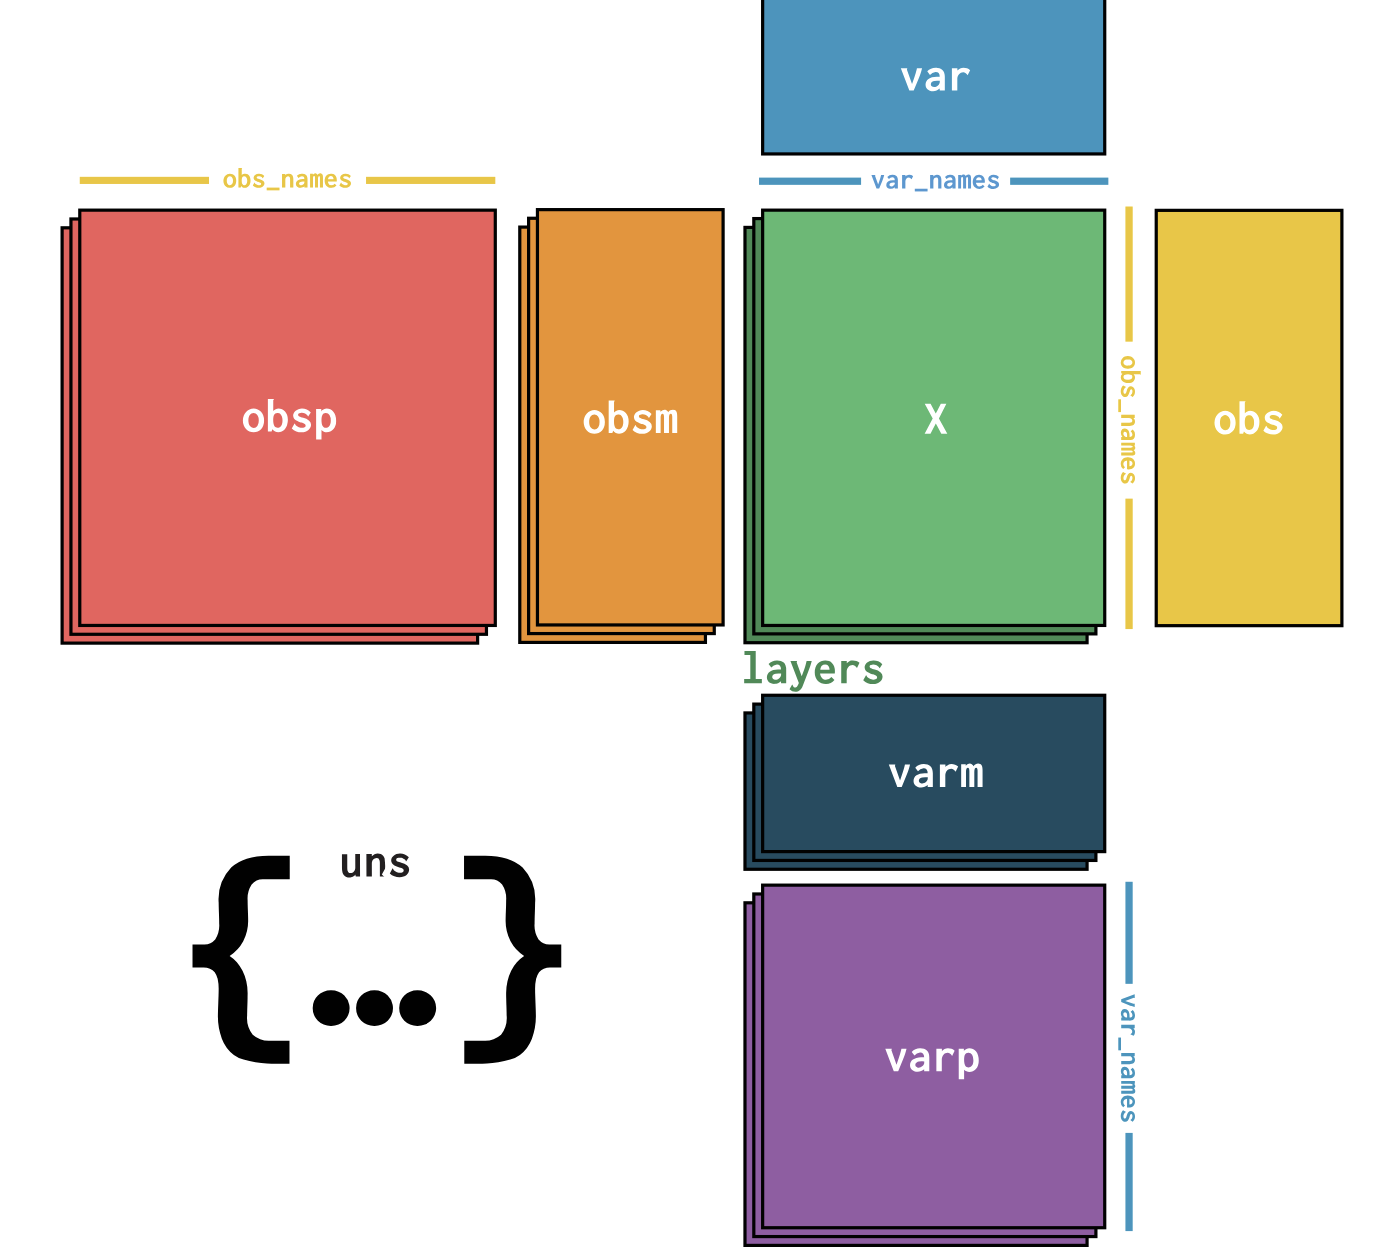

In [7]:
# pin packages to versions that don't cause incompatibility that breaks the code
%pip install "scanpy==1.10.2" "anndata==0.12.2" scikit-misc numpy scipy scikit-learn umap-learn matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into 

In [1]:
#pin packages to versions that don't cause incompatibility that breaks the code
%pip install torch --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [2]:
 #clustering
%pip install igraph leidenalg louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 102.5 MB/s eta 0:00:00
  Created wheel for louvain: filename=louvain-0.8.2-cp312-cp312-linux_x86_64.whl size=971846 sha256=3ce513a148983f131e800bca80b813a2744932a3fbc171cf89495896bd25c299
  Stored in directory: /root/.cache/pip/wheels/40/de/2b/bb7ed19d84727f9f299f20cd34c42bba9c8bef7d83d2255c86
Successfully built louvain


In [3]:
# denoising
%pip install magic-impute

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 58.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 95.4 MB/s eta 0:00:00
  Created wheel for pandas: filename=pandas-2.0.3-cp312-cp312-linux_x86_64.whl size=42828408 sha256=5352513ca438fddc4d74d752684c04997bc56aee2dbfb77704e2c9335e4e417c
  Stored in directory: /root/.cache/pip/wheels/08/95/b7/15a2a9958c1fde0807c23b05bfed1a32ff9c7225c55d270d27
Successfully built pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are install

In [4]:
# batch integration
%pip install harmonypy bbknn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=549283 sha256=f00e87d686f2de8508a4426f161724682a32ce835c228326f27f139eb0cd88f9
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [5]:
# remove the broken leftover that causes the "Ignoring invalid distribution ~andas" spam error
!rm -rf /usr/local/lib/python3.12/dist-packages/~andas

In [6]:
#install compatible versions of package
%pip install  --only-binary=:all: pandas==2.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scprep 1.2.3 requires pandas<2.1,>=0.25, but you have pandas 2.2.2 which is incompatible.


In [7]:
%pip install arviz==0.17.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.4 MB/s eta 0:00:00
  Attempting uninstall: arviz
    Found existing installation: arviz 0.22.0
    Uninstalling arviz-0.22.0:
      Successfully uninstalled arviz-0.22.0


In [8]:
%pip install "scvi-tools==1.1.2"

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.2/380.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 370.9/370.9 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 59.3 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19876 sha2

In [1]:
%pip install scanpy

In [2]:
# path to project folder
extract_dir = "/content/drive/MyDrive/DataScienceMiniProject1/Frogtail_files/"

#imports
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
from scipy.io import mmread
from scipy import sparse

#extract variables
X = mmread(extract_dir + 'ArrayExpress/countsMatrix.mtx')
genes = pd.read_csv(extract_dir + 'ArrayExpress/genes.csv', sep=' ', header=None)
cells = pd.read_csv(extract_dir + 'ArrayExpress/cells.csv', sep=' ', header=None)
labels = pd.read_csv(extract_dir + 'ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir + 'ArrayExpress/meta.csv')

# make X csr
X = X.tocsr()
#transpose
adata = ad.AnnData(X.T)

/usr/local/lib/python3.12/dist-packages/anndata/__init__.py:44: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/usr/local/lib/python3.12/dist-packages/anndata/__init__.py:44: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/usr/local/lib/python3.12/dist-packages/anndata/__init__.py:44: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/usr/local/lib/python3.12/dist-packages/anndata/__init__.py:44: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  return module_get_attr_redirect(attr_name, deprecated_mapping=_DEPRECATED)
/usr/local/lib/python3.12/dist

In [3]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

In [4]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')

/usr/lib/python3.12/functools.py:912: ImplicitModificationWarning: Transforming to str index.
  return dispatch(args[0].__class__)(*args, **kw)


In [5]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [6]:
adata.var

Empty DataFrame
Columns: []
Index: [Xelaev18000001m.g, Xelaev18000003m.g, Xelaev18000004m.g, Xelaev18000005m.g, tm6sf2.1, Xelaev18000007m.g, bpi.S, Xelaev18000010m.g, Xelaev18000011m.g, Xelaev18000015m.g, arhgap28.S, tmem200c.S, Xelaev18000024m.g, Xelaev18000025m.g, Xelaev18000026m.g, bcap31.L, Xelaev18000028m.g, plxnb3.L, loc100493711.L, wnt7c.L, hsd17b10.L, syp.L, gpkow.L, plp2.L, prickle3.like.L, klhl7.S, igf2bp3.S, Xelaev18000040m.g, Xelaev18000041m.g, tra2a.S, Xelaev18000045m.g, Xelaev18000047m.g, Xelaev18000048m.g, loc100491805.1.L, pga4.L, tmem132a.L, prpf19.L, Xelaev18000056m.g, Xelaev18000057m.g, hinfp.S, abcg4.S, pdzd3.S, cbl.S, mcam.S, Xelaev18000066m.g, Xelaev18000067m.g, Xelaev18000069m.g, Xelaev18000071m.g, Xelaev18000072m.g, loc443731, Xetrov90024636m.1, Xelaev18000089m.g, gkap1.L, mrps18c.1.L, loc100492437.L, MGC147600.1.L, Xelaev18000095m.g, Xelaev18000097m.g, Xelaev18000100m.g, taar1.L, Xelaev18000104m.g, Xelaev18000107m.g, Xelaev18000109m.g, Xelaev18000110m.g, srsf10.L, loc100145027.L, myom3.L, il22ra1.L, ifnlr1.L, Xelaev18000117m.g, Xelaev18000119m.g, gab1.L, smarca5.L, frem2.1.L, Xelaev18000125m.g, Xelaev18000127m.g, Xelaev18000128m.g, taf10, Xelaev18000132m.g, Xetrov90002011m.L, ppp1r3b.L, Xelaev18000135m.g, eri1.L, ubap2.L, dcaf12.L, ube2r2.L, loc101733340.1.L, Xelaev18000150m.g, Xelaev18000152m.g, loc101734519.1.L, Xelaev18000156m.g, Xelaev18000158m.g, Xelaev18000159m.g, Xelaev18000160m.g, Xelaev18000166m.g, Xelaev18000173m.g, irx5.1.L, Xelaev18000175m.g, Xetrov90000066m.1, cep295.S, ...]

[31535 rows x 0 columns]

In [7]:
adata.X = adata.X.tocsr()

In [8]:
adata.write_h5ad(extract_dir+'cleaned_processed_frogtail.h5ad') #create the cleaned and processed data file

In [9]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.13.0
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
anndata                               0.12.2
annotated-types                       0.7.0
annoy                                 1.17.3
antlr4-python3-runtime                4.9.3
anyio                                 4.11.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon

## Load data

In [10]:
extract_dir = "/content/drive/MyDrive/DataScienceMiniProject1/Frogtail_files/CleanedData/"
adata = ad.read_h5ad("/content/drive/MyDrive/DataScienceMiniProject1/Frogtail_files/CleanedData/cleaned_processed_frogtail.h5ad") # ad.read_h5ad()
adata.X = adata.X.tocsr() #convert to CSR format for faster cell operations and Scanpy compatibility

In [11]:
adata.X.todense() #this is purely to print out the data (coded by prof).

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [12]:
adata.obs

barcode_cells                  cell   sample DevelopmentalStage  \
0        AAACCTGAGCTAGTTC.1    AAACCTGAGCTAGTTC.1   SIGAB5               st40   
1        AAACCTGGTGGGTCAA.1    AAACCTGGTGGGTCAA.1   SIGAB5               st40   
2        AAACCTGGTTTGTTGG.1    AAACCTGGTTTGTTGG.1   SIGAB5               st40   
3        AAACGGGGTCGGCATC.1    AAACGGGGTCGGCATC.1   SIGAB5               st40   
4        AAACGGGTCCTACAGA.1    AAACGGGTCCTACAGA.1   SIGAB5               st40   
...                     ...                   ...      ...                ...   
13194    TTCTTAGAGTACCGGA.1    TTCTTAGAGTACCGGA.1  SIGAB10               st40   
13195    TTGACTTAGAGTAAGG.1    TTGACTTAGAGTAAGG.1  SIGAB10               st40   
13196    TTGCGTCTCAAGAAGT.1    TTGCGTCTCAAGAAGT.1  SIGAB10               st40   
13197    TTGTAGGCAGTACACT.1    TTGTAGGCAGTACACT.1  SIGAB10               st40   
13198  TTTGCGCAGCGTGAAC.1.1  TTTGCGCAGCGTGAAC.1.1  SIGAB10               st40   

       DaysPostAmputation        cluster         X          Y CellCyclePhase  \
0                       3  Erythrocyte 4 -6.395430   0.832323            G2M   
1                       3      Myeloid 1 -2.428271  13.826715             G1   
2                       3  Beta ionocyte -1.398049 -14.653897             G1   
3                       3  Erythrocyte 4 -5.863765   0.489598            G2M   
4                       3    Goblet cell  2.106444  -6.594430             G1   
...                   ...            ...       ...        ...            ...   
13194                   3  Erythrocyte 4 -5.879582   0.924197            G2M   
13195                   3    Goblet cell  1.252149  -8.870151             G1   
13196                   3    Goblet cell  0.693335  -9.168521             G1   
13197                   3  Erythrocyte 1 -4.087618   4.145738             G1   
13198                   3    Goblet cell  0.803595  -7.395422             G1   

        Sample       Lane Condition  batch  
0       SIGAB5  SLX-15583    ST40_3      3  
1       SIGAB5  SLX-15583    ST40_3      3  
2       SIGAB5  SLX-15583    ST40_3      3  
3       SIGAB5  SLX-15583    ST40_3      3  
4       SIGAB5  SLX-15583    ST40_3      3  
...        ...        ...       ...    ...  
13194  SIGAB10  SLX-15739    ST40_3      4  
13195  SIGAB10  SLX-15739    ST40_3      4  
13196  SIGAB10  SLX-15739    ST40_3      4  
13197  SIGAB10  SLX-15739    ST40_3      4  
13198  SIGAB10  SLX-15739    ST40_3      4  

[13199 rows x 13 columns]

In [13]:
adata.X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 29297098 stored elements and shape (13199, 31535)>

In [14]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

## Processing data

In [15]:
adata.layers["counts"] = adata.X.copy() # save raw counts

In [16]:
sc.pp.normalize_total(adata)

# logarithmize the data
sc.pp.log1p(adata)

In [17]:
#filter out genes with too little cells and cells with too little genes
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

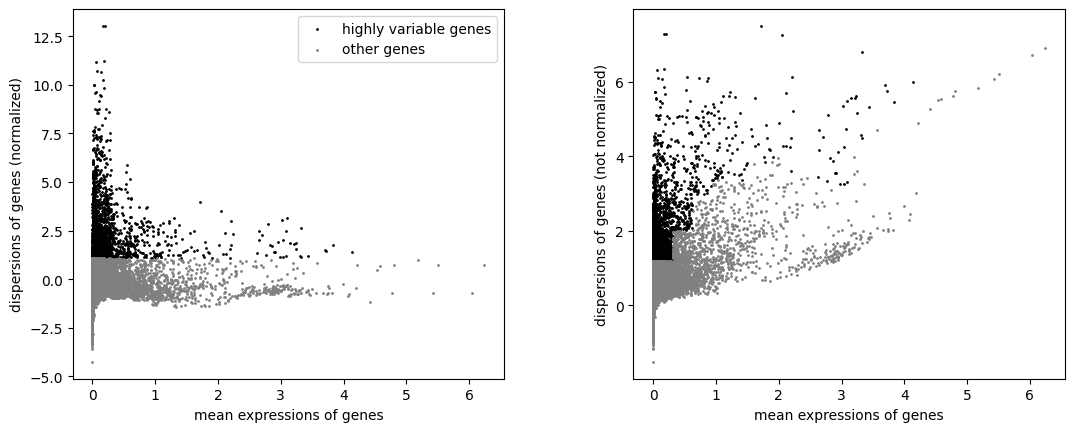

In [18]:
sc.pl.highly_variable_genes(adata)

In [19]:
from scipy.sparse import csr_matrix, issparse
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import os


#paths, folders, data
BASE_DIR = "/content/drive/MyDrive/DataScienceMiniProject1" #root directory of the project
FIG_DIR  = f"{BASE_DIR}/figures"
OUT_DIR  = f"{BASE_DIR}/outputs"
REFS_DIR = f"{BASE_DIR}/refs"

#ensure the folders exist on a disk
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(REFS_DIR, exist_ok=True)

#directory for figures
sc.settings.figdir = FIG_DIR

#load cleaned andata
if "adata" not in globals():
    CLEAN_FILE = f"{BASE_DIR}/Frogtail_files/CleanedData/cleaned_processed_frogtail.h5ad"
    adata = sc.read_h5ad(CLEAN_FILE)
    print("Loaded cleaned data")

# sparse CSR format
if not issparse(adata.X):
    adata.X = csr_matrix(adata.X)

# ensure counts layer exists
if "counts" not in adata.layers:
    # check for log1p - if X has small non-integer values, it’s log1p
    max_val = adata.X.max() if not issparse(adata.X) else adata.X.data.max()

    if max_val < 20: # < 20 means small
        print("adata.X appears log-transformed. Reconstructing raw counts in 'counts'")
        counts = adata.X.copy()
        if issparse(counts):
            counts.data = np.expm1(counts.data)
        else:
            counts = np.expm1(counts)
        adata.layers["counts"] = counts
    else:
        print("adata.X appears to be raw counts. Copying to counts'")
        adata.layers["counts"] = adata.X.copy()
else:
    print("'counts' layer already exists")

#summary
#check to confirm if data log or not
print(f"adata.X  (main): log1p={ 'log1p' in adata.uns or adata.X.max()<20 }  range=({adata.X.min():.2f}, {adata.X.max():.2f})")
print(f"counts layer   : exists={ 'counts' in adata.layers }")


BATCH_KEY = "batch"     #for integration
LABEL_KEY = "cluster"   #reference labels from professor for ARI/NMI

'counts' layer already exists
adata.X  (main): log1p=True  range=(0.00, 8.53)
counts layer   : exists=True


In [20]:
%pip install --user scikit-misc
import warnings

#restart from base on every run (be bale to rerun code without issues)
if "ADATA_BASE" not in globals():
    ADATA_BASE = adata.copy()   # keep an untouched baseline in memory
    print("Cached ADATA_BASE")
else:
    print("Reusing cached ADATA_BASE")

adata = ADATA_BASE.copy()

#ensure raw counts layer. if not, best-effort fallback from X (may be log)
if "counts" not in adata.layers:
    warnings.warn("No `adata.layers['counts']` found. Creating a fallback from adata.X")
    Xdense = adata.X.A if sparse.issparse(adata.X) else adata.X
    adata.layers["counts"] = np.expm1(Xdense)

# shape & sparsity summary (of current X and raw counts)
n_cells, n_genes = adata.shape
nnz_X = adata.X.nnz if hasattr(adata.X, "nnz") else np.count_nonzero(adata.X)
C = adata.layers["counts"]
nnz_C = C.nnz if hasattr(C, "nnz") else np.count_nonzero(C)

print(f"[X]   Cells: {n_cells:,}  Genes: {n_genes:,}  Nonzeros: {nnz_X:,}  Sparsity: {nnz_X/(n_cells*n_genes):.3%}")
print(f"[raw] Nonzeros: {nnz_C:,}  Sparsity: {nnz_C/(n_cells*n_genes):.3%}")

#Hghly variable genes
sc.pp.highly_variable_genes(
    adata,
    layer="counts",     # use raw counts layer
    flavor="seurat_v3",
    n_top_genes=3000,
)
print("HVGs selected:", int(adata.var["highly_variable"].sum()))
adata = adata[:, adata.var["highly_variable"]].copy()

# scale without zero centering
sc.pp.scale(adata, zero_center=False, max_value=10)

# PCA --> neighbors ---> UMAP
sc.tl.pca(adata, svd_solver="arpack")
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata)

#sabity check
print("Post-HVG shape:", adata.shape,
      "||| PCA shape:", adata.obsm["X_pca"].shape,
      "||| UMAP shape:", adata.obsm["X_umap"].shape)

Cached ADATA_BASE
[X]   Cells: 13,199  Genes: 26,166  Nonzeros: 29,294,367  Sparsity: 8.482%
[raw] Nonzeros: 29,294,367  Sparsity: 8.482%
HVGs selected: 3000
Post-HVG shape: (13199, 3000) ||| PCA shape: (13199, 50) ||| UMAP shape: (13199, 2)


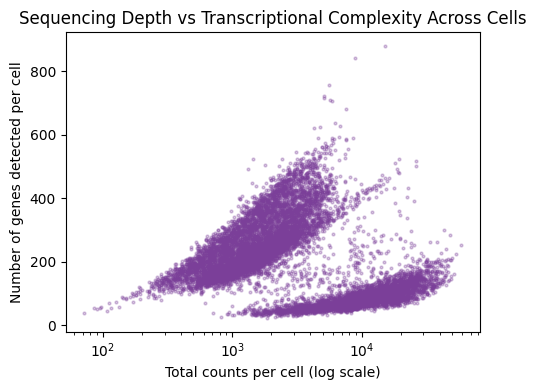

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import issparse

# make sure adata.layers["counts"] exists first
if "counts" in adata.layers:
    C = adata.layers["counts"]
else:
    from scipy.sparse import issparse
    if issparse(adata.X):
        C = adata.X
    else:
        import numpy as np
        C = np.expm1(adata.X)  # reconstruct if X is log1p

#recompute QC metrics
import numpy as np
adata.obs["n_genes_raw"] = np.asarray((C > 0).sum(axis=1)).ravel()
adata.obs["total_counts_raw"] = np.asarray(C.sum(axis=1)).ravel()

#plot the scatterplot
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(
    adata.obs["total_counts_raw"],
    adata.obs["n_genes_raw"],
    s=4, alpha=0.3, color="#7B3F99"
)
ax.set_xscale("log")
ax.set_xlabel("Total counts per cell (log scale)")
ax.set_ylabel("Number of genes detected per cell")
ax.set_title("Sequencing Depth vs Transcriptional Complexity Across Cells")
plt.tight_layout()
plt.show()



In [22]:
#The two curved lines of the scatter suggest
#that the dataset contains two broad cell populations
# or technical batches with different capture efficiency or RNA content

#no obvious low-count outlier cloud  so very few dead/low-quality cells

#Cells that have more RNA molecules captured (further to the right)
#also have more genes detected (higher up)
#such upward pattern means the data ws sequenced deeply enough
#to capture real biological signal  (ie cells with more reads show richer
#gene expression) - so we have a good single cell dataset

/tmp/ipython-input-3720483609.py:10: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added="leiden", resolution=1.0)


Baseline clustering metrics:
    variant  sil_leiden  sil_louvain  ari_leiden  nmi_leiden  ari_louvain  \
0  baseline    0.249069     0.252828    0.487108    0.771005     0.517367   

   nmi_louvain  
0     0.767177  

Saved baseline metrics to: /content/drive/MyDrive/DataScienceMiniProject1/outputs/metrics_baseline.csv


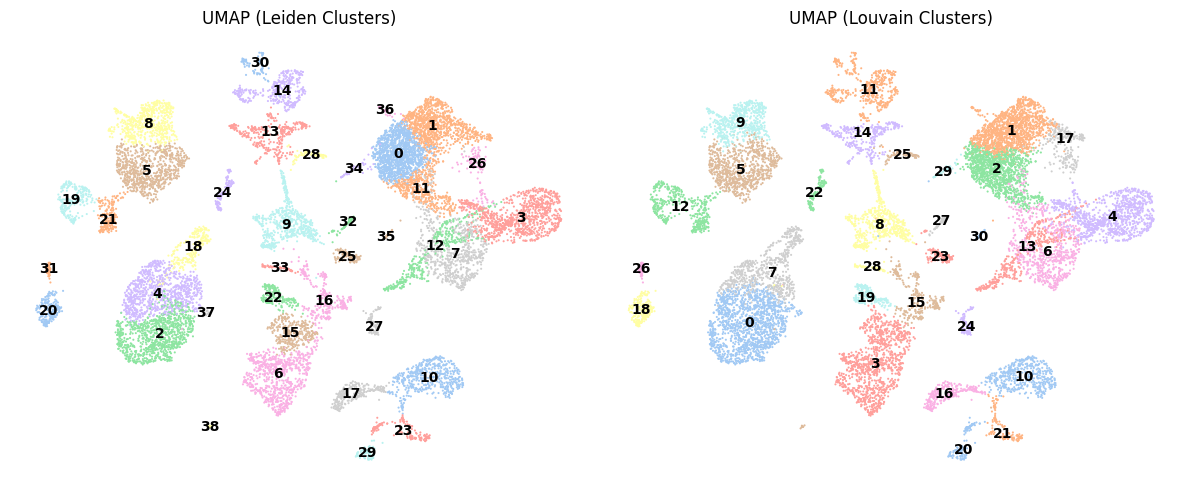

In [23]:
# baseline clustering (Leiden + Louvain) + UMAP + Metrics
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# compute leiden and louvain clusterings
sc.tl.leiden(adata, key_added="leiden", resolution=1.0)
sc.tl.louvain(adata, key_added="louvain", resolution=1.0)

# helper functions for metrics
def silhouette_pca(a, label_key):
    return silhouette_score(a.obsm["X_pca"], a.obs[label_key].astype(str))

def ari_nmi_vs_ref(a, label_key, ref_key):
    if ref_key in a.obs.columns:
        y_true = a.obs[ref_key].astype(str)
        y_pred = a.obs[label_key].astype(str)
        ari = adjusted_rand_score(y_true, y_pred)
        nmi = normalized_mutual_info_score(y_true, y_pred)
        return ari, nmi
    return np.nan, np.nan

# compute metrics
sil_leiden  = silhouette_pca(adata, "leiden")
sil_louvain = silhouette_pca(adata, "louvain")

LABEL_KEY = "cluster"
ari_leiden,  nmi_leiden  = ari_nmi_vs_ref(adata, "leiden",  LABEL_KEY)
ari_louvain, nmi_louvain = ari_nmi_vs_ref(adata, "louvain", LABEL_KEY)

metrics_baseline = pd.DataFrame([{
    "variant": "baseline",
    "sil_leiden": sil_leiden,
    "sil_louvain": sil_louvain,
    "ari_leiden": ari_leiden,
    "nmi_leiden": nmi_leiden,
    "ari_louvain": ari_louvain,
    "nmi_louvain": nmi_louvain
}])

# save metrics
OUT_DIR = "/content/drive/MyDrive/DataScienceMiniProject1/outputs"
os.makedirs(OUT_DIR, exist_ok=True)
metrics_path = os.path.join(OUT_DIR, "metrics_baseline.csv")
metrics_baseline.to_csv(metrics_path, index=False)

print("Baseline clustering metrics:")
print(metrics_baseline)
print("\nSaved baseline metrics to:", metrics_path)

# use pastel palette for the plots
pastel_palette = sns.color_palette("pastel", n_colors=20).as_hex()

# show UMAPs for leiden and louvain clusters with pastel colors
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sc.pl.umap(
    adata,
    color="leiden",
    palette=pastel_palette,
    legend_loc="on data",
    title="UMAP (Leiden Clusters)",
    ax=axes[0],
    frameon=False,
    show=False
)

sc.pl.umap(
    adata,
    color="louvain",
    palette=pastel_palette,
    legend_loc="on data",
    title="UMAP (Louvain Clusters)",
    ax=axes[1],
    frameon=False,
    show=False
)

plt.tight_layout()
plt.savefig(os.path.join(OUT_DIR, "umap_leiden_louvain_pastel.png"), dpi=150)
plt.show()

In [24]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# compute silhouette scores
sil_leiden  = silhouette_score(adata.obsm["X_pca"], adata.obs["leiden"].astype(str))
sil_louvain = silhouette_score(adata.obsm["X_pca"], adata.obs["louvain"].astype(str))

print(f"silhouette (leiden):  {sil_leiden:.3f}")
print(f"silhouette (louvain): {sil_louvain:.3f}")

# compute ARI/NMI if ground-truth exists
LABEL_KEY = "cluster"  # or change to the correct reference label
if LABEL_KEY in adata.obs.columns:
    y_ref = adata.obs[LABEL_KEY].astype(str)

    ari_leiden  = adjusted_rand_score(y_ref, adata.obs["leiden"].astype(str))
    nmi_leiden  = normalized_mutual_info_score(y_ref, adata.obs["leiden"].astype(str))
    ari_louvain = adjusted_rand_score(y_ref, adata.obs["louvain"].astype(str))
    nmi_louvain = normalized_mutual_info_score(y_ref, adata.obs["louvain"].astype(str))

    print(f"ari (leiden):  {ari_leiden:.3f}")
    print(f"nmi (leiden):  {nmi_leiden:.3f}")
    print(f"ari (louvain): {ari_louvain:.3f}")
    print(f"nmi (louvain): {nmi_louvain:.3f}")
else:
    print("no reference label found — skipping ARI/NMI")

silhouette (leiden):  0.249
silhouette (louvain): 0.253
ari (leiden):  0.487
nmi (leiden):  0.771
ari (louvain): 0.517
nmi (louvain): 0.767


running kmeans clustering on PCA-reduced data...

kmeans clustering metrics:
  variant  silhouette       ari       nmi
0  kmeans    0.438963  0.526375  0.730815
saved metrics to: /content/drive/MyDrive/DataScienceMiniProject1/outputs/metrics_kmeans.csv


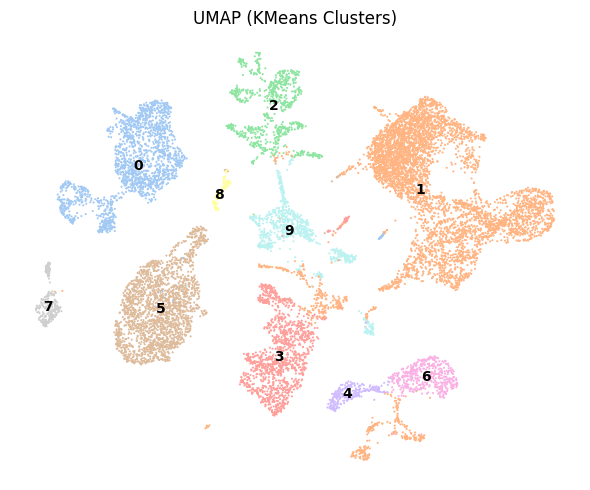

In [25]:
# KMeans clustering and evaluation with inline UMAP plot

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# helper to compute silhouette score on PCA
def silhouette_pca(a, label_key):
    return silhouette_score(a.obsm["X_pca"], a.obs[label_key].astype(str))

# helper to compute ARI and NMI vs reference labels
def ari_nmi_vs_ref(a, label_key, ref_key):
    if ref_key in a.obs.columns:
        y_true = a.obs[ref_key].astype(str)
        y_pred = a.obs[label_key].astype(str)
        ari = adjusted_rand_score(y_true, y_pred)
        nmi = normalized_mutual_info_score(y_true, y_pred)
        return ari, nmi
    return np.nan, np.nan

OUT_DIR = "/content/drive/MyDrive/DataScienceMiniProject1/outputs"
os.makedirs(OUT_DIR, exist_ok=True)

LABEL_KEY = "cluster"

# run KMeans clustering on PCA
print("running kmeans clustering on PCA-reduced data...")
kmeans = KMeans(n_clusters=10, random_state=42)
adata.obs["kmeans"] = kmeans.fit_predict(adata.obsm["X_pca"]).astype(str)

# compute metrics
sil_kmeans = silhouette_pca(adata, "kmeans")
ari_kmeans, nmi_kmeans = ari_nmi_vs_ref(adata, "kmeans", LABEL_KEY)

metrics_kmeans = pd.DataFrame([{
    "variant": "kmeans",
    "silhouette": sil_kmeans,
    "ari": ari_kmeans,
    "nmi": nmi_kmeans
}])

# save metrics
metrics_path = os.path.join(OUT_DIR, "metrics_kmeans.csv")
metrics_kmeans.to_csv(metrics_path, index=False)

print("\nkmeans clustering metrics:")
print(metrics_kmeans)
print("saved metrics to:", metrics_path)

# display UMAP with pastel colors
pastel_palette = sns.color_palette("pastel", n_colors=10).as_hex()
fig, ax = plt.subplots(figsize=(6, 5))

sc.pl.umap(
    adata,
    color="kmeans",
    title="UMAP (KMeans Clusters)",
    legend_loc="on data",
    palette=pastel_palette,
    ax=ax,
    frameon=False,
    show=False
)

plt.tight_layout()
plt.show()



In [26]:
from IPython.display import Image, display

# paths
BASE_DIR = "/content/drive/MyDrive/DataScienceMiniProject1"
REFS_DIR = f"{BASE_DIR}/refs"
OUT_DIR  = f"{BASE_DIR}/outputs"
FIG_DIR  = f"{BASE_DIR}/figures"
os.makedirs(REFS_DIR, exist_ok=True)
os.makedirs(OUT_DIR,  exist_ok=True)
os.makedirs(FIG_DIR,  exist_ok=True)

%matplotlib inline
sc.settings.autoshow = False
sc.settings.figdir   = FIG_DIR

# ensure .raw exists
try:
    if getattr(adata, "raw", None) is None:
        adata.raw = ADATA_BASE
except NameError:
    adata.raw = adata.copy()
    print("ADATA_BASE not found; set adata.raw = adata (may be HVG-subset).")

# ensure Leiden exists
if "leiden" not in adata.obs.columns:
    print("Leiden labels not found — computing Leiden at resolution=1.0")
    if "X_pca" not in adata.obsm:
        sc.tl.pca(adata, svd_solver="arpack")
    if "neighbors" not in adata.uns:
        n_pcs = min(50, adata.obsm["X_pca"].shape[1])
        sc.pp.neighbors(adata, n_neighbors=15, n_pcs=n_pcs)
    if "X_umap" not in adata.obsm:
        sc.tl.umap(adata)
    sc.tl.leiden(adata, key_added="leiden", resolution=1.0)

# ensure Louvain exists
if "louvain" not in adata.obs.columns:
    print("Louvain labels not found — computing Louvain at resolution=1.0")
    sc.tl.louvain(adata, key_added="louvain", resolution=1.0)

# ensure KMeans exists
from sklearn.cluster import KMeans
if "kmeans" not in adata.obs.columns:
    print("KMeans not found — computing with n_clusters=10 on PCA space")
    kmeans = KMeans(n_clusters=10, random_state=42)
    adata.obs["kmeans"] = kmeans.fit_predict(adata.obsm["X_pca"]).astype(str)

# marker selection (Wilcoxon / LogReg) — save to .uns with cluster method key
if "wilcox" not in adata.uns:
    print("Wilcoxon markers not found — computing for Leiden")
    sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon", key_added="wilcox")

if "louvain_wilcox" not in adata.uns:
    print("Wilcoxon markers not found — computing for Louvain")
    sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon", key_added="louvain_wilcox")

if "kmeans_logreg" not in adata.uns:
    print("LogReg markers not found — computing for KMeans")
    sc.tl.rank_genes_groups(adata, groupby="kmeans", method="logreg", key_added="kmeans_logreg")

# clean gene symbols for matching
def clean_symbol(x: str) -> str:
    s = str(x).upper()
    s = s.split(".")[0].split("_")[0]
    return s

adata.var["symbol_clean"] = [clean_symbol(g) for g in adata.var_names]
if adata.raw is not None:
    adata.raw.var["symbol_clean"] = [clean_symbol(g) for g in adata.raw.var_names]


Wilcoxon markers not found — computing for Leiden


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

Wilcoxon markers not found — computing for Louvain


/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:435: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:437: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:440: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

LogReg markers not found — computing for KMeans


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import scanpy as sc

OTHER_GRAY = "#d3d3d3"
ROC_PASTEL = "#a6cee3"

def render_umap_highlight(adata, method_col, roc_cluster, out_path, title):
    """Render UMAP with ROC cluster pastel-highlighted, no legend, and an on-plot ROC label."""
    cats = list(adata.obs[method_col].cat.categories)
    roc_id = str(roc_cluster)
    palette = [ROC_PASTEL if c == roc_id else OTHER_GRAY for c in cats]

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    sc.pl.umap(
        adata,
        color=method_col,
        palette=palette,
        groups=[roc_cluster],
        legend_loc=None,
        frameon=False,
        show=False,
        ax=ax,
        title=title
    )

    mask = (adata.obs[method_col].astype(str).values == roc_id)
    if mask.any():
        xy = adata.obsm["X_umap"][mask, :]
        x, y = float(np.mean(xy[:,0])), float(np.mean(xy[:,1]))
        txt = ax.text(x, y, "ROC", color="black", fontsize=14, weight="bold",
                      ha="center", va="center")
        txt.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])

    fig.tight_layout()
    fig.savefig(out_path, dpi=200)
    plt.show()
    print("Saved:", out_path)


ROC cluster (cleaned symbols): 18 | overlap(top-50) = 5


/tmp/ipython-input-2776450667.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/umap_roc_cluster_FIXED.png


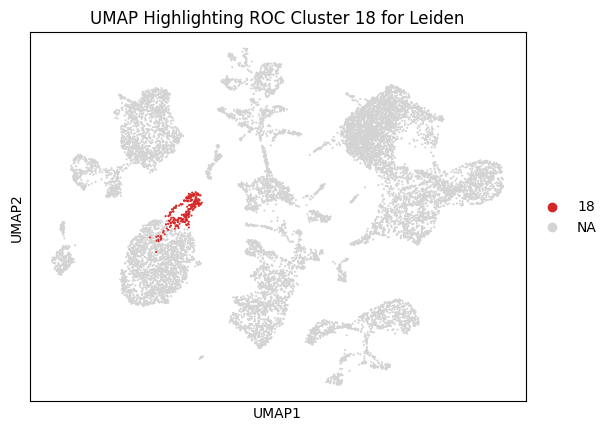

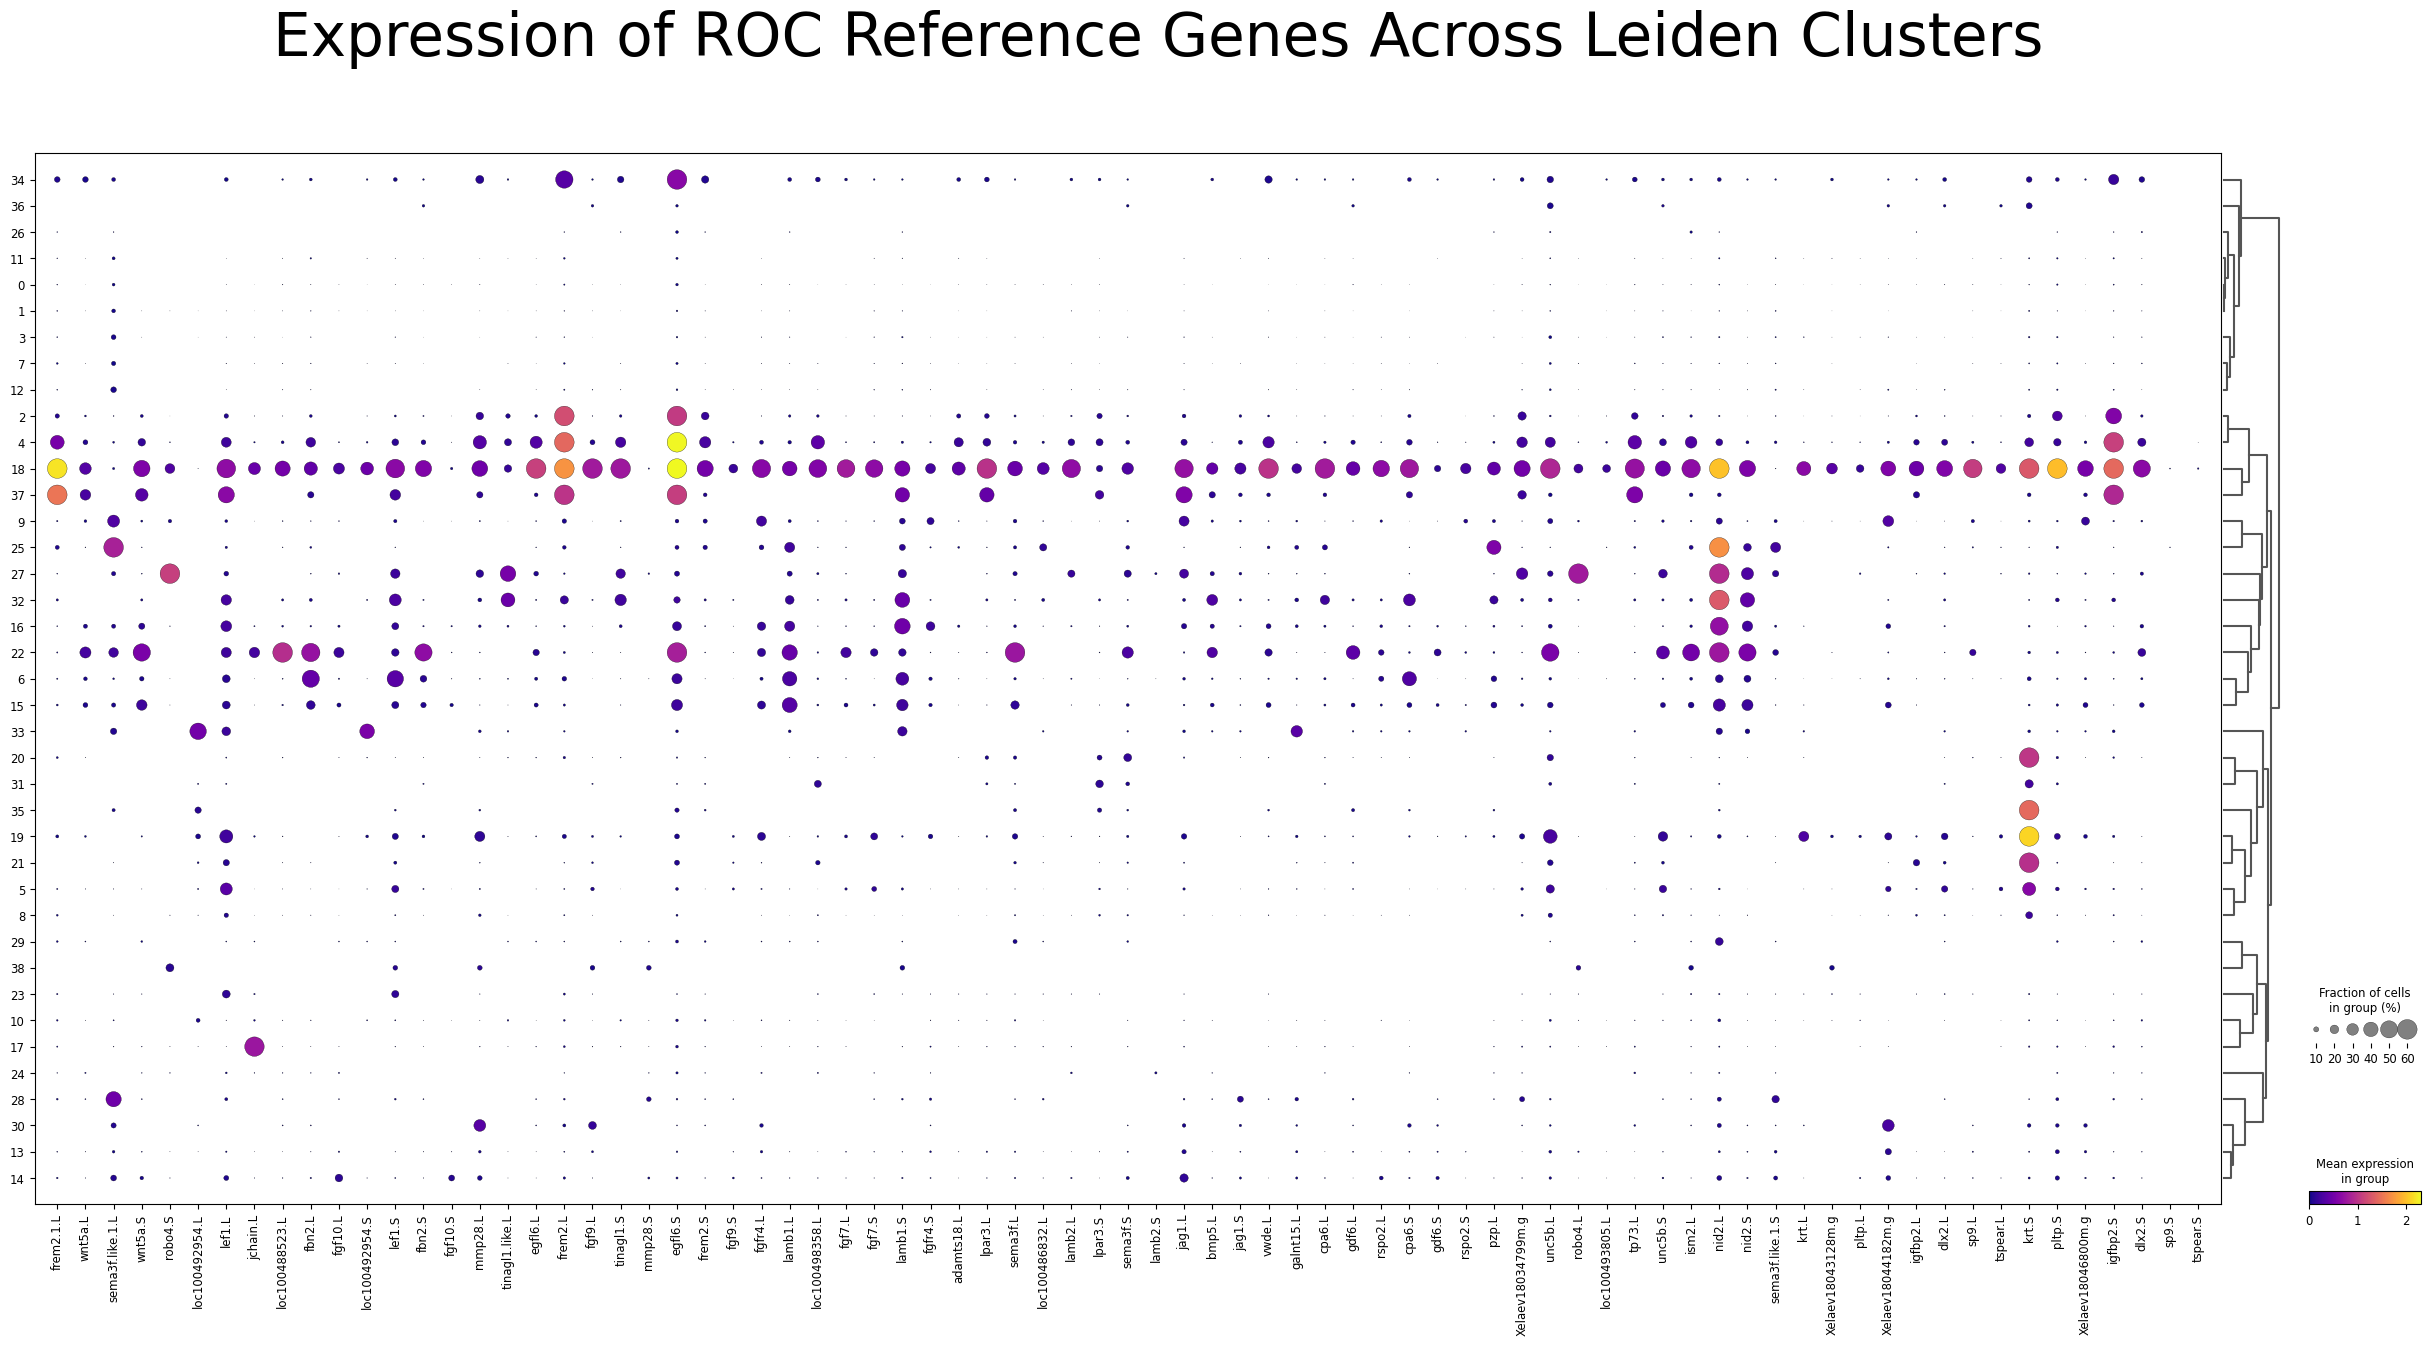

In [28]:
#ROC reference list (copied from supplement table 3)
roc_csv = os.path.join(REFS_DIR, "rocGenes.csv")
if not os.path.exists(roc_csv):
    pd.Series([
        "WNT5A","LOC100488523","LOC100492954","EGFL6","LPAR3","CPA6","SP9","FGF9","FBN2","TINAGL1",
        "FGF7","VWDE","LEF1","LAMB2","FGFR4","RSPO2","CPA6","LOC100498358","KRT","LOC100486832",
        "JAG1","XELAEV18043128M","DLX2","TP73","GDF6","XELAEV18046800M","NID2","IGFBP2","ISM2",
        "LOC100493805","FREM2","XELAEV18044182M","BMP5","TSPEAR","SEMA3F","ROBO4","JCHAIN",
        "ADAMTS18","PLTP","XELAEV18034799M","LAMB1","UNC5B","MMP28","FGF10","PZP","GALNT15"
    ]).to_csv(roc_csv, index=False)
roc_ref = pd.read_csv(roc_csv, header=None).iloc[:,0].astype(str).str.upper().tolist()
roc_ref_set = set(roc_ref)

#overlap per Leiden cluster (top-50 Wilcoxon markers)
wilcox_names = pd.DataFrame(adata.uns["wilcox"]["names"])
def clean_list(lst): return [clean_symbol(x) for x in lst]
overlap = {}
for cl in wilcox_names.columns:
    top50_clean = set(clean_list(wilcox_names[cl][:50]))
    overlap[cl] = len(top50_clean & roc_ref_set)

roc_cluster = max(overlap, key=overlap.get)
pd.Series(overlap, name="roc_overlap_top50_wilcoxon_clean").to_csv(
    os.path.join(OUT_DIR, "roc_overlap_baseline_clean.csv")
)
print(f"ROC cluster (cleaned symbols): {roc_cluster} | overlap(top-50) = {overlap[roc_cluster]}")

#map cleaned symbols to present var names
def map_to_present_symbols(target_list, var_symbols, var_names):
    target = set(target_list); hits = []
    for i, sym in enumerate(var_symbols):
        if sym in target:
            hits.append(var_names[i])
    return hits

panel_raw = []
if adata.raw is not None and "symbol_clean" in adata.raw.var:
    panel_raw = map_to_present_symbols(roc_ref, adata.raw.var["symbol_clean"].tolist(), list(adata.raw.var_names))
panel_cur = map_to_present_symbols(roc_ref, adata.var["symbol_clean"].tolist(), list(adata.var_names))
plot_panel = panel_raw if len(panel_raw) >= len(panel_cur) else panel_cur

#dotplot
if len(plot_panel) == 0:
    print("No ROC genes found after cleaning — expand rocGenes.csv or check symbol mapping.")
else:
    use_raw_flag = (len(panel_raw) >= len(panel_cur)) and (adata.raw is not None)

sc.pl.dotplot(
    adata,
    var_names=plot_panel,
    groupby="leiden",
    dot_max=0.6,
    color_map="plasma",
    dendrogram=True,
    use_raw=use_raw_flag,
    show=False,
    title="Expression of ROC Reference Genes Across Leiden Clusters",
)

fig = plt.gcf()
ax = fig.axes[0]
ax.set_title("Expression of ROC Reference Genes Across Leiden Clusters", fontsize=43, pad=15)
fig.tight_layout()
fig.savefig(os.path.join(FIG_DIR, "dotplot_roc_panel_FIXED.png"), dpi=150)
#plt.show()

# UMAP with ROC cluster highlighted (bright red)
palette = [("#d62728" if c == str(roc_cluster) else "#d3d3d3")
           for c in adata.obs["leiden"].cat.categories]
sc.pl.umap(
    adata,
    color="leiden",
    groups=[roc_cluster],
    palette=palette,
    title=f"UMAP Highlighting ROC Cluster {roc_cluster} for Leiden",
    show=False,
    save="_roc_cluster_FIXED.png"
)
umap_path = os.path.join(FIG_DIR, "umap_roc_cluster_FIXED.png")
print("Saved:", umap_path)
display(Image(filename=umap_path))



[LOUVAIN] ROC cluster (cleaned symbols): 7 | overlap(top-50) = 3


/tmp/ipython-input-1501757214.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


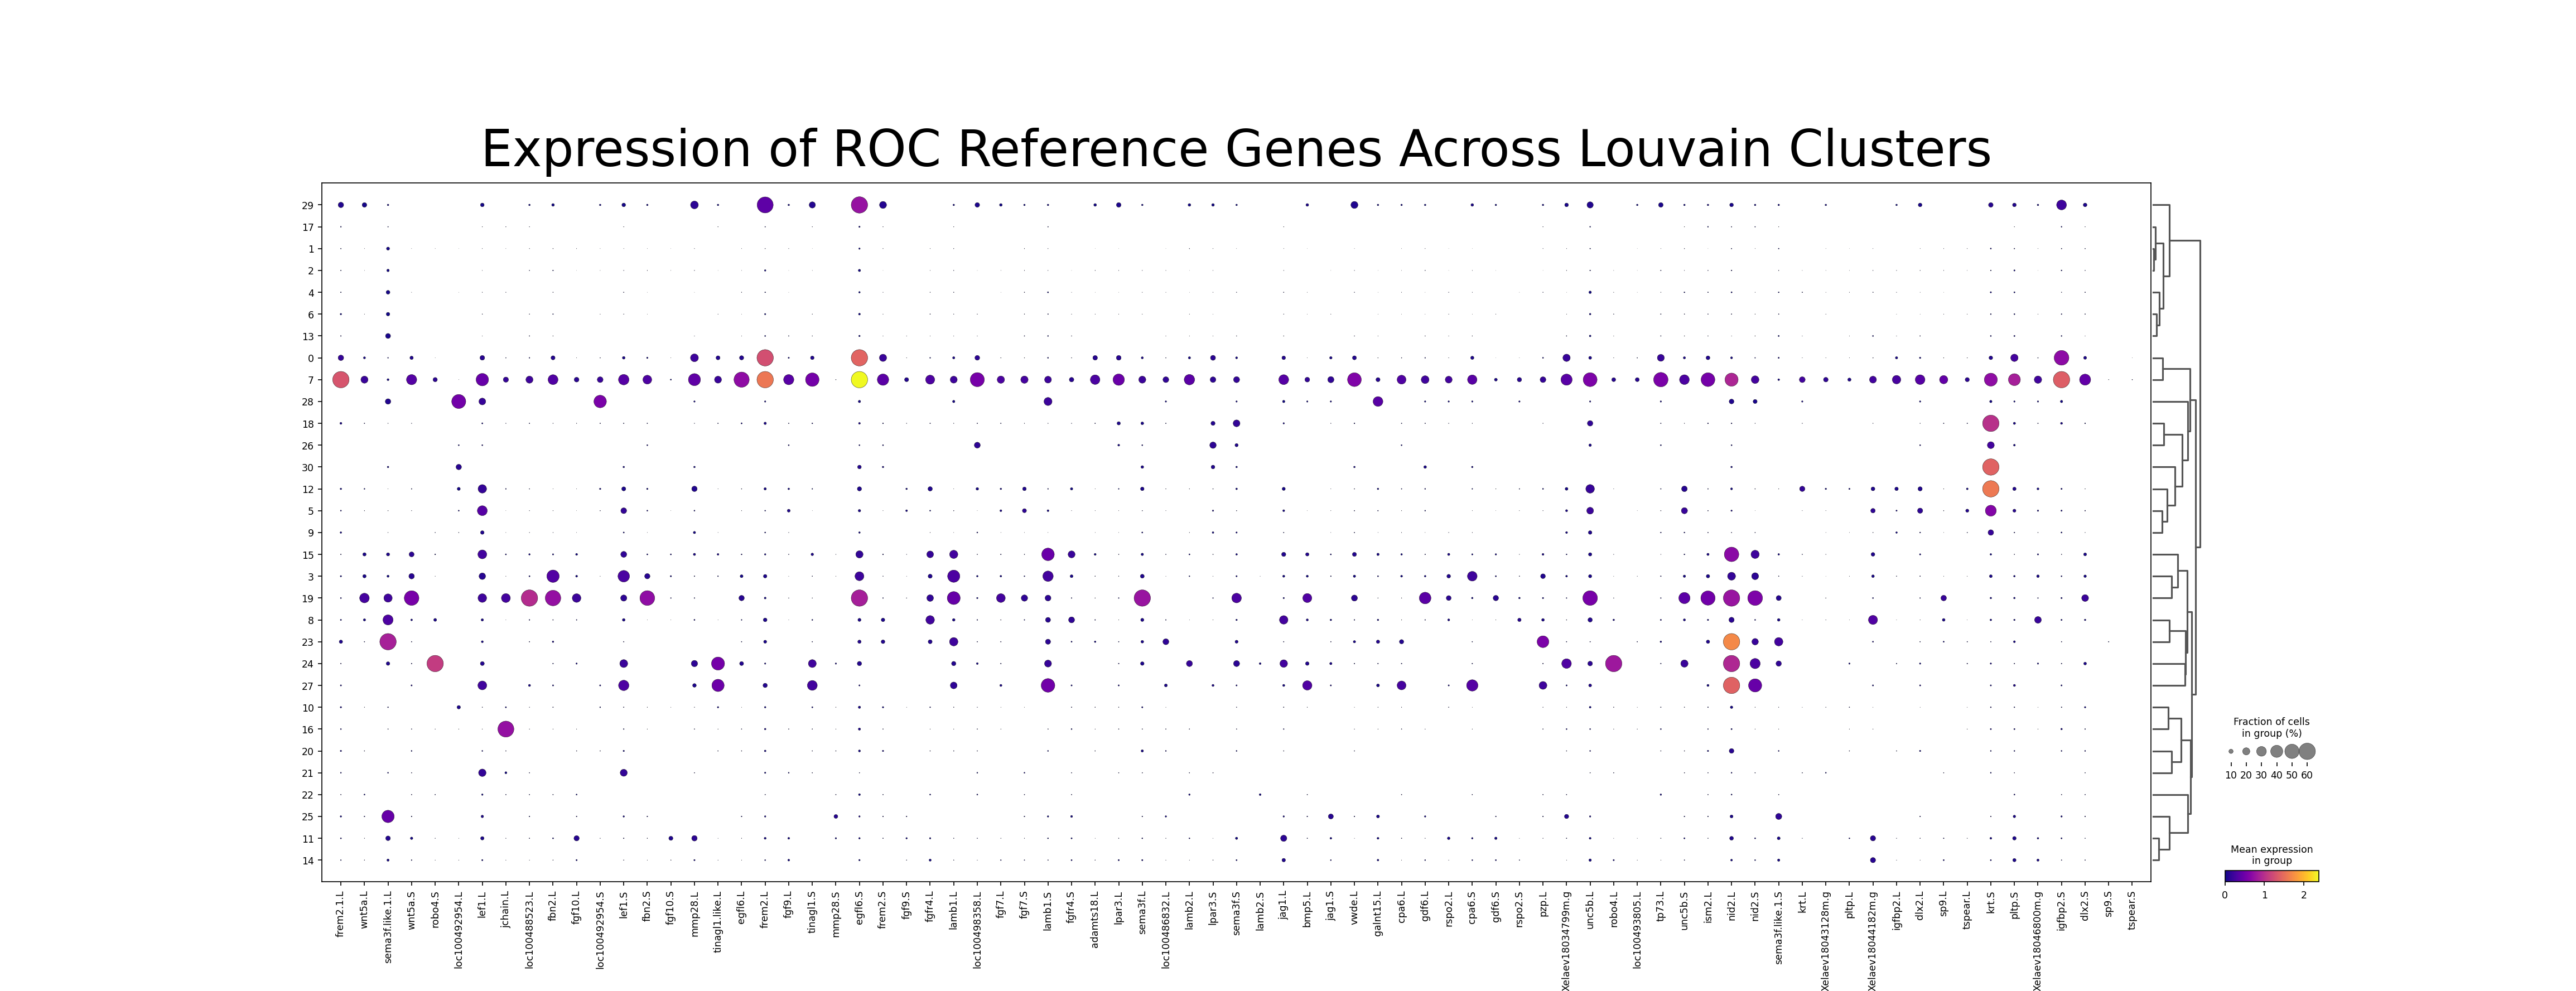

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/umap_roc_cluster_LOUVAIN.png


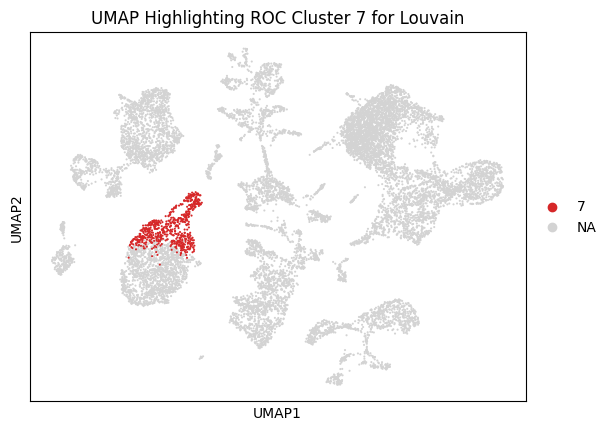


[KMEANS] ROC cluster (cleaned symbols): 5 | overlap(top-50) = 2


/tmp/ipython-input-1501757214.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


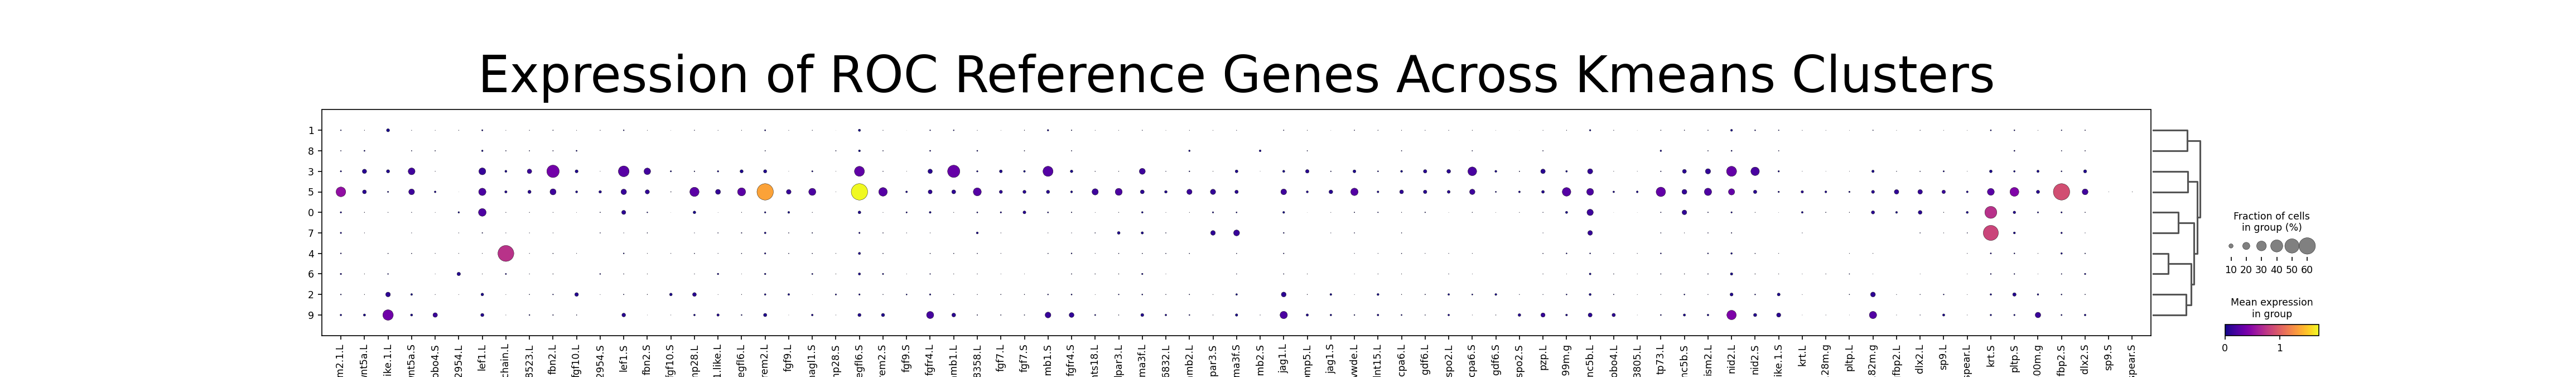

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/umap_roc_cluster_KMEANS.png


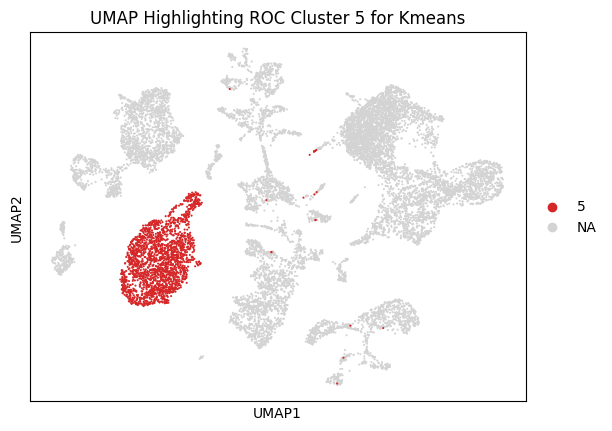

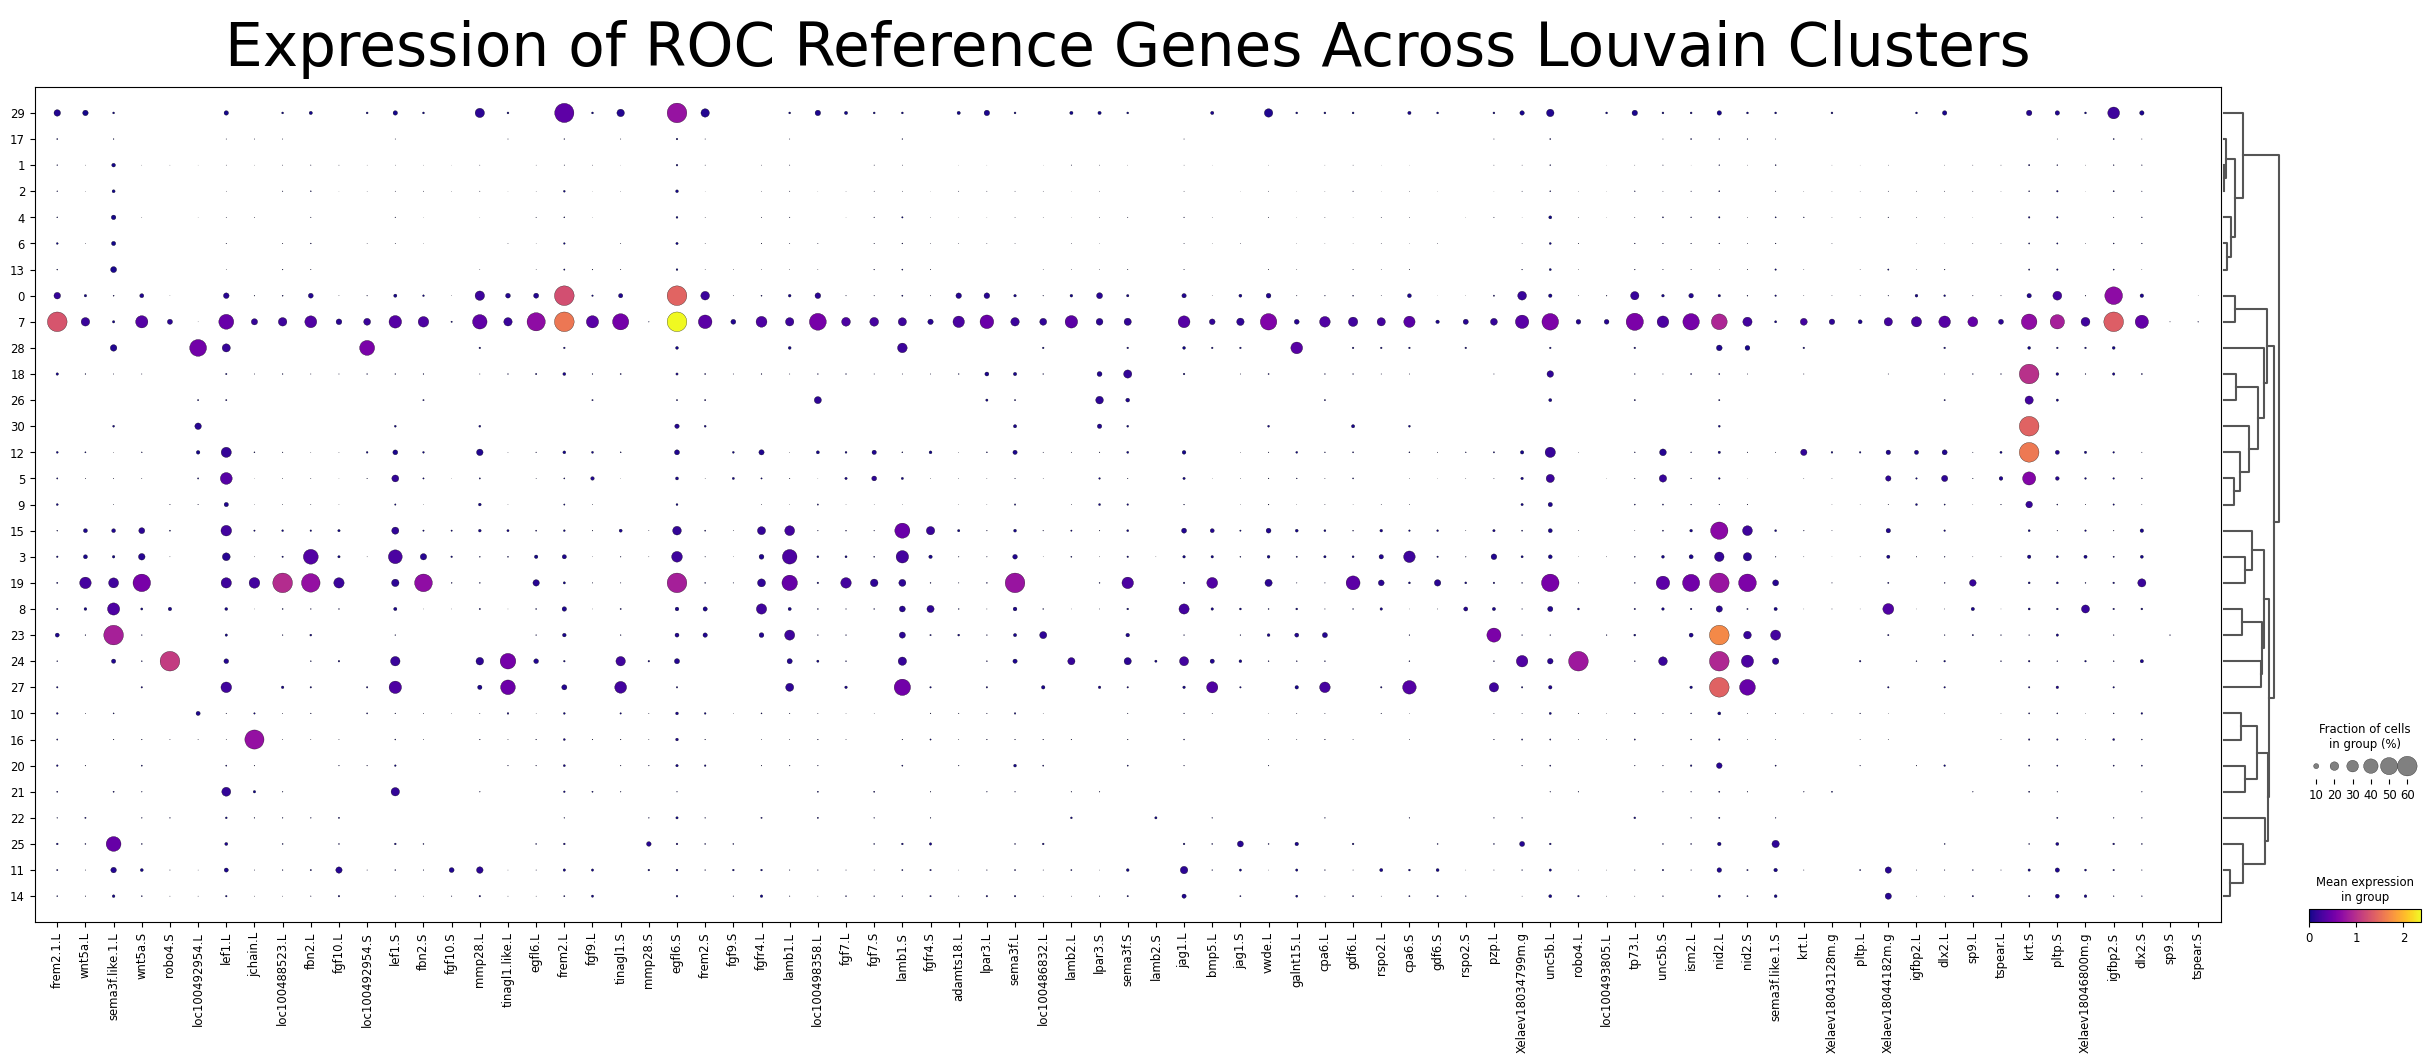

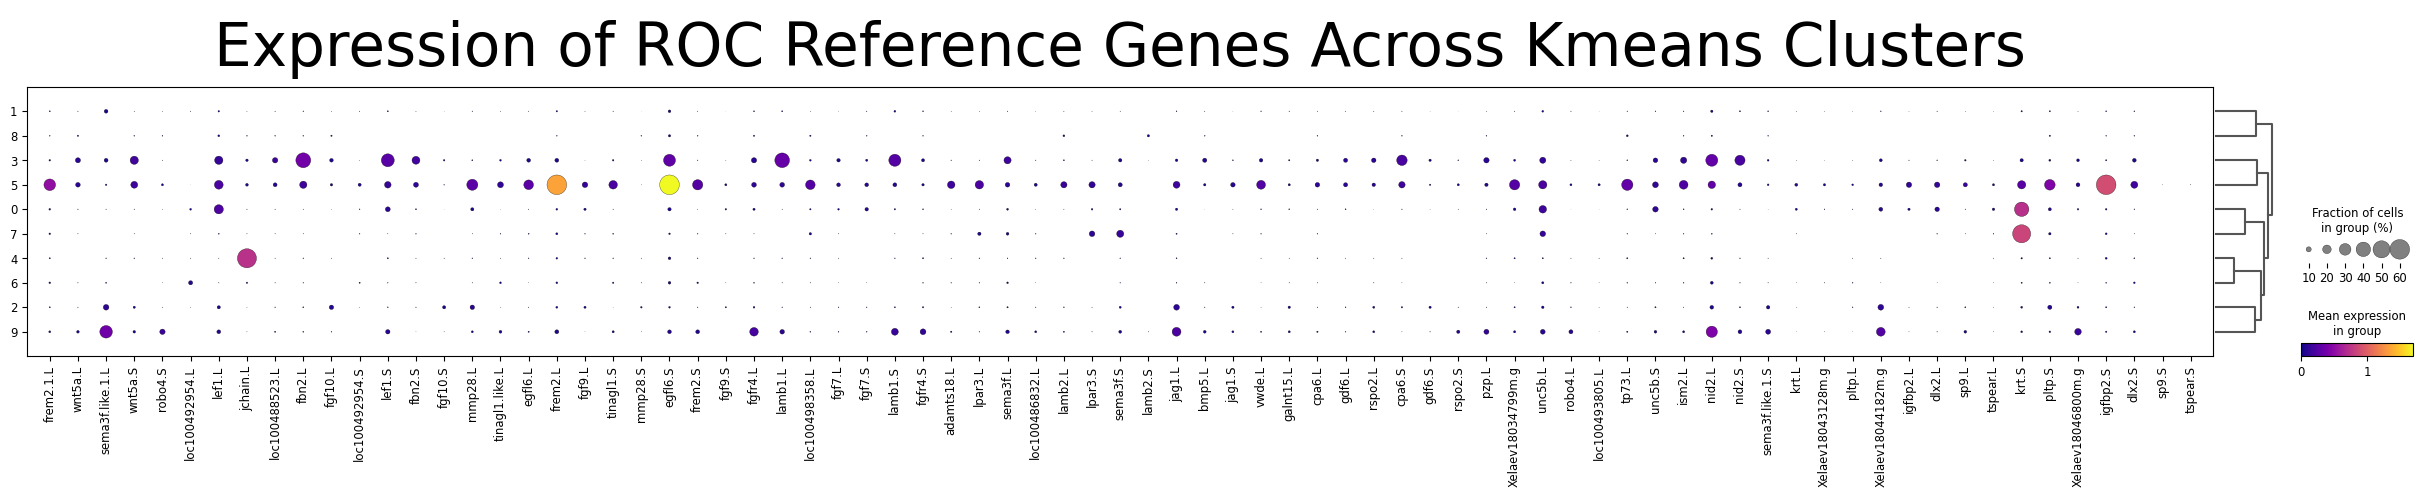

In [29]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os

#loop over Louvain and KMeans
for method, uns_key in [("louvain", "louvain_wilcox"), ("kmeans", "kmeans_logreg")]:
    marker_names = pd.DataFrame(adata.uns[uns_key]["names"])

    #compute overlap of top 50 markers with ROC list
    def clean_list(lst): return [clean_symbol(x) for x in lst]
    overlap = {}
    for cl in marker_names.columns:
        top50_clean = set(clean_list(marker_names[cl][:50]))
        overlap[cl] = len(top50_clean & roc_ref_set)

    #get ROC-enriched cluster
    roc_cluster = max(overlap, key=overlap.get)
    print(f"\n[{method.upper()}] ROC cluster (cleaned symbols): {roc_cluster} | overlap(top-50) = {overlap[roc_cluster]}")

    #dotplot
    sc.pl.dotplot(
        adata,
        var_names=plot_panel,
        groupby=method,
        dot_max=0.6,
        color_map="plasma",
        dendrogram=True,
        use_raw=use_raw_flag,
        show=False
    )
    fig = plt.gcf()
    ax = fig.axes[0]
    ax.set_title(f"Expression of ROC Reference Genes Across {method.capitalize()} Clusters", fontsize=43, pad=15)
    fig.tight_layout()
    dot_path = os.path.join(FIG_DIR, f"dotplot_roc_panel_{method.upper()}.png")
    fig.savefig(dot_path, dpi=150)
    display(Image(filename=dot_path))

    #umap highlighting roc cluster
    palette = [("#d62728" if c == str(roc_cluster) else "#d3d3d3")
               for c in adata.obs[method].cat.categories]
    sc.pl.umap(
        adata,
        color=method,
        groups=[roc_cluster],
        palette=palette,
        title=f"UMAP Highlighting ROC Cluster {roc_cluster} for {method.capitalize()}",
        show=False,
        save=f"_roc_cluster_{method.upper()}.png"
    )
    umap_path = os.path.join(FIG_DIR, f"umap_roc_cluster_{method.upper()}.png")
    print("Saved:", umap_path)
    display(Image(filename=umap_path))


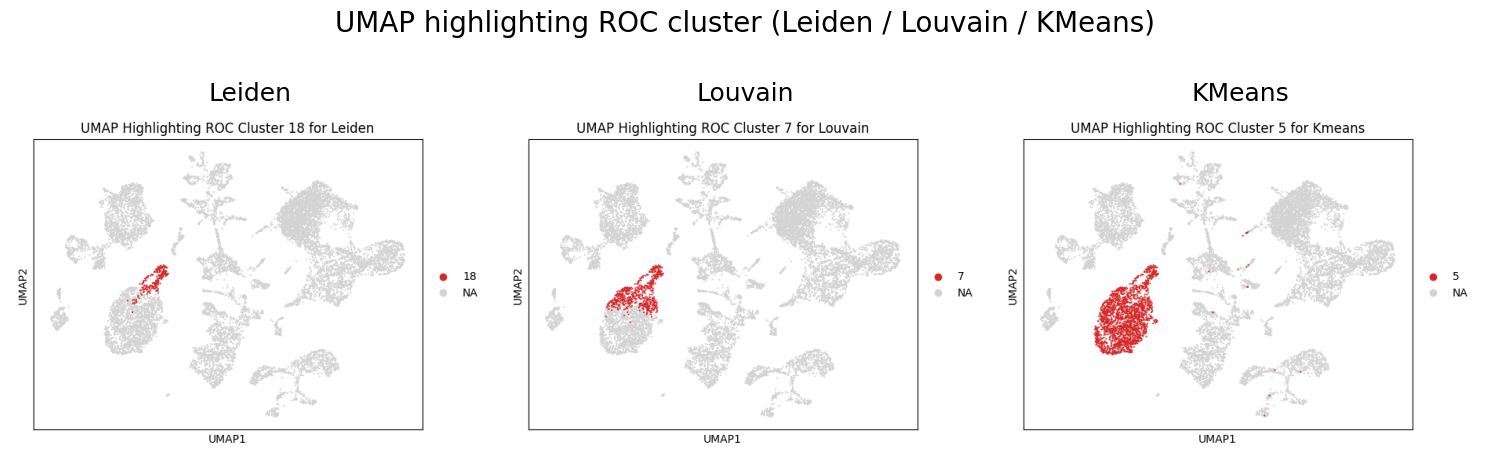

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/combined_umaps_roc.png


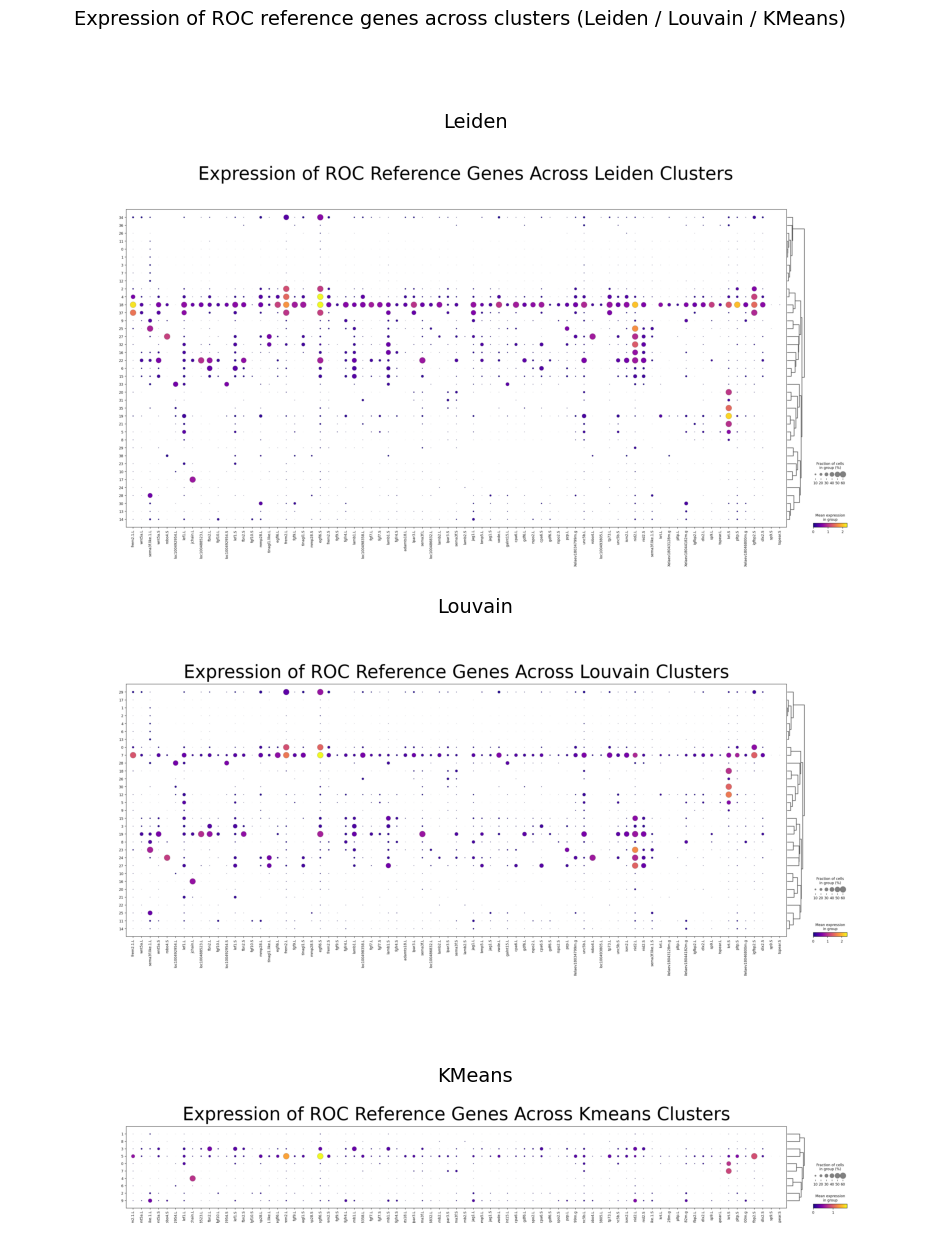

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/combined_dotplots_vertical_roc.png


In [30]:
#combine umap-highlight figures and dot-plot figures into two panels
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

BASE_DIR = "/content/drive/MyDrive/DataScienceMiniProject1"
FIG_DIR  = f"{BASE_DIR}/figures"

#maps to files
umap_candidates = {
    "Leiden":  [
        os.path.join(FIG_DIR, "umap_roc_cluster_FIXED.png"),
        os.path.join(FIG_DIR, "umap_roc_cluster_LEIDEN.png")
    ],
    "Louvain": [os.path.join(FIG_DIR, "umap_roc_cluster_LOUVAIN.png")],
    "KMeans":  [os.path.join(FIG_DIR, "umap_roc_cluster_KMEANS.png")],
}

dot_candidates = {
    "Leiden":  [
        os.path.join(FIG_DIR, "dotplot_roc_panel_FIXED.png"),
        os.path.join(FIG_DIR, "dotplot_roc_panel_LEIDEN.png")
    ],
    "Louvain": [os.path.join(FIG_DIR, "dotplot_roc_panel_LOUVAIN.png")],
    "KMeans":  [os.path.join(FIG_DIR, "dotplot_roc_panel_KMEANS.png")],
}

def first_existing(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    return None

#resolve actual existing paths
umap_files = [(method, first_existing(paths)) for method, paths in umap_candidates.items()]
dot_files  = [(method, first_existing(paths)) for method, paths in dot_candidates.items()]

umap_files = [(m, p) for (m, p) in umap_files if p is not None]
dot_files  = [(m, p) for (m, p) in dot_files  if p is not None]

#helper to make a 1xN image grid with titles (horizontal)
def make_panel_horizontal(pairs, out_path, suptitle):
    if not pairs:
        print(f"no images found for {suptitle}")
        return
    n = len(pairs)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]
    for ax, (method, path) in zip(axes, pairs):
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(method, fontsize=18, pad=10)
        ax.axis("off")
    fig.suptitle(suptitle, fontsize=20, y=0.98)
    plt.tight_layout(rect=(0, 0, 1, 0.95))
    fig.savefig(out_path, dpi=150)
    plt.show()
    print("Saved:", out_path)

# helper to make an Nx1 image grid with minimal spacing
def make_panel_vertical(pairs, out_path, suptitle):
    if not pairs:
        print(f"no images found for {suptitle}")
        return
    n = len(pairs)
    fig, axes = plt.subplots(n, 1, figsize=(12, 6*n))
    if n == 1:
        axes = [axes]

    for ax, (method, path) in zip(axes, pairs):
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(method, fontsize=14, pad=4)
        ax.axis("off")

    # remove all vertical spacing
    plt.subplots_adjust(hspace=0, top=0.96, bottom=0.02)

    #manually align axes edges flush
    for i, ax in enumerate(axes):
        pos = ax.get_position()
        if i > 0:
            prev_pos = axes[i-1].get_position()
            pos.y1 = prev_pos.y0
            pos.y0 = pos.y1 - (prev_pos.height)
            ax.set_position(pos)

    fig.suptitle(suptitle, fontsize=14, y=0.995)
    fig.savefig(out_path, dpi=200, bbox_inches="tight")
    plt.show()
    print("Saved:", out_path)

#combined umap panel
combined_umap_path = os.path.join(FIG_DIR, "combined_umaps_roc.png")
make_panel_horizontal(umap_files, combined_umap_path,
                      "UMAP highlighting ROC cluster (Leiden / Louvain / KMeans)")

#combined dot-plot panel
combined_dot_path  = os.path.join(FIG_DIR, "combined_dotplots_vertical_roc.png")
make_panel_vertical(dot_files, combined_dot_path,
                    "Expression of ROC reference genes across clusters (Leiden / Louvain / KMeans)")




[LEIDEN] ROC cluster (cleaned symbols): 18 | overlap(top-50) = 5


/tmp/ipython-input-4139797638.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


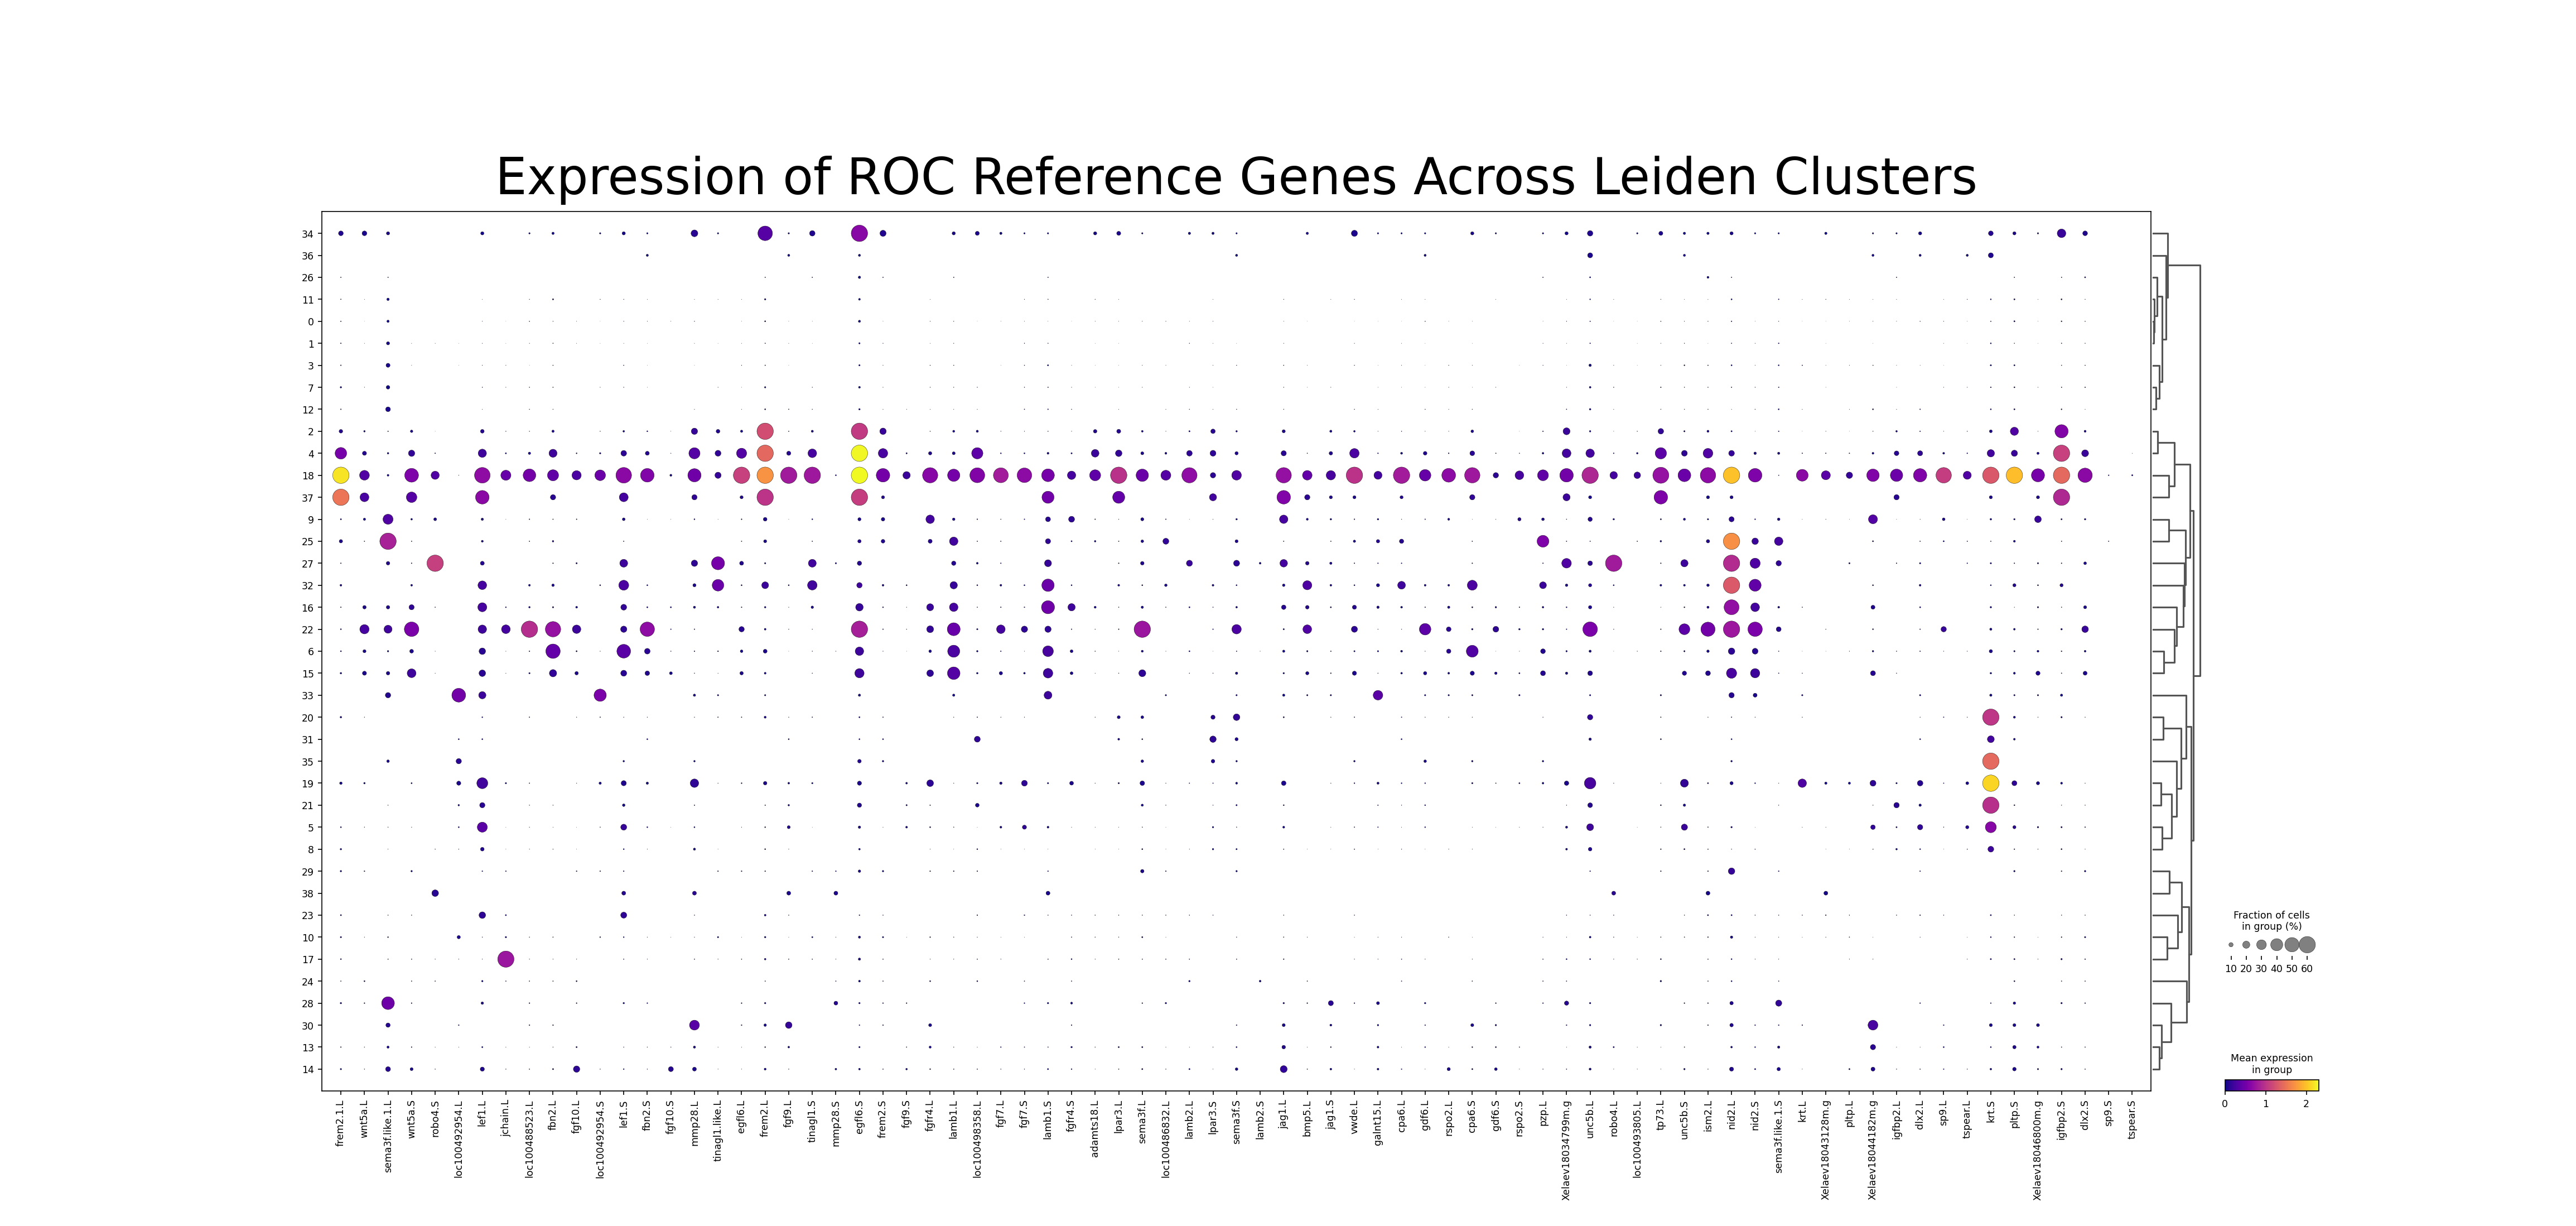

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/umap_roc_cluster_LEIDEN.png


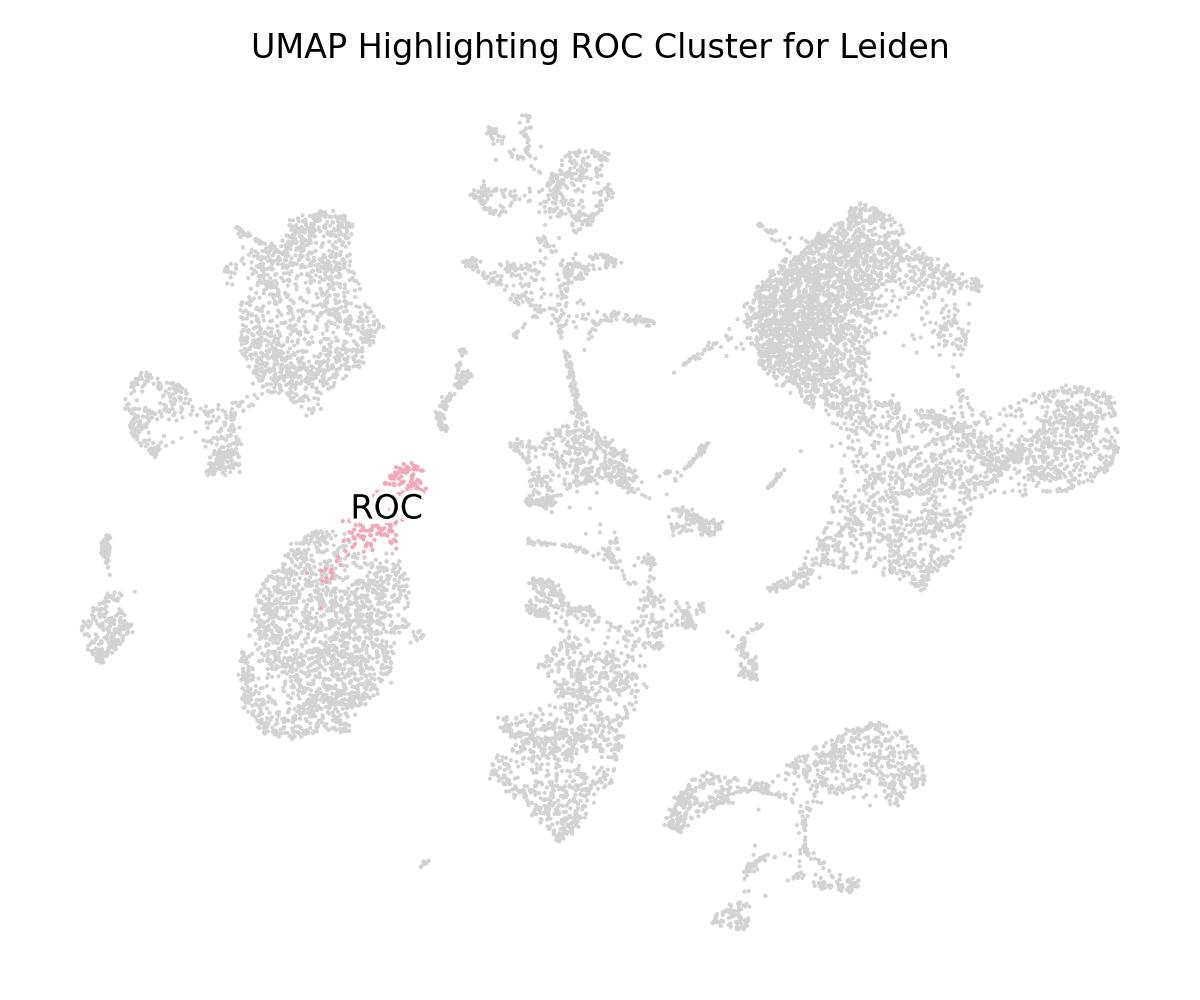


[LOUVAIN] ROC cluster (cleaned symbols): 7 | overlap(top-50) = 3


/tmp/ipython-input-4139797638.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


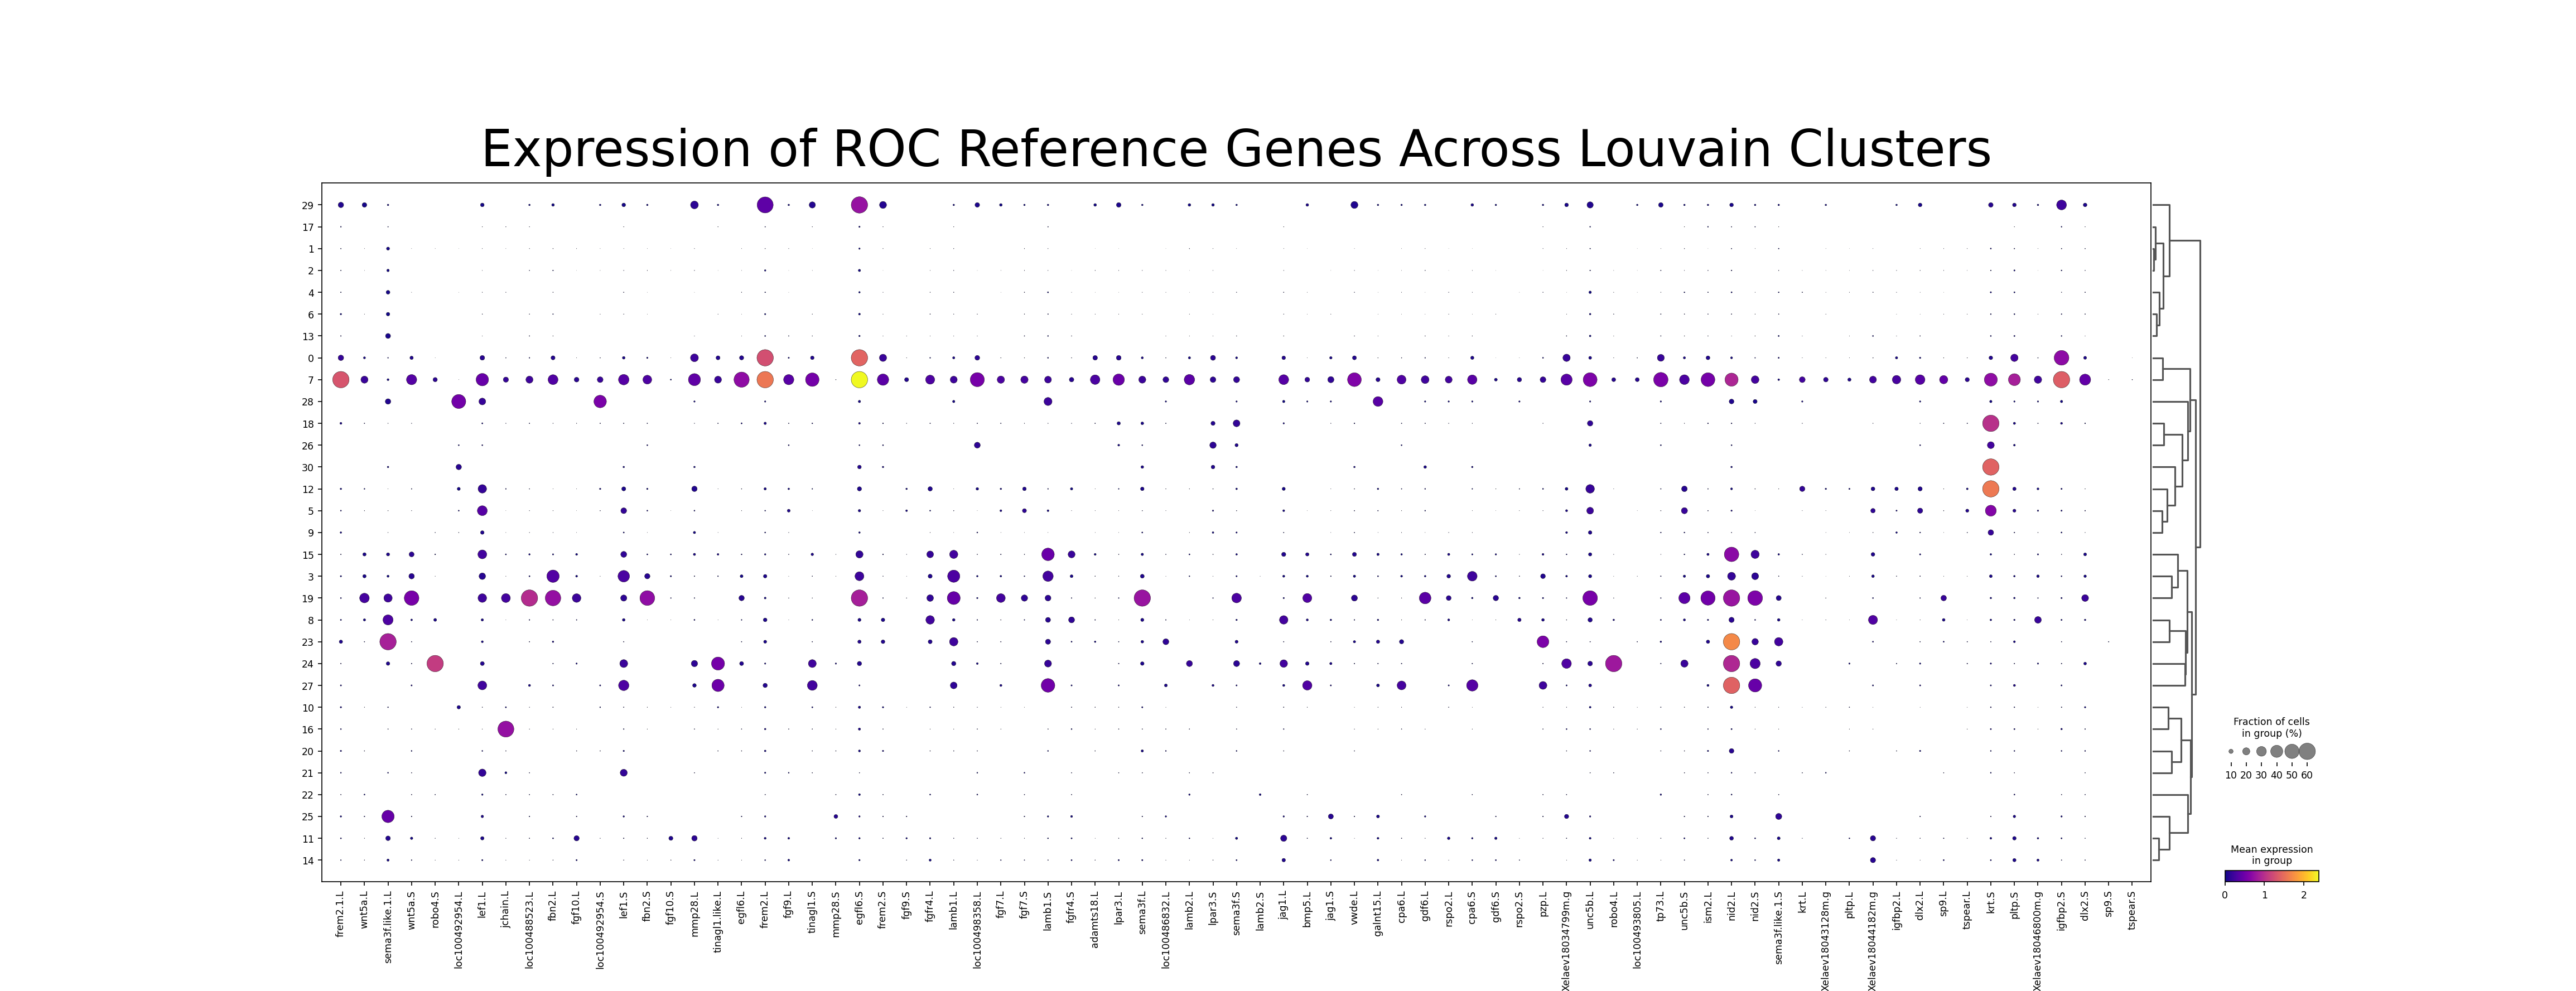

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/umap_roc_cluster_LOUVAIN.png


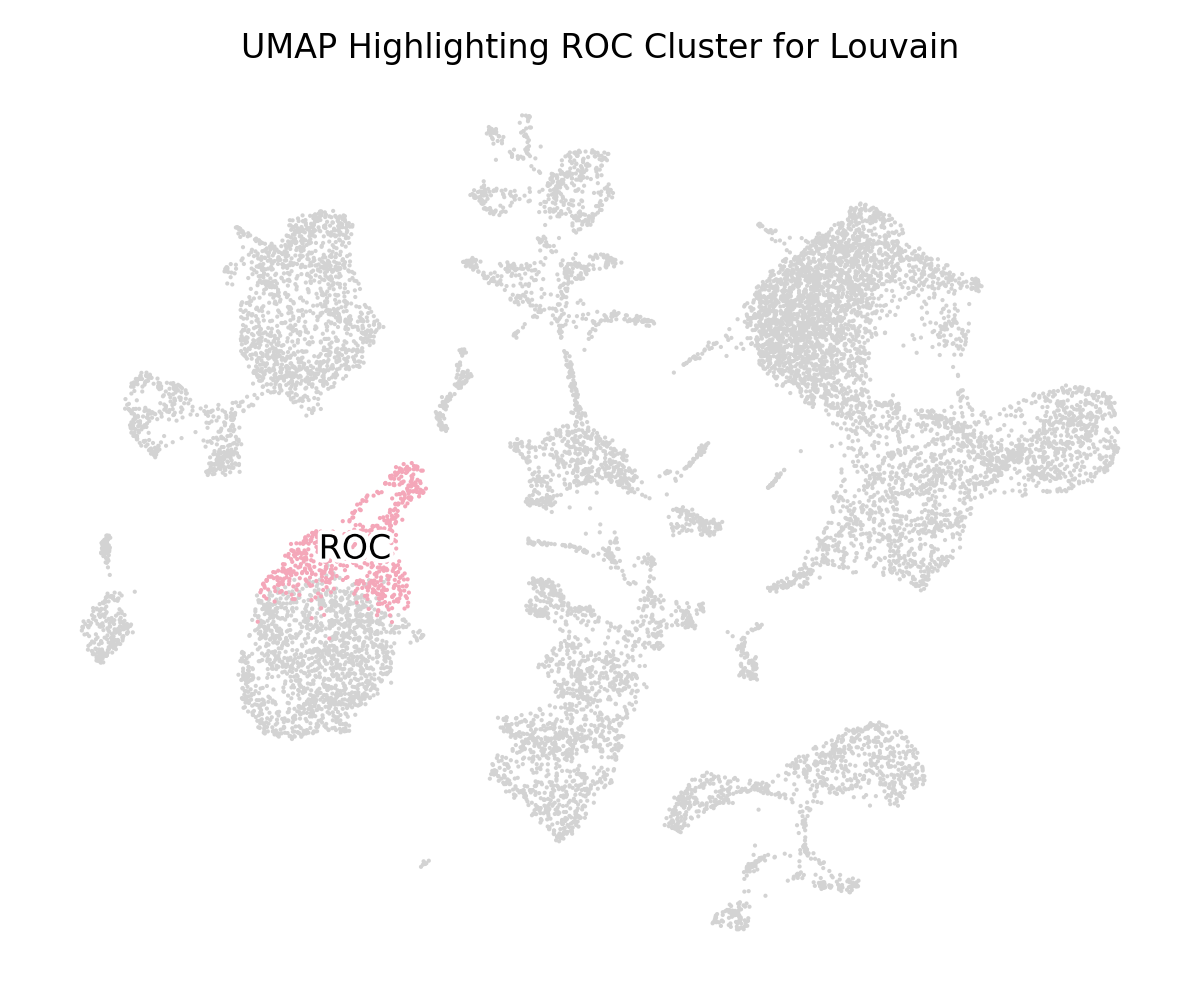


[KMEANS] ROC cluster (cleaned symbols): 5 | overlap(top-50) = 2


/tmp/ipython-input-4139797638.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


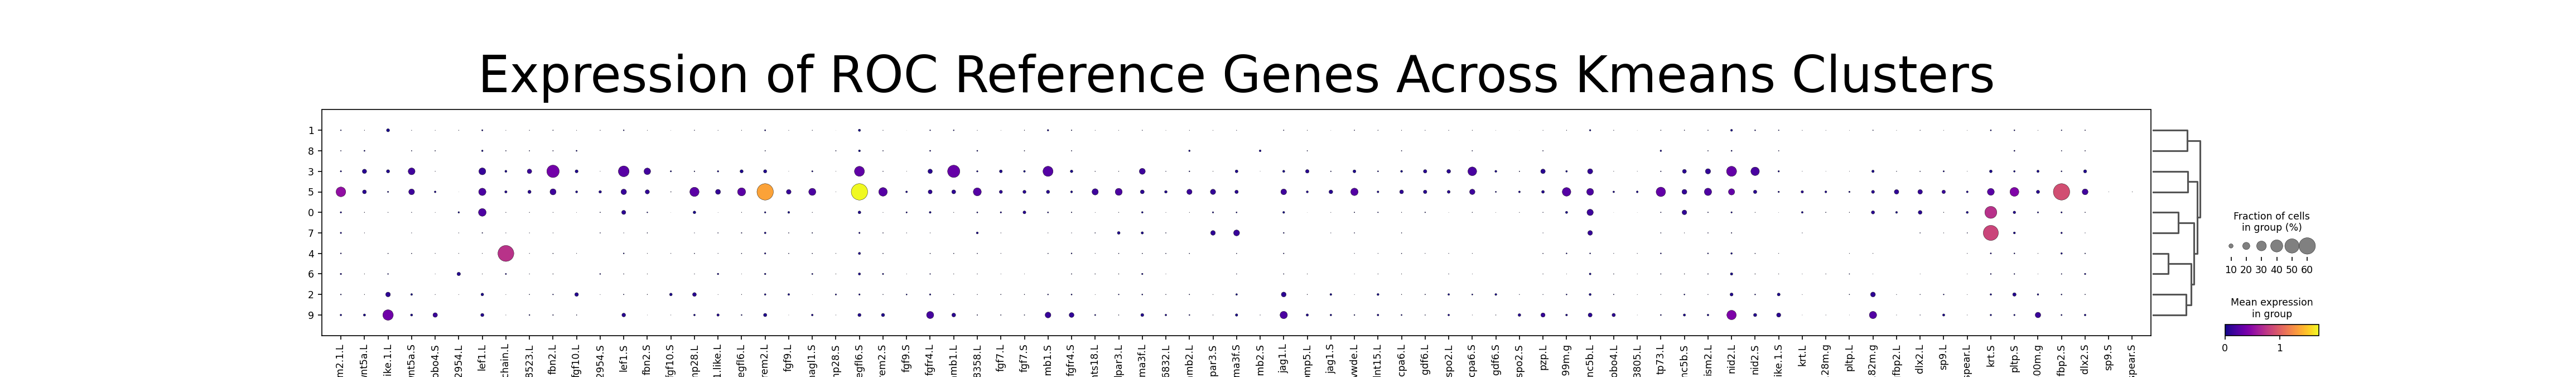

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/umap_roc_cluster_KMEANS.png


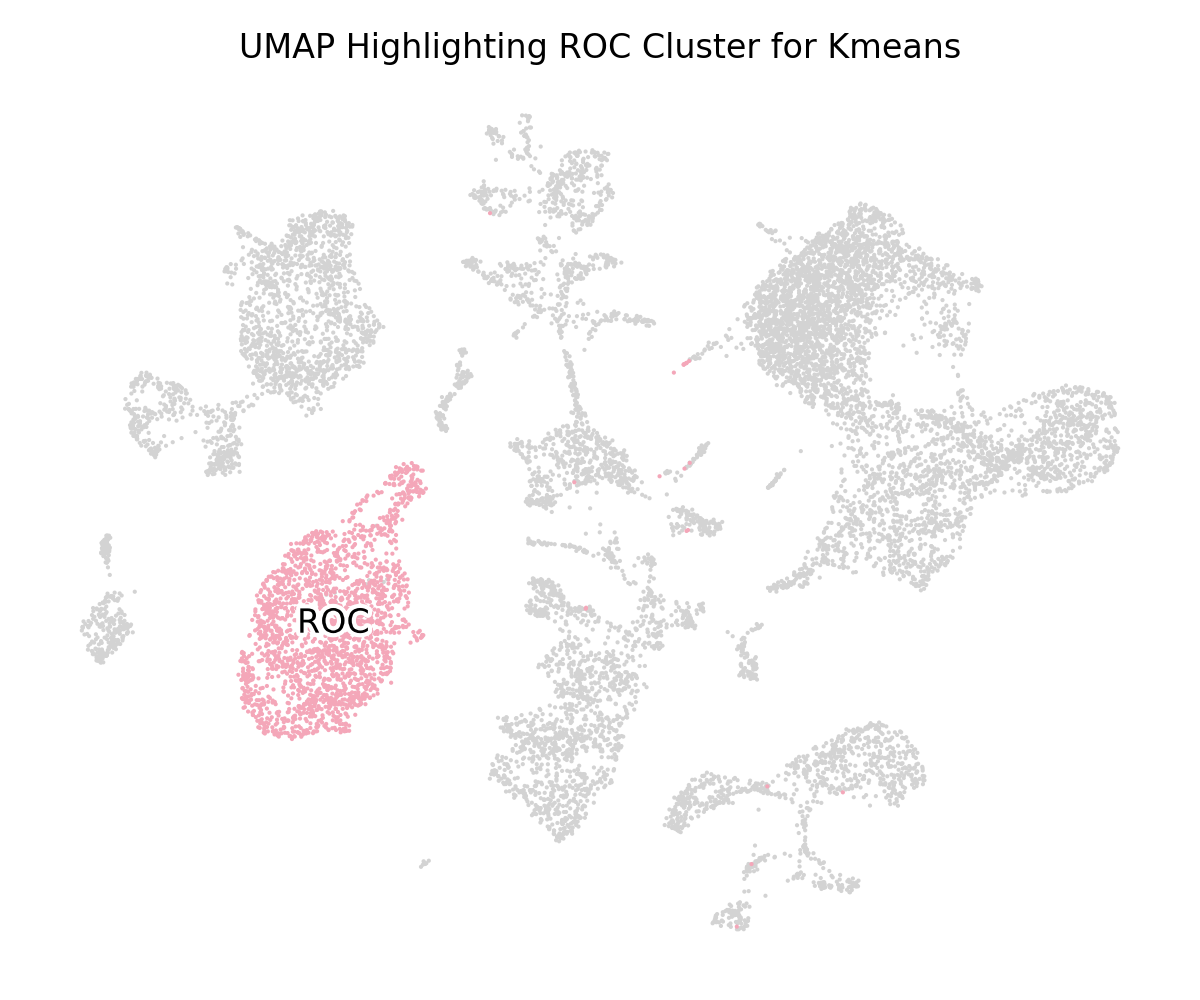

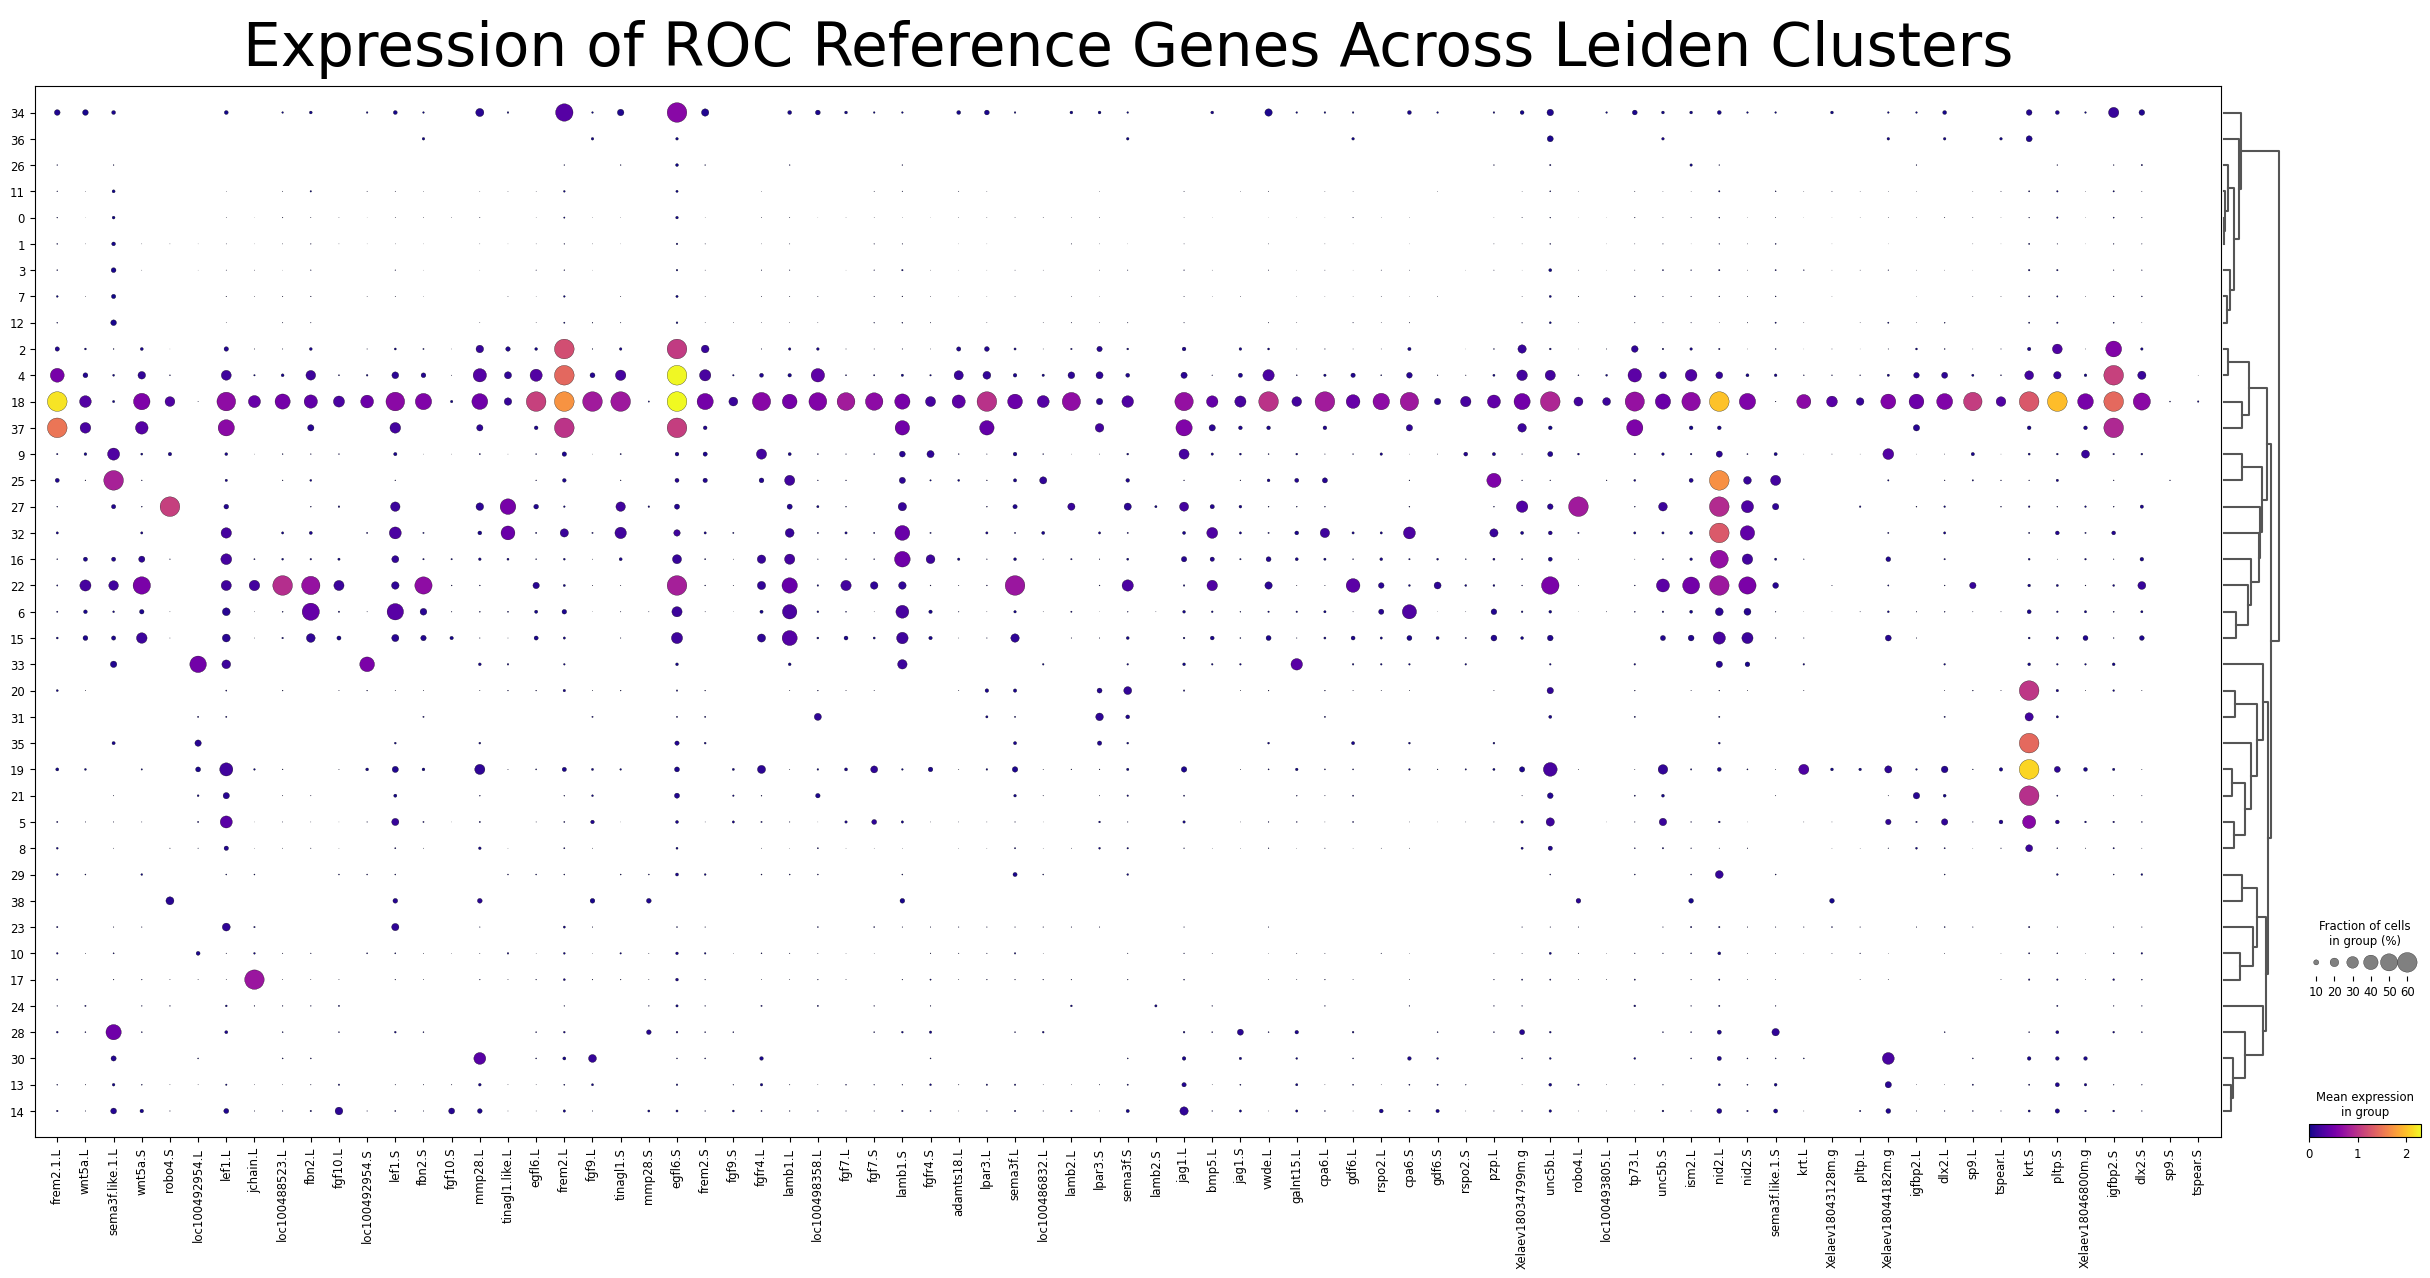

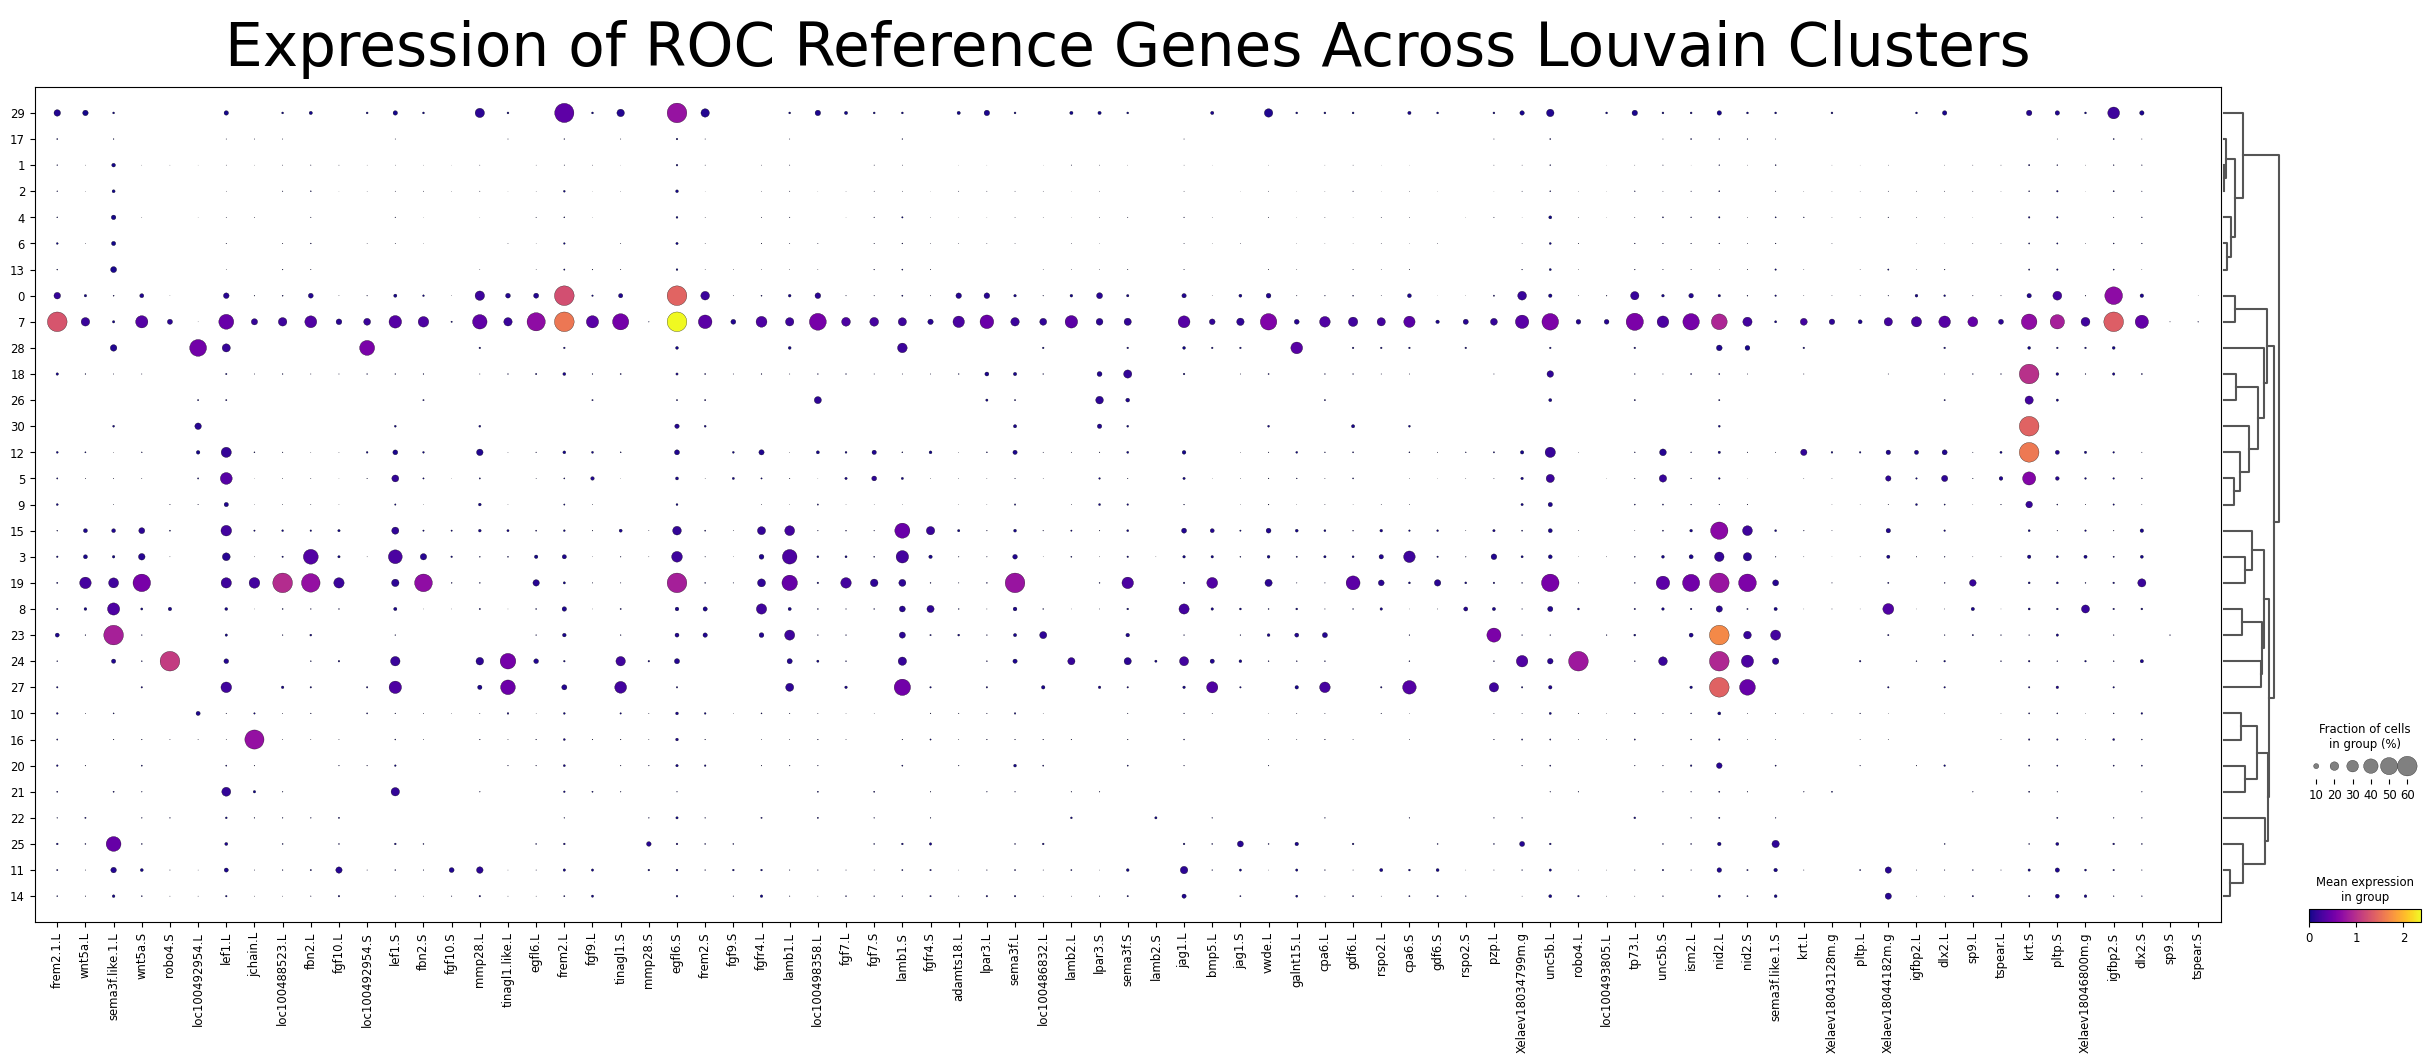

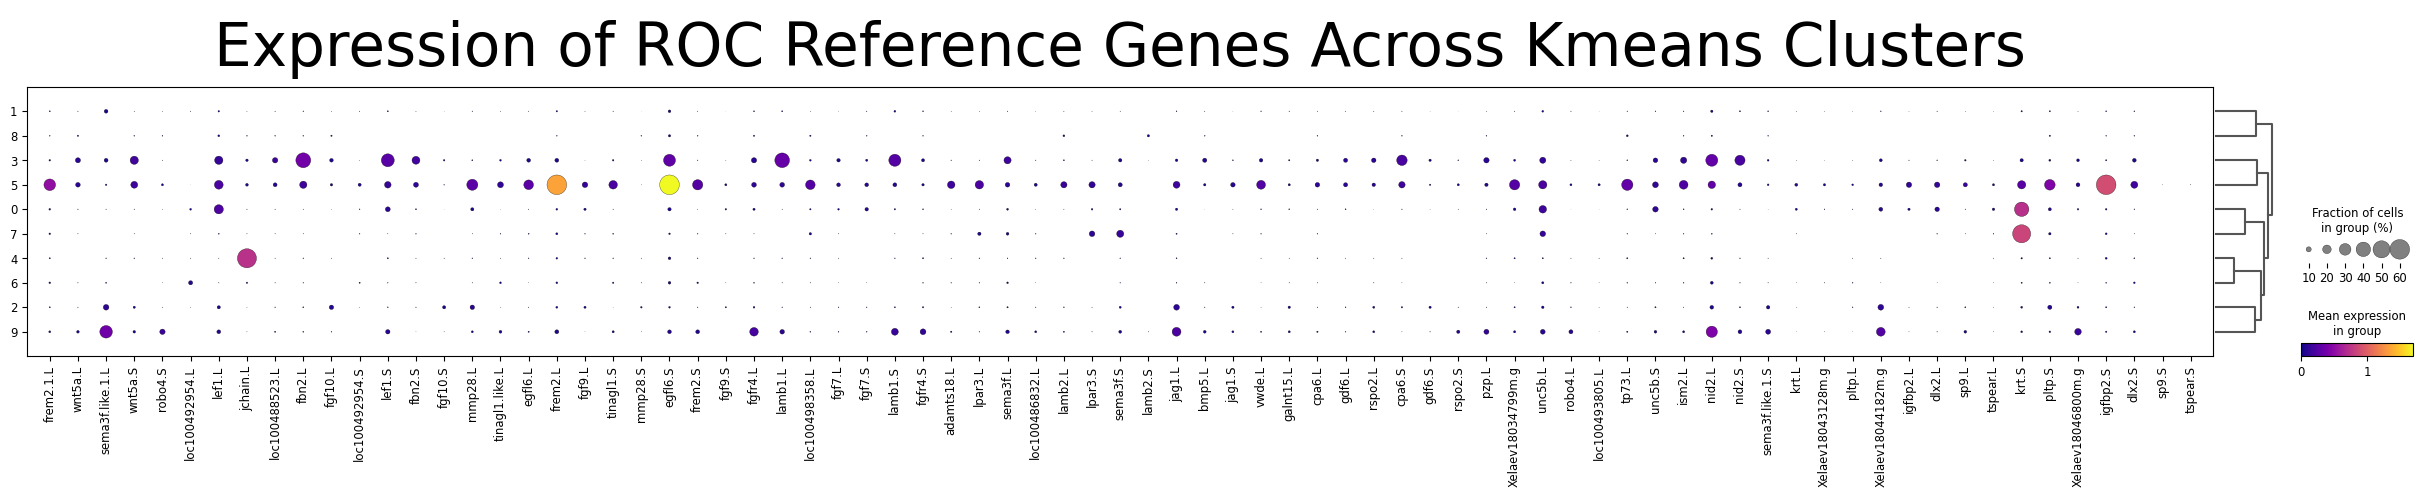

In [31]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
import pandas as pd
import os
import scanpy as sc

# ensure FIG_DIR exists
if 'FIG_DIR' not in globals():
    BASE_DIR = "/content/drive/MyDrive/DataScienceMiniProject1"
    FIG_DIR  = os.path.join(BASE_DIR, "figures")
os.makedirs(FIG_DIR, exist_ok=True)

# color constants
OTHER_GRAY = "#d3d3d3"
ROC_PASTEL = "#f4a7b9"

def annotate_centroid(ax, adata, method, roc_cluster):
    """Mark the ROC cluster centroid with text."""
    mask = (adata.obs[method].astype(str).values == str(roc_cluster))
    if not mask.any():
        return
    xy = adata.obsm["X_umap"][mask, :]
    x, y = float(np.mean(xy[:, 0])), float(np.mean(xy[:, 1]))
    txt = ax.text(
        x, y, "ROC", color="black", fontsize=12,
        ha="center", va="center"
    )
    txt.set_path_effects([pe.withStroke(linewidth=3, foreground="white")])

# loop over Leiden, Louvain, KMeans with saved figures and larger titles
for method, uns_key in [
    ("leiden",  "wilcox"),
    ("louvain", "louvain_wilcox"),
    ("kmeans",  "kmeans_logreg"),
]:
    # get marker gene names
    marker_names = pd.DataFrame(adata.uns[uns_key]["names"])

    # compute overlap of top 50 markers with ROC list
    def clean_list(lst): return [clean_symbol(x) for x in lst]
    overlap = {}
    for cl in marker_names.columns:
        top50_clean = set(clean_list(marker_names[cl][:50]))
        overlap[cl] = len(top50_clean & roc_ref_set)

    # get ROC-enriched cluster dynamically (no hardcoding)
    roc_cluster = max(overlap, key=overlap.get)
    print(f"\n[{method.upper()}] ROC cluster (cleaned symbols): {roc_cluster} | overlap(top-50) = {overlap[roc_cluster]}")

    # dotplot with large title
    sc.pl.dotplot(
        adata,
        var_names=plot_panel,
        groupby=method,
        dot_max=0.6,
        color_map="plasma",
        dendrogram=True,
        use_raw=use_raw_flag,
        show=False
    )
    fig = plt.gcf()
    ax = fig.axes[0]
    ax.set_title(f"Expression of ROC Reference Genes Across {method.capitalize()} Clusters", fontsize=43, pad=15)
    fig.tight_layout()
    dot_path = os.path.join(FIG_DIR, f"dotplot_roc_panel_{method.upper()}.png")
    fig.savefig(dot_path, dpi=150)
    display(Image(filename=dot_path))

    #UMAP highlighting ROC cluster
    cats = list(adata.obs[method].cat.categories)
    palette = [ROC_PASTEL if c == str(roc_cluster) else OTHER_GRAY for c in cats]

    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    sc.pl.umap(
        adata,
        color=method,
        palette=palette,
        groups=[roc_cluster],
        legend_loc=None,
        frameon=False,
        show=False,
        ax=ax,
        title=f"UMAP Highlighting ROC Cluster for {method.capitalize()}"
    )
    annotate_centroid(ax, adata, method, roc_cluster)
    fig.tight_layout()
    umap_path = os.path.join(FIG_DIR, f"umap_roc_cluster_{method.upper()}.png")
    fig.savefig(umap_path, dpi=200)
    plt.close(fig)
    print("Saved:", umap_path)
    display(Image(filename=umap_path))




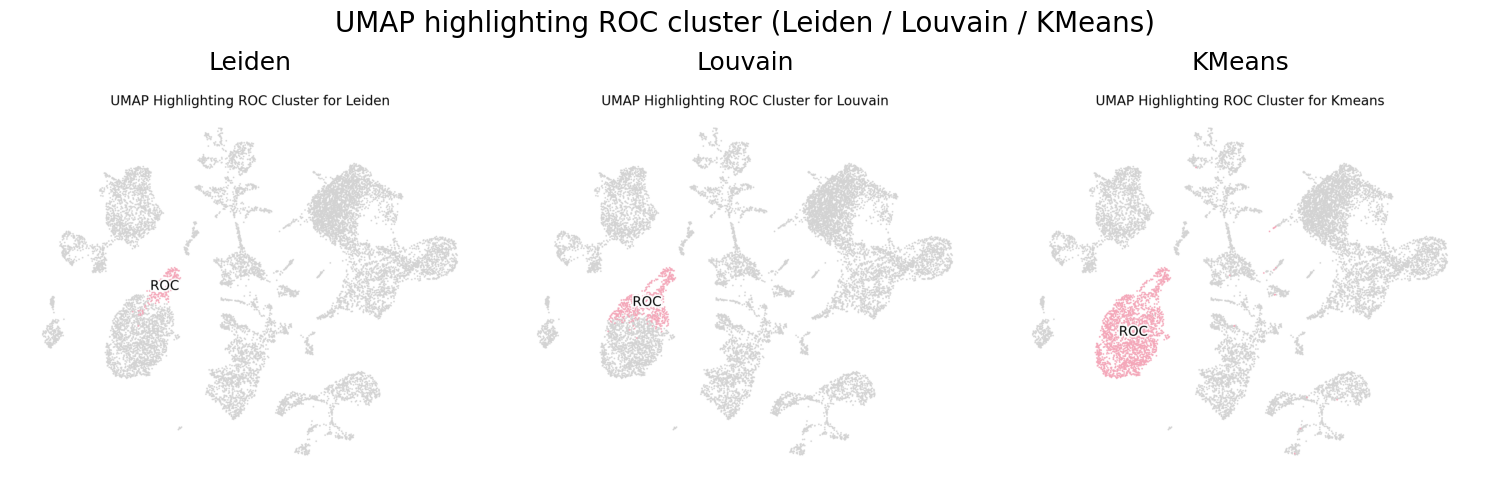

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/combined_umaps_roc.png


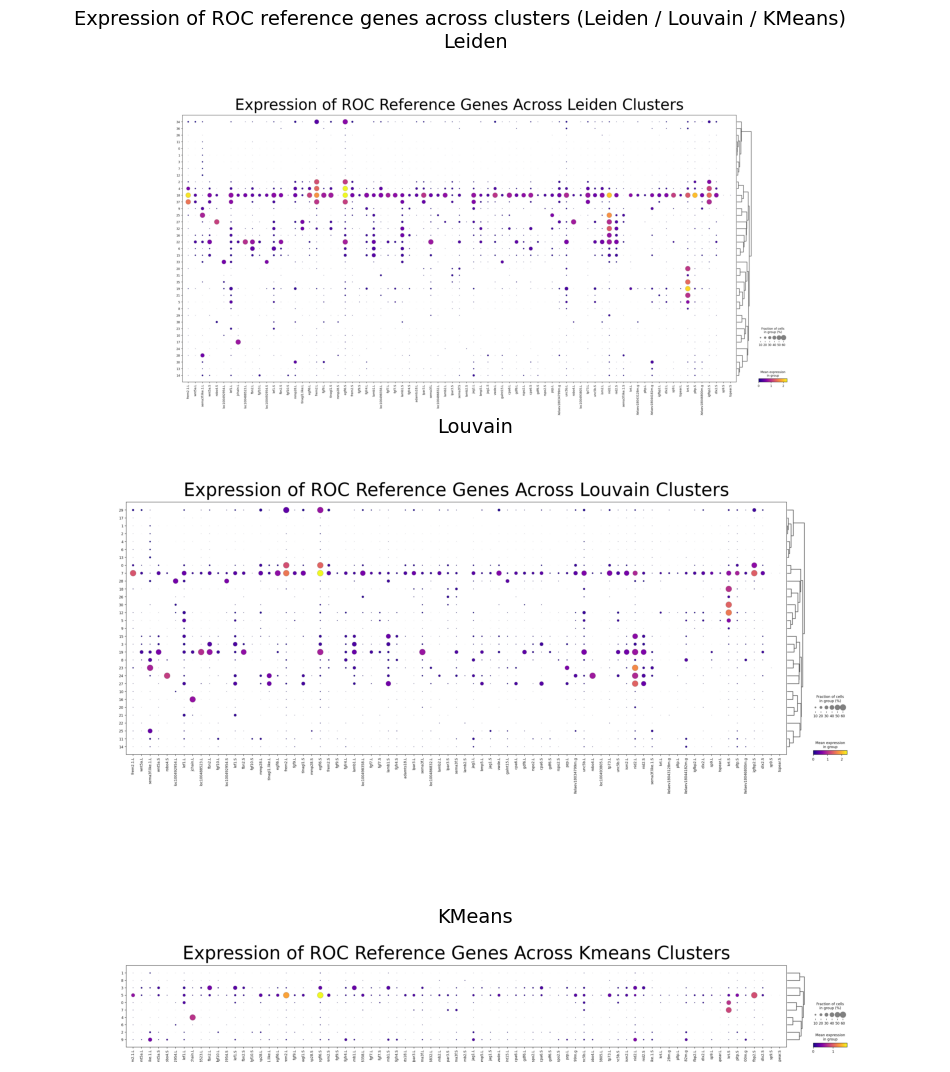

Saved: /content/drive/MyDrive/DataScienceMiniProject1/figures/combined_dotplots_vertical_roc.png


In [32]:
umap_candidates = {
    "Leiden":  [
        os.path.join(FIG_DIR, "umap_roc_cluster_LEIDEN.png")
    ],
    "Louvain": [os.path.join(FIG_DIR, "umap_roc_cluster_LOUVAIN.png")],
    "KMeans":  [os.path.join(FIG_DIR, "umap_roc_cluster_KMEANS.png")],
}
dot_candidates = {
    "Leiden":  [
        os.path.join(FIG_DIR, "dotplot_roc_panel_LEIDEN.png")
    ],
    "Louvain": [os.path.join(FIG_DIR, "dotplot_roc_panel_LOUVAIN.png")],
    "KMeans":  [os.path.join(FIG_DIR, "dotplot_roc_panel_KMEANS.png")],
}

def first_existing(paths):
    for p in paths:
        if os.path.exists(p):
            return p
    return None

umap_files = [(m, first_existing(p)) for m, p in umap_candidates.items() if first_existing(p)]
dot_files  = [(m, first_existing(p)) for m, p in dot_candidates.items() if first_existing(p)]

# horizontal 1×N panel
def make_panel_horizontal(pairs, out_path, suptitle):
    if not pairs:
        print(f"no images found for {suptitle}")
        return
    n = len(pairs)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]
    for ax, (method, path) in zip(axes, pairs):
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(method, fontsize=18, pad=10)
        ax.axis("off")
    fig.suptitle(suptitle, fontsize=20, y=0.98)
    plt.tight_layout(rect=(0, 0, 1, 0.95))
    fig.savefig(out_path, dpi=150)
    plt.show()
    print("Saved:", out_path)

# vertical panel
def make_panel_vertical(pairs, out_path, suptitle):
    """Create a vertical stack of images with minimal spacing between them."""
    if not pairs:
        print(f"no images found for {suptitle}")
        return
    n = len(pairs)
    fig, axes = plt.subplots(n, 1, figsize=(12, 4*n))
    if n == 1:
        axes = [axes]

    for ax, (method, path) in zip(axes, pairs):
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(method, fontsize=14, pad=2)
        ax.axis("off")

    # tight layout and smaller spacing
    plt.subplots_adjust(hspace=0.02, top=0.96, bottom=0.02)
    fig.suptitle(suptitle, fontsize=14, y=0.995)

    fig.savefig(out_path, dpi=200, bbox_inches="tight", pad_inches=0.1)
    plt.show()
    print("Saved:", out_path)

combined_umap_path = os.path.join(FIG_DIR, "combined_umaps_roc.png")
make_panel_horizontal(
    umap_files,
    combined_umap_path,
    "UMAP highlighting ROC cluster (Leiden / Louvain / KMeans)"
)

combined_dot_path  = os.path.join(FIG_DIR, "combined_dotplots_vertical_roc.png")
make_panel_vertical(
    dot_files,
    combined_dot_path,
    "Expression of ROC reference genes across clusters (Leiden / Louvain / KMeans)")

In [33]:
print("\n=== Leiden Cluster Markers ===")
pd.set_option("display.max_columns", None)
display(pd.DataFrame(adata.uns["wilcox"]["names"]).head(5))



=== Leiden Cluster Markers ===


0                  1                  2                  3  \
0              hbd.S  Xelaev18002241m.g           col1a2.S  Xelaev18045082m.g   
1  Xelaev18045099m.g  Xelaev18045099m.g  Xelaev18016080m.g  Xelaev18047452m.g   
2  Xelaev18002241m.g            rfesd.L           col1a2.L  Xelaev18047460m.g   
3            nmrk2.S              hbd.S           col1a1.S  Xelaev18047453m.g   
4              hbd.L             lmo2.S           col1a1.L  Xelaev18045095m.g   

           4                  5                  6                  7  \
0      lum.L  Xelaev18040854m.g           col9a3.L            dck.2.L   
1      lum.S  Xetrov90024133m.S           col9a1.L  Xelaev18047464m.g   
2    egfl6.S  Xelaev18045649m.g           col2a1.L  Xelaev18047462m.g   
3  c2orf40.L     loc100494945.L           col9a2.L  Xelaev18045098m.g   
4  col17a1.L  Xetrov90018123m.L  Xelaev18036372m.g           rrm2.2.S   

                   8               9                 10                 11  \
0           umod.2.L  efcab10.like.L            crp.4.L  Xelaev18047455m.g   
1  Xelaev18012141m.g          krt8.S          arhgdib.S              hbd.L   
2  Xelaev18015037m.g  loc100490646.L     loc100485744.L  Xelaev18047464m.g   
3  Xetrov90018123m.L         krt19.L          arhgdib.L  Xelaev18045098m.g   
4  Xelaev18028467m.g          krt8.L  Xelaev18045052m.g              ca2.L   

                  12        13        14          15                 16  \
0          ccnb1.2.L    sncb.S   stmn2.S     thbs4.S  Xelaev18016933m.g   
1  Xelaev18038180m.g  elavl4.L  snap25.L      fbn3.L            rps15.S   
2          ccnb1.2.S  tuba1b.L   stmn2.L  tnc.like.L             ppia.L   
3             cdk1.L    gng3.L  mllt11.S      nid1.S            rpl23.S   
4   loc548390.like.S  tuba1b.S   tubb3.L      ptx3.L  Xelaev18024282m.g   

               17              18                 19                 20  \
0           mpo.L    apoc1.like.L            itln1.L           cystm1.L   
1        prss57.L       col14a1.S  Xelaev18022531m.g  Xelaev18020203m.g   
2          mmp7.L  loc100486548.L     loc100494945.S  Xelaev18041411m.g   
3           tkt.S           mdk.L  Xelaev18022528m.g         atp6v1g3.S   
4  loc101733140.L         fras1.L             ftmt.S  Xelaev18017913m.g   

               21            22                 23       24              25  \
0  loc100492852.L  hpd.like.1.L          arhgdib.L    ckm.L  loc100490646.S   
1  loc100127564.L        vcan.L          arhgdib.S   myl1.L  loc100490646.L   
2         itln1.L        ptx3.S            rplp1.L   myl1.S           shh.L   
3          pck1.L        ptx3.L  Xelaev18038083m.g  mylpf.L        col8a1.S   
4          fbp1.L      cpamd8.L             lcp1.L  tnnt3.S          ctgf.L   

          26          27        28                   29        30  \
0     ccl4.L     icam5.S    tal2.L               ctsl.L   map1b.L   
1   ccl42d.L      cd81.S    scg2.S               gzmh.S  atp1b3.S   
2  edaradd.L       prx.L   calm2.S  loc100493999.like.L  atp1b3.L   
3    eif5b.L  marcksl1.L  tubb2b.S            tspan32.L  elavl4.L   
4    rfesd.L      cdh5.L   meis2.L  loc100493999.like.S   calm2.L   

                  31              32                 33                 34  \
0        slc26a2.2.L          eln2.L     loc100486548.S           slc4a1.L   
1         atp6v1b1.L  loc101731328.L           ednrb2.S  Xelaev18002241m.g   
2         atp6v0d2.L         krt18.S            hpgds.S              ca2.L   
3         atp6v0a4.L  loc100497103.S  Xetrov90007079m.L  Xelaev18047463m.g   
4  Xelaev18040968m.g  loc100497103.L          slc45a2.L            nmrk2.L   

                  35                   36        37              38  
0  Xelaev18047861m.g    Xelaev18002241m.g     fn1.L         ctgfl.L  
1             otog.S  loc100497279.like.L     mdk.L         rap1a.L  
2  Xelaev18037830m.g    Xelaev18047463m.g  ifitm3.S  loc105948211.L  
3  Xetrov90010969m.L                ca2.L   krt16.S         clic1.L  
4            

In [34]:
print("\n=== Louvain Cluster Markers ===")
pd.set_option("display.max_columns", None)
display(pd.DataFrame(adata.uns["louvain_wilcox"]["names"]).head(5))



=== Louvain Cluster Markers ===


0                  1                  2                  3  \
0  col1a2.S  Xelaev18045099m.g              hbd.L  Xelaev18036372m.g   
1  col1a1.L  Xelaev18002241m.g              hbd.S             nid1.S   
2  col1a2.L              hbd.S              ca2.L     loc101733581.L   
3  col1a1.S            rfesd.L  Xelaev18045098m.g           ifitm1.S   
4  fgfbp2.L            nmrk2.S  Xelaev18045099m.g             fbn3.L   

                   4                  5                  6             7  \
0  Xelaev18045082m.g  Xelaev18040854m.g            dck.2.L     col14a1.S   
1  Xelaev18047452m.g  Xetrov90024133m.S  Xelaev18047464m.g         mdk.L   
2  Xelaev18047460m.g  Xelaev18045649m.g  Xelaev18047462m.g  apoc1.like.L   
3  Xelaev18047453m.g              mal.L  Xelaev18047455m.g       egfl6.S   
4  Xelaev18045095m.g  Xetrov90018123m.L  Xelaev18045098m.g         id3.S   

                8                  9                 10        11  \
0  efcab10.like.L           umod.2.L            crp.4.L   stmn2.S   
1          krt8.S  Xelaev18012141m.g  Xelaev18018927m.g   map1b.L   
2  loc100490646.L  Xelaev18015037m.g       unnamed.L.13   stmn2.L   
3         krt19.L  Xetrov90018123m.L  Xelaev18045052m.g  snap25.L   
4          krt8.L  Xelaev18028467m.g             psap.S  atp1b3.L   

                  12                 13        14                 15  \
0            itln1.L          ccnb1.2.L  elavl4.L             ppia.L   
1     loc100127564.L  Xelaev18038180m.g    sncb.S  Xelaev18016933m.g   
2     loc100494945.S          ccnb1.2.S  tuba1b.L            rps15.S   
3             ftmt.S             cdk1.L  tuba1b.S            rpl23.S   
4  Xelaev18019895m.g   loc548390.like.S    gng3.L  Xelaev18012629m.g   

               16        17                 18            19  \
0           mpo.L   hebp2.S           cystm1.L  hpd.like.1.L   
1        prss57.L  mthfd2.L  Xelaev18020203m.g        vcan.L   
2          mmp7.L   rfesd.L         atp6v1g3.S        ptx3.S   
3           tkt.S   nmrk2.L  Xelaev18017913m.g        ptx3.L   
4  loc101733140.L    lmo2.S  Xelaev18041411m.g         tnn.L   

                    20         21       22              23          24  \
0  loc100493999.like.S  arhgdib.L    ckm.L  loc100490646.S     icam5.S   
1  loc100493999.like.L  arhgdib.S   myl1.L  loc100490646.L      cd81.S   
2            arhgdib.L     lcp1.L   myl1.S           shh.L       prx.L   
3               cst7.L  coro6.1.L  mylpf.L        col8a1.S  marcksl1.L   
4               rgs1.L    hmgn2.L  tnnt3.S          ctgf.L      cdh5.L   

         25                 26              27                 28  \
0    scg2.S        slc26a2.2.L  loc101731328.L     loc100486548.S   
1    tal2.L         atp6v1b1.L         krt18.S           ednrb2.S   
2   calm2.S         atp6v0d2.L  loc100497103.L            hpgds.S   
3  tubb2b.S         atp6v0a4.L          eln2.L          slc45a2.L   
4   meis2.L  Xelaev18040968m.g          epyc.L  Xetrov90007079m.L   

                  29                 30  
0           slc4a1.L  Xelaev18047861m.g  
1              lum.L             otog.S  
2              ca2.L  Xelaev18037830m.g  
3  Xelaev18047463m.g  Xetrov90010969m.L  
4  Xelaev18002241m.g            camk1.L

In [35]:
print("\n=== KMeans Cluster Markers ===")
pd.set_option("display.max_columns", None)
display(pd.DataFrame(adata.uns["kmeans_logreg"]["names"]).head(5))


=== KMeans Cluster Markers ===


0                  1         2                  3  \
0     loc100494945.S  Xelaev18045099m.g   stmn2.L             ptx3.L   
1  Xelaev18034081m.g              hbd.S   stmn2.S           col2a1.L   
2     loc100494945.L  Xelaev18002241m.g    sncb.L           col9a1.L   
3  Xelaev18040854m.g             ctsl.L  tubb2b.S  Xelaev18036372m.g   
4  Xelaev18045649m.g  Xelaev18047455m.g  snap25.L             nid1.S   

           4             5                  6                  7  \
0      mpo.L      col1a1.S            crp.4.L  Xelaev18045363m.g   
1   prss57.L  apoc1.like.L         MGC75752.S  Xelaev18040968m.g   
2  slurp1l.S      col1a1.L     loc100487364.L  Xelaev18020998m.g   
3     mmp7.L         mdk.L             psap.S        atp6ap1.1.S   
4      epx.L         lum.L  Xelaev18018927m.g          atp6v0c.L   

                   8               9  
0  Xelaev18045307m.g          krt8.S  
1             act3.L        hes5.1.S  
2            tnnc2.L  loc100490646.L  
3  Xelaev18047608m.g  loc100490646.S  
4  Xelaev18045303m.g         krt19.L

In [36]:
# only label the skin-related clusters
leiden_labels = {
    "18": "ROC"}

louvain_labels = {
    "7": "ROC"}

kmeans_labels = {
    "5": "ROC"}


In [37]:
# use original clustering columns
adata.obs["plot_leiden_named"] = adata.obs["leiden"].map(leiden_labels).fillna(adata.obs["leiden"])
adata.obs["plot_louvain_named"] = adata.obs["louvain"].map(louvain_labels).fillna(adata.obs["louvain"])
adata.obs["plot_kmeans_named"] = adata.obs["kmeans"].map(kmeans_labels).fillna(adata.obs["kmeans"])


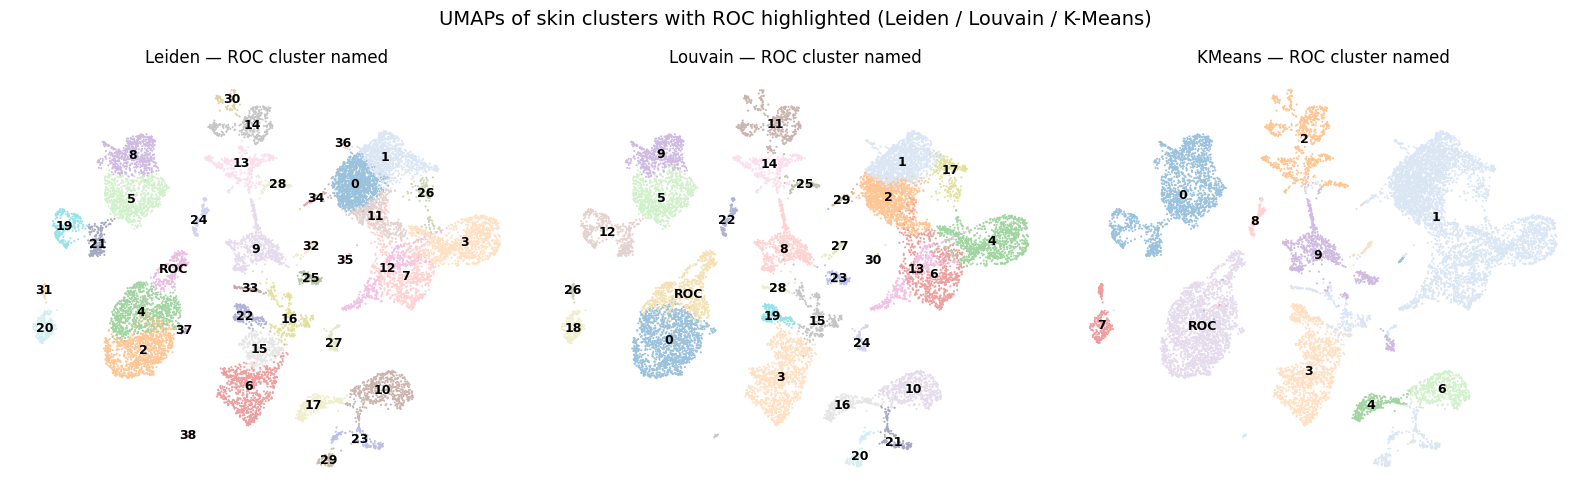

In [42]:
import matplotlib.pyplot as plt, matplotlib.colors as mcolors
import seaborn as sns
import os

pal = [*plt.get_cmap("tab20").colors,
       *plt.get_cmap("tab20b").colors,
       *plt.get_cmap("tab20c").colors]
base_hex = [mcolors.to_hex(c) for c in pal]

def lighten_hex(hex_color, amount=0.6):
    r, g, b = mcolors.to_rgb(hex_color)
    r = r + (1.0 - r) * amount
    g = g + (1.0 - g) * amount
    b = b + (1.0 - b) * amount
    return mcolors.to_hex((r, g, b))

#make a light/pastel version of the palette
distinct_palette = [lighten_hex(h, amount=0.55) for h in base_hex]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# leiden umap
sc.pl.umap(
    adata,
    color="plot_leiden_named",
    title="Leiden — ROC cluster named",
    legend_loc="on data",
    legend_fontsize=9,
    palette=distinct_palette,
    ax=axes[0],
    frameon=False,
    show=False
)

# louvain umap
sc.pl.umap(
    adata,
    color="plot_louvain_named",
    title="Louvain — ROC cluster named",
    legend_loc="on data",
    legend_fontsize=9,
    palette=distinct_palette,
    ax=axes[1],
    frameon=False,
    show=False
)

# kmeans umap
sc.pl.umap(
    adata,
    color="plot_kmeans_named",
    title="KMeans — ROC cluster named",
    legend_loc="on data",
    legend_fontsize=9,
    palette=distinct_palette,
    ax=axes[2],
    frameon=False,
    show=False
)

fig.suptitle("UMAPs of skin clusters with ROC highlighted (Leiden / Louvain / K-Means)", fontsize=14, y=0.98)
plt.subplots_adjust(top=0.90)  # leave space for the suptitle

plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "umap_named_skin_clusters_roc_clusters_distinct.png"), dpi=150)
plt.show()


In [ ]:
import os, numpy as np, pandas as pd, scanpy as sc

BASE_DIR = globals().get("BASE_DIR", "/content/drive/MyDrive/DataScienceMiniProject1")
OUT_DIR  = globals().get("OUT_DIR",  f"{BASE_DIR}/outputs")
REFS_DIR = globals().get("REFS_DIR", f"{BASE_DIR}/refs")
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(REFS_DIR, exist_ok=True)

def clean_sym(x: str) -> str:
    s = str(x).upper().strip()
    s = s.split(".")[0].split("_")[0]
    return s

def clean_list(lst):
    return [clean_sym(x) for x in lst]


roc_csv = os.path.join(REFS_DIR, "rocGenes.csv")
if not os.path.exists(roc_csv):
    raise FileNotFoundError(f"Missing ROC reference file: {roc_csv}")
roc_ref = pd.read_csv(roc_csv, header=None).iloc[:,0].astype(str).map(clean_sym).tolist()
roc_ref_set = set(roc_ref)

#ensure a raw layer
if adata.raw is None:
    ad_norm = adata.copy()
    sc.pp.normalize_total(ad_norm, target_sum=1e4)
    sc.pp.log1p(ad_norm)
    adata.raw = ad_norm

#compute Leiden DE (Wilcoxon) if needed
if "wilcox" not in adata.uns:
    sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon",
                            use_raw=True, key_added="wilcox")

# recompute roc_cluster from Leiden to avoid tale globals
wilcox_names_all = pd.DataFrame(adata.uns["wilcox"]["names"])
overlaps = {}
for cl_ in wilcox_names_all.columns:
    top50 = set(clean_list(wilcox_names_all[cl_][:50]))
    overlaps[cl_] = len(top50 & roc_ref_set)
roc_cluster_leiden = max(overlaps, key=overlaps.get)
print(f"Set roc_cluster_leiden = {roc_cluster_leiden} (overlap(top-50) = {overlaps[roc_cluster_leiden]})")

# sanity check
if adata.raw is not None and "symbol_clean" in adata.raw.var:
    present_syms = set(adata.raw.var["symbol_clean"].astype(str).map(clean_sym))
elif "symbol_clean" in adata.var:
    present_syms = set(adata.var["symbol_clean"].astype(str).map(clean_sym))
else:
    present_syms = set(pd.Index(adata.var_names).astype(str).map(clean_sym))
s3_present = len(roc_ref_set & present_syms)
print(f"S3 genes present in matrix: {s3_present}/{len(roc_ref_set)}")

# build marker table for that Leiden cluster
cl = str(roc_cluster_leiden)
U = adata.uns["wilcox"]
names  = pd.Series(U["names"][cl])
scores = pd.Series(U["scores"][cl]).astype(float)
has_lfc = "logfoldchanges" in U
lfc    = pd.Series(U["logfoldchanges"][cl]).astype(float) if has_lfc else pd.Series(np.nan, index=names.index)

df_markers = (pd.DataFrame({"gene": names, "score": scores, "logfc": lfc})
                .assign(sym=lambda d: d["gene"].map(clean_sym))
                .query("logfc > 0 or @has_lfc == False")
                .sort_values(["score", "logfc"], ascending=False, na_position="last"))

# sanity check -  S3 hits within top-50 for this cluster
cl_markers = set(clean_list(U["names"][cl][:50]))
shared = sorted(cl_markers & roc_ref_set)
print(f"ROC genes driving Leiden cluster {cl} identity (S3 overlap): {shared}")

TOPKS = [50, 100, 200]
s3_set = set(roc_ref_set)

def validate_vs_s3(df_markers, s3_set, cl, topk, out_dir):
    top = df_markers.head(topk).copy()
    shared = sorted(set(top["sym"]) & s3_set)
    precision = len(shared) / len(top) if len(top) else np.nan
    recall    = len(shared) / len(s3_set) if len(s3_set) else np.nan

    print(f"\nS3 validation for Leiden cluster {cl} — Top-{topk}")
    print("Top markers (first 15):",
          df_markers.drop_duplicates(subset="sym", keep="first").head(15)["sym"].tolist())
    print(f"Overlap with S3: {len(shared)} genes")
    print("Shared:", shared)
    print(f"Precision: {precision:.2f} | Recall: {recall:.2f}")

    top.to_csv(os.path.join(out_dir, f"markers_cluster_{cl}_top{topk}.csv"), index=False)
    pd.Series(shared, name="shared_markers").to_csv(
        os.path.join(out_dir, f"markers_cluster_{cl}_S3_overlap_top{topk}.csv"), index=False
    )
    return {"topk": topk, "overlap": len(shared), "precision": precision, "recall": recall}

summary = pd.DataFrame([validate_vs_s3(df_markers, s3_set, cl, k, OUT_DIR) for k in TOPKS])
summary_path = os.path.join(OUT_DIR, f"s3_validation_summary_cluster_{cl}.csv")
summary.to_csv(summary_path, index=False)
print("\nSaved summary:", summary_path)


In [ ]:
# S3 validation for Louvain & KMeans
import pandas as pd, numpy as np, os, scanpy as sc

if "louvain_wilcox" not in adata.uns and "louvain" in adata.obs:
    sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon", use_raw=True, key_added="louvain_wilcox")
if "kmeans_wilcox" not in adata.uns and "kmeans" in adata.obs:
    sc.tl.rank_genes_groups(adata, groupby="kmeans", method="wilcoxon", use_raw=True, key_added="kmeans_wilcox")

def _top_overlap_cluster(uns_key, K=50):
    tbl = pd.DataFrame(adata.uns[uns_key]["names"])
    best, best_k = None, -1
    for cl_ in tbl.columns:
        topK = set(clean_list(tbl[cl_][:K]))
        k = len(topK & roc_ref_set)
        if k > best_k:
            best, best_k = str(cl_), k
    return best, best_k

def _build_markers_df(uns_key, cl):
    U = adata.uns[uns_key]
    names  = pd.Series(U["names"][cl])
    scores = pd.to_numeric(pd.Series(U["scores"][cl]), errors="coerce")
    has_lfc = "logfoldchanges" in U
    lfc    = pd.to_numeric(pd.Series(U["logfoldchanges"][cl]), errors="coerce") if has_lfc else pd.Series(np.nan, index=names.index)
    df = pd.DataFrame({"gene": names, "score": scores, "logfc": lfc})
    df["sym"] = df["gene"].map(clean_sym)

    #only filter bylogFC if it exists, else keep all and rank by score
    if df["logfc"].notna().any():
        df_pos = df[df["logfc"] > 0]
        if df_pos.empty: df_pos = df
    else:
        df_pos = df
    df_pos["_lfc_sort"] = df_pos["logfc"].fillna(-np.inf)
    df_pos = df_pos.sort_values(["score", "_lfc_sort"], ascending=False).drop(columns=["_lfc_sort"])
    return df_pos

def _validate_vs_s3(df_markers, s3_set, cl, topk, out_dir, tag):
    top = df_markers.head(topk).copy()
    shared = sorted(set(top["sym"]) & s3_set)
    precision = len(shared) / len(top) if len(top) else np.nan
    recall    = len(shared) / len(s3_set) if len(s3_set) else np.nan
    print(f"[{tag}] S3 validation for cluster {cl} — Top-{topk}")
    print("Top markers (first 15):", df_markers.drop_duplicates(subset="sym").head(15)["sym"].tolist())
    print(f"Overlap with S3: {len(shared)} | Precision: {precision:.2f} | Recall: {recall:.2f}")
    top.to_csv(os.path.join(out_dir, f"markers_cluster_{cl}_{tag}_top{topk}.csv"), index=False)
    pd.Series(shared, name="shared_markers").to_csv(
        os.path.join(out_dir, f"markers_cluster_{cl}_{tag}_S3_overlap_top{topk}.csv"), index=False
    )
    return {"tag": tag, "topk": topk, "overlap": len(shared), "precision": precision, "recall": recall}

for method, uns_key in [("louvain","louvain_wilcox"), ("kmeans","kmeans_wilcox")]:
    if uns_key not in adata.uns:
        print(f"[WARN] skipping {method} — {uns_key} missing")
        continue
    cl, k = _top_overlap_cluster(uns_key, K=50)
    print(f"\nSet roc_cluster_{method} = {cl} (overlap(top-50) = {k})")
    dfm = _build_markers_df(uns_key, cl)
    rows = [_validate_vs_s3(dfm, roc_ref_set, cl, K, OUT_DIR, tag=method) for K in [50,100,200]]
    pd.DataFrame(rows).to_csv(os.path.join(OUT_DIR, f"s3_validation_summary_cluster_{cl}_{method}.csv"), index=False)


In [ ]:
cl18_markers = set(clean_list(wilcox_names['18'][:50]))
shared = cl18_markers & roc_ref_set
print("ROC genes driving cluster 18 identity:", shared)


In [ ]:

N_TOP = 15 # choose 15 top represented genes in order to make dotplot more compact for the writeup

#pull rank_genes_groups stats for the chosen ROC cluster
key = "wilcox"
cl  = str(roc_cluster)
rg  = adata.uns[key]


df = pd.DataFrame({
    "gene": rg["names"][cl],
    "score": rg["scores"][cl],
    "pval_adj": rg["pvals_adj"][cl]
})

if "logfoldchanges" in rg:
    df["logFC"] = rg["logfoldchanges"][cl]
else:
    df["logFC"] = np.nan

#clean symbols to compare against the Supplementary Table 3 ROC list
def _clean_sym(x: str) -> str:
    s = str(x).upper()
    s = s.split(".")[0]
    s = s.split("_")[0]
    return s
df["symbol_clean"] = df["gene"].map(_clean_sym)

#keep only genes that are in the ROC reference set
df["in_S3"] = df["symbol_clean"].isin(roc_ref_set)
roc_hits = df[df["in_S3"]].copy()

# if nothing overlaps, fall back
fallback_genes = ['EGFL6','FREM2','PLTP','NID2','IGFBP2']

#rank by effect size (logFC) if available; otherwise use Wilcoxon score
if roc_hits["logFC"].notna().any():
    roc_hits = roc_hits.sort_values(by="logFC", ascending=False)
else:
    roc_hits = roc_hits.sort_values(by="score", ascending=False)

#select top-N symbols
top_syms = roc_hits["symbol_clean"].head(N_TOP).tolist()
if len(top_syms) == 0:
    print("No overlap with S3 in this cluster's markers; using fallback ROC-like genes if present.")
    top_syms = fallback_genes

#map cleaned symbols back to actual var_names present in AnnData (raw preferred)
def map_syms_to_varnames(target_syms, var_symbols, var_names):
    target = set(target_syms); hits = []
    for i, sym in enumerate(var_symbols):
        if sym in target:
            hits.append(var_names[i])
    return hits

use_raw_flag = (adata.raw is not None) and ("symbol_clean" in getattr(adata.raw.var, "columns", []))

panel_names = []
if use_raw_flag:
    panel_names = map_syms_to_varnames(
        top_syms,
        adata.raw.var["symbol_clean"].tolist(),
        list(adata.raw.var_names)
    )
if not panel_names:  # fallback to current layer if raw mapping empty
    panel_names = map_syms_to_varnames(
        top_syms,
        adata.var["symbol_clean"].tolist(),
        list(adata.var_names)
    )
    use_raw_flag = False if panel_names else use_raw_flag  # if still empty, keep prior flag

#save the ranked list
top_table = roc_hits[roc_hits["symbol_clean"].isin(top_syms)].copy()
top_table = top_table[["gene","symbol_clean","logFC","score","pval_adj","in_S3"]]
out_csv = os.path.join(OUT_DIR, f"cluster{cl}_top{N_TOP}_ROC_genes_ranked.csv")
top_table.to_csv(out_csv, index=False)
print(f"Saved ranked top-{N_TOP} ROC genes for cluster {cl}: {out_csv}")

#make the clean dot plot
if len(panel_names) == 0:
    print("None of the selected genes are present in AnnData var/raw.var. Check symbol mapping.")
else:
    sc.pl.dotplot(
        adata,
        var_names=panel_names,
        groupby="leiden",
        standard_scale='var',
        color_map="plasma",
        dot_max=0.6,
        dendrogram=False,
        use_raw=use_raw_flag,
        title=f"Top ROC-associated genes (cluster {cl}) across clusters",
        save=f"_roc_top{N_TOP}_cluster{cl}.png"
    )
    print(f"Saved: {FIG_DIR}/dotplot_roc_top{N_TOP}_cluster{cl}.png")

In [ ]:
#Compact ROC dotplots for ALL methods (Leiden/Louvain/KMeans) + combined panel
import os, glob, numpy as np, pandas as pd, scanpy as sc
from scipy.sparse import issparse
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

N_TOP   = 15
BASE_DIR = globals().get("BASE_DIR", "/content/drive/MyDrive/DataScienceMiniProject1")
FIG_DIR  = globals().get("FIG_DIR",  f"{BASE_DIR}/figures")
REFS_DIR = globals().get("REFS_DIR", f"{BASE_DIR}/refs")
os.makedirs(FIG_DIR, exist_ok=True)
sc.settings.figdir = FIG_DIR
sc.settings.autoshow = False

# helpers
def clean_sym(x: str) -> str:
    s = str(x).upper().strip()
    return s.split(".")[0].split("_")[0]

def map_syms_to_varnames(target_syms, var_symbols, var_names):
    target = set(target_syms); hits = []
    for i, sym in enumerate(var_symbols):
        if sym in target: hits.append(var_names[i])
    return hits

def pick_roc_cluster_by_top50(uns_key, roc_ref_set):
    names_tbl = pd.DataFrame(adata.uns[uns_key]["names"])
    best, best_k = None, -1
    for cl in names_tbl.columns:
        top50 = [clean_sym(g) for g in names_tbl[cl][:50]]
        k = len(set(top50) & roc_ref_set)
        if k > best_k:
            best, best_k = str(cl), k
    return best, best_k

def resolve_dotplot_path(fig_dir, cl, method, n_top):
    """Resolve the actual file that Scanpy saved (handles dotplot_ vs dotplot__)."""
    m = method.upper()
    candidates = [
        os.path.join(fig_dir, f"dotplot_roc_top{n_top}_cluster{cl}_{m}_clean.png"),
        os.path.join(fig_dir, f"dotplot__roc_top{n_top}_cluster{cl}_{m}_clean.png"),
        os.path.join(fig_dir, f"dotplotroc_top{n_top}_cluster{cl}_{m}_clean.png"),
    ]
    for p in candidates:
        if os.path.exists(p):
            return p
    hits = glob.glob(os.path.join(fig_dir, f"dotplot*roc_top{n_top}_cluster{cl}_{m}_clean.png"))
    return hits[0] if hits else None

def build_compact_panel_for(method, uns_key, cl, N_TOP=15):
    """Return (panel_varnames, use_raw_flag, out_png_path) after saving the dotplot PNG."""
    U  = adata.uns[uns_key]
    df = pd.DataFrame({
        "gene":      U["names"][cl],
        "score":     pd.Series(U["scores"][cl], dtype=float),
        "pval_adj":  U["pvals_adj"][cl] if "pvals_adj" in U else np.nan,
        "logFC":     pd.Series(U["logfoldchanges"][cl], dtype=float) if "logfoldchanges" in U else np.nan,
    })
    df["sym"] = df["gene"].map(clean_sym)

    #specificity filter: high in ROC cluster, low outside
    use_raw = adata.raw is not None
    X = (adata.raw.X if use_raw else adata.X)
    if issparse(X): X = X.toarray()

    mask_in  = (adata.obs[method].astype(str) == cl).values
    mask_out = ~mask_in

    gidx = {g:i for i,g in enumerate(adata.raw.var_names if use_raw else adata.var_names)}
    det_in, det_out, mu_in, mu_out = [], [], [], []
    for g in df["gene"]:
        i = gidx.get(g, None)
        if i is None:
            det_in.append(0.0); det_out.append(0.0); mu_in.append(0.0); mu_out.append(0.0)
            continue
        x_in  = X[mask_in,  i]
        x_out = X[mask_out, i]
        det_in.append(float((x_in  > 0).mean()))
        det_out.append(float((x_out > 0).mean()))
        mu_in.append(float(x_in.mean()))
        mu_out.append(float(x_out.mean()))
    df["det_in"]  = det_in
    df["det_out"] = det_out
    df["mu_in"]   = mu_in
    df["mu_out"]  = mu_out

    #keep positive logFC if available
    if df["logFC"].notna().any():
        df = df.query("logFC > 0")

    #rank by score, then logFC, then mean in-cluster
    df = df.sort_values(["score","logFC","mu_in"], ascending=False, na_position="last")

    #enforce specificity ,  expression
    df = df[(df["det_in"] >= 0.25) & (df["det_in"] >= 2*np.maximum(df["det_out"], 1e-6))]

    #unique symbols
    df = df.drop_duplicates(subset="sym", keep="first").reset_index(drop=True)

    #select top-N symbols
    top_syms = df["sym"].head(N_TOP).tolist()
    if not top_syms:
        top_syms = (pd.DataFrame({"sym": df["sym"], "score": df["score"], "logFC": df["logFC"]})
                    .drop_duplicates("sym").sort_values(["score","logFC"], ascending=False)
                    ["sym"].head(N_TOP).tolist())

    #map symbols back to varnames
    panel = []
    use_raw_flag = False
    if use_raw:
        if "symbol_clean" not in adata.raw.var.columns:
            adata.raw.var["symbol_clean"] = [clean_sym(v) for v in adata.raw.var_names]
        panel = map_syms_to_varnames(top_syms, adata.raw.var["symbol_clean"].tolist(), list(adata.raw.var_names))
        use_raw_flag = bool(panel)

    if not panel:
        if "symbol_clean" not in adata.var.columns:
            adata.var["symbol_clean"] = [clean_sym(v) for v in adata.var_names]
        panel = map_syms_to_varnames(top_syms, adata.var["symbol_clean"].tolist(), list(adata.var_names))
        use_raw_flag = False

    if panel:
        sc.pl.dotplot(
            adata,
            var_names=panel,
            groupby=method,
            standard_scale="var",
            color_map="plasma",
            dot_max=0.6,
            dendrogram=False,
            use_raw=use_raw_flag,
            show=False,
            save=f"_roc_top{N_TOP}_cluster{cl}_{method.upper()}_clean.png",
        )
        out_png = resolve_dotplot_path(FIG_DIR, cl, method, N_TOP)
        print("Saved:", out_png if out_png else "[WARN] could not resolve saved dotplot path")
        return panel, use_raw_flag, out_png
    else:
        print(f"[{method}] No selected genes mapped to var names.")
        return [], False, None

#S3 reference table
roc_csv = os.path.join(REFS_DIR, "rocGenes.csv")
if not os.path.exists(roc_csv):
    raise FileNotFoundError(f"Missing ROC reference file: {roc_csv}")
roc_ref = pd.read_csv(roc_csv, header=None).iloc[:,0].astype(str).map(clean_sym).tolist()
roc_ref_set = set(roc_ref)

# ensure DE tables exist
if "wilcox" not in adata.uns and "leiden" in adata.obs:
    sc.tl.rank_genes_groups(adata, groupby="leiden",  method="wilcoxon", key_added="wilcox")
if "louvain_wilcox" not in adata.uns and "louvain" in adata.obs:
    sc.tl.rank_genes_groups(adata, groupby="louvain", method="wilcoxon", key_added="louvain_wilcox")
if "kmeans_wilcox" not in adata.uns and "kmeans" in adata.obs:
    try:
        sc.tl.rank_genes_groups(adata, groupby="kmeans", method="wilcoxon", key_added="kmeans_wilcox")
    except Exception as e:
        print("kmeans wilcoxon failed:", e)
        if "kmeans_logreg" not in adata.uns:
            sc.tl.rank_genes_groups(adata, groupby="kmeans", method="logreg", key_added="kmeans_logreg")

#pick ROC cluster by Top-50 overlap, make compact dotplot for all 3 methods
method_defs = {
    "leiden":  "wilcox",
    "louvain": "louvain_wilcox",
    "kmeans":  "kmeans_wilcox" if "kmeans_wilcox" in adata.uns else "kmeans_logreg",
}

out_images = []
for method, uns_key in method_defs.items():
    if method not in adata.obs.columns or uns_key not in adata.uns:
        print(f"[WARN] skipping {method}: labels or DE table missing")
        continue
    cl, k_hits = pick_roc_cluster_by_top50(uns_key, roc_ref_set)
    print(f"{method}: ROC-like cluster {cl} (Top-50 S3 hits = {k_hits})")
    panel, use_raw_flag, png_path = build_compact_panel_for(method, uns_key, cl, N_TOP=N_TOP)
    if png_path is not None:
        out_images.append((method.capitalize(), png_path))

#combine the three compact dotplots into one vertical panel (tight spacing)
def make_panel_vertical(pairs, out_path, suptitle):
    if not pairs:
        print("No images found for", suptitle); return
    n = len(pairs)
    fig, axes = plt.subplots(n, 1, figsize=(12, 4*n))
    if n == 1: axes = [axes]
    for ax, (title, path) in zip(axes, pairs):
        img = mpimg.imread(path)
        ax.imshow(img)
        ax.set_title(title, fontsize=14, pad=2)
        ax.axis("off")
    plt.subplots_adjust(hspace=0.02, top=0.96, bottom=0.02)
    fig.suptitle(suptitle, fontsize=14, y=0.995)
    fig.savefig(out_path, dpi=200, bbox_inches="tight", pad_inches=0.1)
    plt.show()
    print("Saved:", out_path)

combined_dot_path = os.path.join(FIG_DIR, f"combined_compact_dotplots_vertical_roc_top{N_TOP}.png")
make_panel_vertical(
    out_images,
    combined_dot_path,
    f"Compact ROC marker dotplots (Top-{N_TOP}) — Leiden / Louvain / KMeans"
)


In [ ]:
#Good title size

import os, glob, re, math
from PIL import Image, ImageDraw, ImageFont
from IPython.display import Image as IPyImage, display
from matplotlib import font_manager

N_TOP    = globals().get("N_TOP", 15)
BASE_DIR = globals().get("BASE_DIR", "/content/drive/MyDrive/DataScienceMiniProject1")
FIG_DIR  = globals().get("FIG_DIR",  f"{BASE_DIR}/figures")
os.makedirs(FIG_DIR, exist_ok=True)

BAND_ALPHA        = 240
SIDE_PAD_PX       = 20
TARGET_FRACTION   = 0.88
MIN_FONT_PX       = 20
MAX_FONT_FRAC_W   = 0.10
BAND_PAD_FACTOR   = 0.40

def _latest_match(patterns):
    hits = []
    for pat in patterns:
        hits.extend(glob.glob(pat))
    if not hits:
        return None
    hits.sort(key=os.path.getmtime, reverse=True)
    return hits[0]

def _resolve_font_path():
    """Find a real TTF so Pillow can scale the font size."""
    #try common families of fonts in order
    for fam in ["DejaVu Sans", "Arial", "Liberation Sans", "Noto Sans"]:
        try:
            p = font_manager.findfont(fam, fallback_to_default=False)
            if p and os.path.exists(p):
                return p
        except Exception:
            pass
    candidates = [
        "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",
        "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf",
        "/usr/share/fonts/truetype/noto/NotoSans-Regular.ttf",
    ]
    for p in candidates:
        if os.path.exists(p):
            return p
    return None

def _text_size(draw, text, font):
    bbox = draw.textbbox((0,0), text, font=font)
    return bbox[2]-bbox[0], bbox[3]-bbox[1]

def _autofit_font(draw, title, img_w, font_path):
    """Binary search font size so text width ~ TARGET_FRACTION of image width."""
    max_w = int(img_w * TARGET_FRACTION) - 2*SIDE_PAD_PX

    # Search range
    hi = max(MIN_FONT_PX+1, int(img_w * MAX_FONT_FRAC_W))
    lo = MIN_FONT_PX
    best_font, best_w = None, 0
    while lo <= hi:
        mid = (lo + hi) // 2
        f = ImageFont.truetype(font_path, size=mid)
        w, _ = _text_size(draw, title, f)
        if w <= max_w:
            best_font, best_w = f, w
            lo = mid + 1
        else:
            hi = mid - 1
    #if nothing fit clamp to min size
    if best_font is None:
        best_font = ImageFont.truetype(font_path, size=MIN_FONT_PX)
        best_w, _  = _text_size(draw, title, best_font)
    return best_font

# 3 dotplots
pairs = []
p_leiden  = _latest_match([os.path.join(FIG_DIR, f"dotplot*roc_top{N_TOP}_cluster*_LEIDEN_clean.png")])
p_louvain = _latest_match([os.path.join(FIG_DIR, f"dotplot*roc_top{N_TOP}_cluster*_LOUVAIN_clean.png")])
p_kmeans  = _latest_match([os.path.join(FIG_DIR, f"dotplot*roc_top{N_TOP}_cluster*_KMEANS_clean.png")])
if p_leiden:  pairs.append(("Leiden",  p_leiden))
if p_louvain: pairs.append(("Louvain", p_louvain))
if p_kmeans:  pairs.append(("KMeans",  p_kmeans))

if not pairs:
    print("no compact dotplot PNGs found — run the generation cell first")
else:
    font_path = _resolve_font_path()
    if not font_path:
        print("[WARN] No TTF font found; titles may look small with default bitmap font.")
    else:
        print("[INFO] Using font:", font_path)

    for label, path in pairs:
        # parse cluster id for title
        m = re.search(r"cluster(\d+)_([A-Z]+)_clean\.png", os.path.basename(path))
        cl_txt = f"cluster {m.group(1)}" if m else ""
        title  = f"{label}: Top {N_TOP} specific markers".strip(" — ")

        #load original image
        im = Image.open(path).convert("RGBA")
        w, h = im.size

        #prepare band and font
        band = Image.new("RGBA", (w, 1), (255,255,255,BAND_ALPHA))  # temp height=1; we'll resize after text sizing
        draw = ImageDraw.Draw(band)

        if font_path:
            font = _autofit_font(draw, title, w, font_path)
        else:
            font = ImageFont.load_default()

        #measure final text size
        text_w, text_h = _text_size(draw, title, font)
        band_h = max(BAND_MIN_PX, int(text_h * (1.0 + BAND_PAD_FACTOR)))
        band   = Image.new("RGBA", (w, band_h), (255,255,255,BAND_ALPHA))
        draw   = ImageDraw.Draw(band)

        #center in band
        x = (w - text_w) // 2
        y = (band_h - text_h) // 2
        draw.text((x, y), title, fill=(0,0,0,255), font=font)

        # stack band + original image
        out = Image.new("RGBA", (w, band_h + h), (255,255,255,0))
        out.paste(band, (0,0))
        out.paste(im, (0,band_h))

        base = os.path.splitext(os.path.basename(path))[0]
        out_path = os.path.join(FIG_DIR, f"{base}_titled.png")
        out.convert("RGB").save(out_path, dpi=(200,200))
        print("Saved:", out_path)
        display(IPyImage(filename=out_path))




In [ ]:
# look for any genes containing those ROC-like names (case-insensitive) - check how it finds them
# this is to ensure that all genes are found regarldess of case differences, weird encoding, etc
roc_like = ['EGFL6', 'FREM2', 'PLTP', 'NID2', 'IGFBP2']

for gene in roc_like:
    matches = [g for g in adata.var_names if gene.lower() in g.lower()]
    if adata.raw is not None:
        matches_raw = [g for g in adata.raw.var_names if gene.lower() in g.lower()]
    else:
        matches_raw = []
    print(f"{gene}: var={matches[:5]}  raw={matches_raw[:5]}")


In [ ]:
# UMAP bits via symbol_clean
import numpy as np
import scipy.sparse as sp
import scanpy as sc
import os

# paths
BASE_DIR = globals().get("BASE_DIR", "/content/drive/MyDrive/DataScienceMiniProject1")
FIG_DIR  = f"{BASE_DIR}/figures"
os.makedirs(FIG_DIR, exist_ok=True)

sc.settings.autoshow = False

def _clean_sym(x: str) -> str:
    s = str(x).upper()
    return s.split(".")[0].split("_")[0]

use_raw  = adata.raw is not None
var_names = (adata.raw.var_names if use_raw else adata.var_names)
var_df    = (adata.raw.var      if use_raw else adata.var)
if "symbol_clean" not in var_df.columns:
    var_df["symbol_clean"] = [_clean_sym(g) for g in var_names]

#pick ROC cluster mask (Leiden)
cl = str(globals().get("roc_cluster_leiden", globals().get("roc_cluster", "18")))
mask_cl = (adata.obs["leiden"].astype(str) == cl).values

def pick_best_isoforms(symbols):
    """for each symbol: pick the var_name (isoform) with the highest mean inside the ROC mask"""
    picked = []
    for sym in symbols:
        idx = np.where(var_df["symbol_clean"].values == sym.upper())[0]
        if idx.size == 0:
            continue
        cand = var_names[idx]
        X = (adata.raw[:, cand].X if use_raw else adata[:, cand].X)
        X_cl = X[mask_cl, :]
        X_cl = X_cl.toarray() if sp.issparse(X_cl) else X_cl
        means = X_cl.mean(axis=0)
        picked.append(cand[int(np.argmax(means))])
    return picked

#gene-set score
roc_syms = [s.upper() for s in roc_ref]
roc_gene_list_var = pick_best_isoforms(roc_syms)
if roc_gene_list_var:
    sc.tl.score_genes(adata, gene_list=roc_gene_list_var, score_name="roc_score", use_raw=use_raw)
    sc.pl.umap(adata, color=["roc_score"], cmap="plasma", frameon=False, show=False)
else:
    print("Leiden: none of the S3 ROC genes mapped cleanly (symbol_clean).")

#single-gene feature layers
roc_like_syms = ['EGFL6','FREM2','PLTP','NID2','IGFBP2']
roc_like_var  = pick_best_isoforms(roc_like_syms)
if roc_like_var:
    sc.pl.umap(
        adata,
        color=roc_like_var,
        cmap="plasma",
        use_raw=use_raw,
        ncols=3,
        title=[f"{sym} ({vn})" for sym, vn in zip(roc_like_syms, roc_like_var)],
        frameon=False,
        show=False
    )
else:
    print("Leiden: no ROC-like genes mapped (symbol_clean).")



In [ ]:
#leiden
roc_means_leiden = adata.obs.groupby("leiden")["roc_score"].mean().sort_values(ascending=False)
print(roc_means.head(8))  # should start with '18'
roc_means.to_csv(os.path.join(OUT_DIR, "roc_gene_score_by_cluster.csv"))

#louvain
roc_means_louvain = (adata.obs.groupby("louvain", observed=True)["roc_score"]
                     .mean().sort_values(ascending=False))
print("louvain")
print(roc_means_louvain.head(8))
roc_means_louvain.to_csv(os.path.join(OUT_DIR, "roc_gene_score_by_cluster_louvain.csv"))

#kMEans
roc_means_kmeans = (adata.obs.groupby("kmeans", observed=True)["roc_score"]
                    .mean().sort_values(ascending=False))
print("\nkmeans")
print(roc_means_kmeans.head(8))
roc_means_kmeans.to_csv(os.path.join(OUT_DIR, "roc_gene_score_by_cluster_kmeans.csv"))








In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import os

genes = ['egfl6.S','frem2.1.L','pltp.S','nid2.L','igfbp2.S']

# common max value over all panels
X = adata.raw[:, genes].X if adata.raw is not None else adata[:, genes].X
Xd = X.toarray() if sp.issparse(X) else X
vmax = float(np.quantile(Xd, 0.99))

panel_titles = [g.upper() for g in genes]

sc.pl.umap(
    adata,
    color=genes,
    use_raw=True,
    cmap="plasma",
    ncols=3,
    vmin=0, vmax=vmax,
    frameon=False,
    title=panel_titles,
    show=False
)

#figure-level title
fig = plt.gcf()
plt.subplots_adjust(top=0.90)  # leave room for the suptitle
cl = str(globals().get("roc_cluster_leiden", globals().get("roc_cluster", "18")))
fig.suptitle(f"ROC-like genes concentration (upper limit={vmax:.2f})", fontsize=18)

#save figures
out_path = os.path.join(FIG_DIR, "umap_cluster18_featureplots_matchedscale.png")
fig.savefig(out_path, dpi=150, bbox_inches="tight")
plt.close(fig)

display(Image(filename=out_path))

print("note: figure results not clustering method dependant")
#note: figure results not clustering method dependant


In [ ]:
# data Denoising (MAGIC + scVI) + recluster + metrics (Leiden + Louvain + KMeans)
import os
import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans

BASE_DIR = "/content/drive/MyDrive/DataScienceMiniProject1"
OUT_DIR  = f"{BASE_DIR}/outputs"
FIG_DIR  = f"{BASE_DIR}/figures"
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(FIG_DIR, exist_ok=True)

REF_KEY = "cluster"
def silhouette_latent(a, rep_key, label_key):
    return silhouette_score(a.obsm[rep_key], a.obs[label_key].astype(str))

def ari_nmi_vs_ref(a, label_key, ref_key=REF_KEY):
    if ref_key in a.obs.columns:
        y_true = a.obs[ref_key].astype(str).values
        y_pred = a.obs[label_key].astype(str).values
        return (adjusted_rand_score(y_true, y_pred),
                normalized_mutual_info_score(y_true, y_pred))
    return (np.nan, np.nan)

metrics_frames = []


baseline_path = os.path.join(OUT_DIR, "metrics_baseline.csv")
if os.path.exists(baseline_path):
    metrics_frames.append(pd.read_csv(baseline_path))

# MAGIC
ad_magic = None
try:
    import magic
    print("Running MAGIC denoising ...")
    ad_magic = adata.copy()
    ad_magic.X = magic.MAGIC().fit_transform(ad_magic.X)

    # scale, PCA, graph/UMAP, Leiden/Louvain
    sc.pp.scale(ad_magic, max_value=10)
    sc.tl.pca(ad_magic)
    sc.pp.neighbors(ad_magic)
    sc.tl.umap(ad_magic)
    sc.tl.leiden(ad_magic, key_added="leiden", resolution=1.0)
    sc.tl.louvain(ad_magic, key_added="louvain", resolution=1.0)

    # KMeans on PCA
    km = KMeans(n_clusters=10, random_state=42, n_init="auto")
    ad_magic.obs["kmeans"] = km.fit_predict(ad_magic.obsm["X_pca"]).astype(str)

    #metrics
    sil_magic_ld = silhouette_latent(ad_magic, "X_pca", "leiden")
    ari_magic_ld, nmi_magic_ld = ari_nmi_vs_ref(ad_magic, "leiden", REF_KEY)

    sil_magic_lv = silhouette_latent(ad_magic, "X_pca", "louvain")
    ari_magic_lv, nmi_magic_lv = ari_nmi_vs_ref(ad_magic, "louvain", REF_KEY)

    sil_magic_km = silhouette_latent(ad_magic, "X_pca", "kmeans")
    ari_magic_km, nmi_magic_km = ari_nmi_vs_ref(ad_magic, "kmeans", REF_KEY)

    m_magic = pd.DataFrame([{
        "variant": "denoise_MAGIC",
        "sil_leiden":  sil_magic_ld, "ari_leiden":  ari_magic_ld, "nmi_leiden":  nmi_magic_ld,
        "sil_louvain": sil_magic_lv, "ari_louvain": ari_magic_lv, "nmi_louvain": nmi_magic_lv,
        "sil_kmeans":  sil_magic_km, "ari_kmeans":  ari_magic_km, "nmi_kmeans":  nmi_magic_km,
    }])
    m_magic.to_csv(os.path.join(OUT_DIR, "metrics_MAGIC.csv"), index=False)
    metrics_frames.append(m_magic)
    print(m_magic)

    #Leiden / Louvain / KMeans side-by-side (for my understanding)
    sc.settings.figdir = FIG_DIR
    sc.pl.umap(ad_magic, color=["leiden","louvain","kmeans"], wspace=0.4,
               title=["MAGIC Leiden","MAGIC Louvain","MAGIC KMeans"], show=False,
               save="_MAGIC_leiden_louvain_kmeans.png")

except Exception as e:
    print("MAGIC failed:", e)

#scVI
ad_scvi = None
try:
    import scvi
    print("Running scVI denoising ...")
    ad_scvi = adata.copy()

    #counts if present; otherwise raw layer
    if "counts" in ad_scvi.layers:
        scvi.model.SCVI.setup_anndata(ad_scvi, layer="counts")
    else:
        scvi.model.SCVI.setup_anndata(ad_scvi, layer=None)

    model = scvi.model.SCVI(ad_scvi, n_latent=30, gene_likelihood="nb")
    model.train(max_epochs=100, plan_kwargs={"lr": 1e-3})

    #latent graph + UMAP + Leiden/Louvain
    ad_scvi.obsm["X_scVI"] = model.get_latent_representation()
    sc.pp.neighbors(ad_scvi, use_rep="X_scVI")
    sc.tl.umap(ad_scvi)
    sc.tl.leiden(ad_scvi, key_added="leiden", resolution=1.0)
    sc.tl.louvain(ad_scvi, key_added="louvain", resolution=1.0)

    #KMeans on scVI latent
    km = KMeans(n_clusters=10, random_state=42, n_init="auto")
    ad_scvi.obs["kmeans"] = km.fit_predict(ad_scvi.obsm["X_scVI"]).astype(str)

    #metrics in scVI space
    sil_scvi_ld = silhouette_latent(ad_scvi, "X_scVI", "leiden")
    ari_scvi_ld, nmi_scvi_ld = ari_nmi_vs_ref(ad_scvi, "leiden", REF_KEY)

    sil_scvi_lv = silhouette_latent(ad_scvi, "X_scVI", "louvain")
    ari_scvi_lv, nmi_scvi_lv = ari_nmi_vs_ref(ad_scvi, "louvain", REF_KEY)

    sil_scvi_km = silhouette_latent(ad_scvi, "X_scVI", "kmeans")
    ari_scvi_km, nmi_scvi_km = ari_nmi_vs_ref(ad_scvi, "kmeans", REF_KEY)

    m_scvi = pd.DataFrame([{
        "variant": "denoise_scVI",
        "sil_leiden":  sil_scvi_ld, "ari_leiden":  ari_scvi_ld, "nmi_leiden":  nmi_scvi_ld,
        "sil_louvain": sil_scvi_lv, "ari_louvain": ari_scvi_lv, "nmi_louvain": nmi_scvi_lv,
        "sil_kmeans":  sil_scvi_km, "ari_kmeans":  ari_scvi_km, "nmi_kmeans":  nmi_scvi_km,
    }])
    m_scvi.to_csv(os.path.join(OUT_DIR, "metrics_scVI.csv"), index=False)
    metrics_frames.append(m_scvi)
    print(m_scvi)

    #picture graph for understanding
    sc.settings.figdir = FIG_DIR
    sc.pl.umap(ad_scvi, color=["leiden","louvain","kmeans"], wspace=0.4,
               title=["scVI Leiden","scVI Louvain","scVI KMeans"], show=False,
               save="_scVI_leiden_louvain_kmeans.png")

except Exception as e:
    print("scVI failed:", e)

#Baseline KMeans on original adata
try:
    from sklearn.cluster import KMeans

    ad_base = adata.copy()
    #ensure PCA exists
    if "X_pca" not in ad_base.obsm:
        sc.tl.pca(ad_base, svd_solver="arpack")

    km = KMeans(n_clusters=10, random_state=42, n_init="auto")
    ad_base.obs["kmeans"] = km.fit_predict(ad_base.obsm["X_pca"]).astype(str)

    sil_base_km = silhouette_latent(ad_base, "X_pca", "kmeans")
    ari_base_km, nmi_base_km = ari_nmi_vs_ref(ad_base, "kmeans", REF_KEY)

    #update an existing baseline row if present; else create one
    if metrics_frames:
        found = False
        for i, df in enumerate(metrics_frames):
            if "variant" in df.columns and (df["variant"] == "baseline").any():
                df.loc[df["variant"] == "baseline", ["sil_kmeans","ari_kmeans","nmi_kmeans"]] = [
                    sil_base_km, ari_base_km, nmi_base_km
                ]
                metrics_frames[i] = df
                found = True
        if not found:
            m_base_km = pd.DataFrame([{
                "variant":"baseline",
                "sil_leiden": np.nan, "ari_leiden": np.nan, "nmi_leiden": np.nan,
                "sil_louvain": np.nan, "ari_louvain": np.nan, "nmi_louvain": np.nan,
                "sil_kmeans": sil_base_km, "ari_kmeans": ari_base_km, "nmi_kmeans": nmi_base_km,
            }])
            metrics_frames.append(m_base_km)
    else:
        m_base_km = pd.DataFrame([{
            "variant":"baseline",
            "sil_leiden": np.nan, "ari_leiden": np.nan, "nmi_leiden": np.nan,
            "sil_louvain": np.nan, "ari_louvain": np.nan, "nmi_louvain": np.nan,
            "sil_kmeans": sil_base_km, "ari_kmeans": ari_base_km, "nmi_kmeans": nmi_base_km,
        }])
        metrics_frames.append(m_base_km)

except Exception as e:
    print("Baseline KMeans metrics failed:", e)

#combine metrics
if metrics_frames:
    denoise_cmp = pd.concat(metrics_frames, ignore_index=True)
    denoise_cmp.to_csv(os.path.join(OUT_DIR, "metrics_denoising_all.csv"), index=False)
    print("\n=== Denoising comparison summary ===")
    print(denoise_cmp)
else:
    print("No denoising metrics to summarize (both methods failed to run).")


In [ ]:
#Harmony + BBKNN for ALL 3 methods (Leiden/Louvain/KMeans)
import os, numpy as np, pandas as pd, scanpy as sc
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score


BASE_DIR = globals().get("BASE_DIR", "/content/drive/MyDrive/DataScienceMiniProject1")
OUT_DIR  = globals().get("OUT_DIR",  f"{BASE_DIR}/outputs")
os.makedirs(OUT_DIR, exist_ok=True)

BATCH_KEY = globals().get("BATCH_KEY", "batch")
REF_KEY   = globals().get("REF_KEY",   "cluster") # optional “truth” labels; if missing → ARI/NMI = NaN


import random
np.random.seed(42); random.seed(42)

def _sil(a, rep_key, label_key):
    return silhouette_score(a.obsm[rep_key], a.obs[label_key].astype(str))

def _ari_nmi(a, label_key, ref_key=REF_KEY):
    if ref_key in a.obs.columns:
        yt = a.obs[ref_key].astype(str).values
        yp = a.obs[label_key].astype(str).values
        return adjusted_rand_score(yt, yp), normalized_mutual_info_score(yt, yp)
    return (np.nan, np.nan)

metrics_rows = []

#HARMONY
try:
    from harmonypy import run_harmony
    if BATCH_KEY not in adata.obs.columns:
        raise KeyError(f"'{BATCH_KEY}' not found in adata.obs (set BATCH_KEY or add the column).")

    ad_hm = adata.copy()
    if "X_pca" not in ad_hm.obsm:
        sc.tl.pca(ad_hm, svd_solver="arpack")


    ad_hm.obs[BATCH_KEY] = ad_hm.obs[BATCH_KEY].astype(str).astype("category")


    meta = ad_hm.obs[[BATCH_KEY]].copy()
    Zcorr = run_harmony(ad_hm.obsm["X_pca"], meta, BATCH_KEY).Z_corr.T
    ad_hm.obsm["X_harmony"] = Zcorr

    sc.pp.neighbors(ad_hm, use_rep="X_harmony")
    sc.tl.leiden(ad_hm,  key_added="leiden",  resolution=1.0)
    sc.tl.louvain(ad_hm, key_added="louvain", resolution=1.0)

    km = KMeans(n_clusters=10, random_state=42, n_init="auto")
    ad_hm.obs["kmeans"] = km.fit_predict(ad_hm.obsm["X_harmony"]).astype(str)

    # metrics
    sil_ld = _sil(ad_hm, "X_harmony", "leiden")
    ari_ld, nmi_ld = _ari_nmi(ad_hm, "leiden", REF_KEY)

    sil_lv = _sil(ad_hm, "X_harmony", "louvain")
    ari_lv, nmi_lv = _ari_nmi(ad_hm, "louvain", REF_KEY)

    sil_km = _sil(ad_hm, "X_harmony", "kmeans")
    ari_km, nmi_km = _ari_nmi(ad_hm, "kmeans", REF_KEY)

    metrics_rows.append({
        "variant": "integrate_Harmony",
        "sil_leiden": sil_ld, "ari_leiden": ari_ld, "nmi_leiden": nmi_ld,
        "sil_louvain": sil_lv, "ari_louvain": ari_lv, "nmi_louvain": nmi_lv,
        "sil_kmeans": sil_km, "ari_kmeans": ari_km, "nmi_kmeans": nmi_km,
    })

except Exception as e:
    print("Harmony block skipped:", e)

#BBKNN
try:
    import bbknn
    if BATCH_KEY not in adata.obs.columns:
        raise KeyError(f"'{BATCH_KEY}' not found in adata.obs (set BATCH_KEY or add the column).")

    ad_bb = adata.copy()
    if "X_pca" not in ad_bb.obsm:
        sc.tl.pca(ad_bb, svd_solver="arpack")

    ad_bb.obs[BATCH_KEY] = ad_bb.obs[BATCH_KEY].astype(str).astype("category")

    bbknn.bbknn(ad_bb, batch_key=BATCH_KEY)
    sc.tl.leiden(ad_bb,  key_added="leiden",  resolution=1.0)
    sc.tl.louvain(ad_bb, key_added="louvain", resolution=1.0)

    km = KMeans(n_clusters=10, random_state=42, n_init="auto")
    ad_bb.obs["kmeans"] = km.fit_predict(ad_bb.obsm["X_pca"]).astype(str)

    #etrics
    sil_ld = _sil(ad_bb, "X_pca", "leiden")
    ari_ld, nmi_ld = _ari_nmi(ad_bb, "leiden", REF_KEY)

    sil_lv = _sil(ad_bb, "X_pca", "louvain")
    ari_lv, nmi_lv = _ari_nmi(ad_bb, "louvain", REF_KEY)

    sil_km = _sil(ad_bb, "X_pca", "kmeans")
    ari_km, nmi_km = _ari_nmi(ad_bb, "kmeans", REF_KEY)

    metrics_rows.append({
        "variant": "integrate_BBKNN",
        "sil_leiden": sil_ld, "ari_leiden": ari_ld, "nmi_leiden": nmi_ld,
        "sil_louvain": sil_lv, "ari_louvain": ari_lv, "nmi_louvain": nmi_lv,
        "sil_kmeans": sil_km, "ari_kmeans": ari_km, "nmi_kmeans": nmi_km,
    })

except Exception as e:
    print("BBKNN block skipped:", e)

#results
if metrics_rows:
    df = pd.DataFrame(metrics_rows)
    out_csv = os.path.join(OUT_DIR, "metrics_integration_all.csv")
    df.to_csv(out_csv, index=False)
    print("\n=== Integration metrics (numbers only) ===")
    print(df)
    print("\nSaved:", out_csv)
else:
    print("No integration metrics computed.")


In [ ]:
import os
import numpy as np
import scanpy as sc
from scipy.sparse import issparse

In [ ]:
#thisbecause my environment was crashing before that
import os, gc, numpy as np, scanpy as sc
from scipy.sparse import issparse

sc.settings.verbosity = 3  # more logs

BASE_DIR   = "/content/drive/MyDrive/DataScienceMiniProject1"
CLEAN_FILE = f"{BASE_DIR}/Frogtail_files/CleanedData/cleaned_processed_frogtail.h5ad"

def here(msg): print(f"\nH-SETUP >>> {msg}")
def exists(p):
    if not os.path.exists(p):
        raise FileNotFoundError(f"Missing file: {p}")
    return True

def to_csr_inplace(ad):
    if issparse(ad.X):
        ad.X = ad.X.tocsr()

def looks_log1p(sample):
    if sample.size == 0: return False
    maxv = float(np.nanmax(sample))
    frac = np.mean(np.abs(sample - np.round(sample)) > 1e-6)
    return (maxv < 20) and (frac > 0.5)

def ensure_counts(ad):
    """Create ad.layers['counts'] only if safe (no full densification)."""
    if "counts" in ad.layers:
        return
    #small sample to infer scaling
    if issparse(ad.X):
        sample = ad.X[:min(50, ad.n_obs)].toarray()
    else:
        sample = ad.X[:min(2000, ad.n_obs)]
    try:
        if looks_log1p(np.asarray(sample)):
            print("Counts layer skipped (X appears log1p).")
        else:
            ad.layers["counts"] = ad.X
    except Exception as e:
        print(f"Counts inference failed: {e}; leaving counts unset.")

def coerce_finite_X(ad):
    if issparse(ad.X):
        Xd = ad.X.toarray()
        if not np.isfinite(Xd).all():
            print("Non-finite values in X; replacing with 0.")
            Xd = np.nan_to_num(Xd, nan=0.0, posinf=0.0, neginf=0.0)
            ad.X = Xd
    else:
        if not np.isfinite(ad.X).all():
            print("Non-finite values in X; replacing with 0.")
            ad.X = np.nan_to_num(ad.X, nan=0.0, posinf=0.0, neginf=0.0)

def mem_estimate_bytes(ad):
    if issparse(ad.X):
        return int(ad.X.nnz * 16)
    else:
        return int(ad.X.size * 8)

def lighten(ad, drop_raw=True):
    if drop_raw and getattr(ad, "raw", None) is not None:
        ad.raw = None
        print("Dropped .raw to save RAM.")

# load data
try:
    if "adata" not in globals():
        here("loading adata")
        exists(CLEAN_FILE)
        adata = sc.read_h5ad(CLEAN_FILE)
    else:
        here("using in-memory adata")
except Exception as e:
    raise RuntimeError(f"Failed to load adata: {e}")

# basic sanitation
here("sanitizing X / counts")
to_csr_inplace(adata)
coerce_finite_X(adata)
ensure_counts(adata)

#reduce memory
lighten(adata, drop_raw=True)

#cast to float32 to trim memory
if issparse(adata.X):
    adata.X.data = adata.X.data.astype("float32")
else:
    adata.X = adata.X.astype("float32", copy=False)

print(f"Cells: {adata.n_obs:,}  Genes: {adata.n_vars:,}")
print(f"~Memory for X (rough): {mem_estimate_bytes(adata)/1e9:.2f} GB")

#PCA / neighbors / UMAP / Leiden
needs_pca    = "X_pca" not in adata.obsm
needs_nbr    = "neighbors" not in adata.uns
needs_umap   = "X_umap" not in adata.obsm
needs_leiden = "leiden" not in adata.obs.columns

try:
    if needs_pca:
        here("PCA")
        n_comps = int(min(50, max(2, min(adata.n_obs - 1, adata.n_vars - 1))))
        sc.tl.pca(adata, n_comps=n_comps, svd_solver="arpack")
    if needs_nbr:
        here("neighbors")
        n_pcs = int(min(50, adata.obsm["X_pca"].shape[1])) if "X_pca" in adata.obsm else 20
        n_pcs = max(2, n_pcs)
        sc.pp.neighbors(adata, n_neighbors=15, n_pcs=n_pcs)
    if needs_umap:
        here("UMAP")
        sc.tl.umap(adata)
    if needs_leiden:
        here("Leiden")
        sc.tl.leiden(adata, key_added="leiden", resolution=1.0)
except Exception as e:
    raise RuntimeError(f"Embedding/Clustering step failed: {e}")

#adata_base
here("creating ADATA_BASE (copy of adata)")
ADATA_BASE = adata.copy()
ensure_counts(ADATA_BASE)

#Trim heavy attachments on ADATA_BASE
here("shrinking ADATA_BASE attachments")
try:
    if hasattr(ADATA_BASE, "obsm"): ADATA_BASE.obsm.clear()
    if hasattr(ADATA_BASE, "varm"): ADATA_BASE.varm.clear()
except Exception:
    pass

#align indeces
here("aligning adata / ADATA_BASE")
if set(ADATA_BASE.obs_names) == set(adata.obs_names):
    ADATA_BASE = ADATA_BASE[adata.obs_names].copy()
else:
    common = ADATA_BASE.obs_names.intersection(adata.obs_names)
    print(f"Restricting to common cells: {len(common)}")
    ADATA_BASE = ADATA_BASE[common].copy()
    adata      = adata[common].copy()
    for _nm in ["ad_magic","ad_scvi","ad_hm","ad_bb"]:
        if _nm in globals() and globals()[_nm] is not None:
            globals()[_nm] = globals()[_nm][common].copy()

gc.collect()
here("DONE — H-SETUP complete")

In [ ]:
# roc-overlap robustness with log checks
import os, numpy as np, pandas as pd, scanpy as sc
from scipy.sparse import issparse
from scipy import sparse

base_dir = "/content/drive/MyDrive/DataScienceMiniProject1"
out_dir  = f"{base_dir}/outputs"
refs_dir = f"{base_dir}/refs"
os.makedirs(out_dir, exist_ok=True)
os.makedirs(refs_dir, exist_ok=True)

#helper log1p (sanity check)
def _looks_log1p(X):
    if X is None:
        return False
    d = X.data if issparse(X) else np.asarray(X)
    if d.size == 0:
        return False
    maxv = float(np.nanmax(d))
    frac_nonint = float(np.mean(np.abs(d - np.round(d)) > 1e-6)) if d.size > 0 else 0.0
    return (maxv < 20.0) and (frac_nonint > 0.5)

#ensure csr
if not issparse(adata.X):
    adata.X = sparse.csr_matrix(adata.X)

#ensure a raw counts
if "counts" not in adata.layers:
    if _looks_log1p(adata.X):
        cnt = adata.X.copy()
        cnt.data = np.expm1(cnt.data) if issparse(cnt) else np.expm1(cnt)
        adata.layers["counts"] = cnt
        print("created counts layer from log1p x via expm1")
    else:
        adata.layers["counts"] = adata.X.copy()
        print("created counts layer by copying x (x looked like counts)")
else:
    print("counts layer already present")

#ensure main matrix x is log1p
if not _looks_log1p(adata.X):
    print("x does not look log1p → normalizing and logging x")
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)


if getattr(adata, "raw", None) is None:
    if "ADATA_BASE" in globals():
        print("building .raw from ADATA_BASE (full gene space)")
        ad_norm = ADATA_BASE.copy()
        if not issparse(ad_norm.X):
            ad_norm.X = sparse.csr_matrix(ad_norm.X)
        if not _looks_log1p(ad_norm.X):
            sc.pp.normalize_total(ad_norm, target_sum=1e4)
            sc.pp.log1p(ad_norm)
        adata.raw = ad_norm
    else:
        print("building .raw from current object (gene subset) using counts → log1p")
        ad_norm = adata.copy()
        Xc = adata.layers["counts"]
        if issparse(Xc):
            Xlog = Xc.copy()
            Xlog.data = np.log1p(Xlog.data)
        else:
            Xlog = np.log1p(Xc)
        ad_norm.X = Xlog
        ad_norm.uns["log1p"] = {"base": None}
        adata.raw = ad_norm

#load roc reference
roc_csv = os.path.join(refs_dir, "rocGenes.csv")
if not os.path.exists(roc_csv):
    pd.Series([
        "WNT5A","LOC100488523","LOC100492954","EGFL6","LPAR3","CPA6","SP9","FGF9","FBN2","TINAGL1",
        "FGF7","VWDE","LEF1","LAMB2","FGFR4","RSPO2","CPA6","LOC100498358","KRT","LOC100486832",
        "JAG1","XELAEV18043128M","DLX2","TP73","GDF6","XELAEV18046800M","NID2","IGFBP2","ISM2",
        "LOC100493805","FREM2","XELAEV18044182M","BMP5","TSPEAR","SEMA3F","ROBO4","JCHAIN",
        "ADAMTS18","PLTP","XELAEV18034799M","LAMB1","UNC5B","MMP28","FGF10","PZP","GALNT15"
    ]).to_csv(roc_csv, index=False, header=False)
roc_ref = pd.read_csv(roc_csv, header=None).iloc[:,0].astype(str).str.upper().tolist()
roc_ref_set = set(roc_ref)


def clean_symbol(x: str) -> str:
    s = str(x).upper()
    return s.split(".")[0].split("_")[0]

#compute max overlap for top-n markers per cluster using .raw (log1p)
def roc_overlap_max(a, topn=50, key="wilcox_robust"):
    if "leiden" not in a.obs.columns:
        sc.tl.leiden(a, key_added="leiden", resolution=1.0)
    sc.tl.rank_genes_groups(a, "leiden", method="wilcoxon", use_raw=True, key_added=key)
    names = pd.DataFrame(a.uns[key]["names"])
    best = 0
    for cl in names.columns:
        top = {clean_symbol(g) for g in names[cl][:topn]}
        best = max(best, len(top & roc_ref_set))
    return best

rob = []

#resolution sweep on baseline object
for res in [0.6, 1.0, 1.2]:
    ax = adata.copy()
    sc.tl.leiden(ax, key_added="leiden", resolution=res)
    rob.append({
        "variant": f"baseline_res{res}",
        "roc_overlap_top50":  roc_overlap_max(ax, topn=50,  key=f"wilcox_res{res}_50"),
        "roc_overlap_top100": roc_overlap_max(ax, topn=100, key=f"wilcox_res{res}_100"),
        "roc_overlap_top200": roc_overlap_max(ax, topn=200, key=f"wilcox_res{res}_200"),
    })

#80% subsample ( robustness)
rng = np.random.default_rng(42)
keep = rng.choice(adata.n_obs, size=int(0.8 * adata.n_obs), replace=False)
ad_sub = adata[keep].copy()

# ensure neighbors/umap present for the subset
if "X_pca" not in ad_sub.obsm:
    n_comps = 30 if "X_pca" not in adata.obsm else min(30, adata.obsm["X_pca"].shape[1])
    sc.tl.pca(ad_sub, n_comps=n_comps, svd_solver="arpack")
if "neighbors" not in ad_sub.uns:
    sc.pp.neighbors(ad_sub, n_neighbors=15, n_pcs=min(30, ad_sub.obsm["X_pca"].shape[1]))
if "X_umap" not in ad_sub.obsm:
    sc.tl.umap(ad_sub)
sc.tl.leiden(ad_sub, key_added="leiden", resolution=1.0)

rob.append({
    "variant": "baseline_subsample80",
    "roc_overlap_top50":  roc_overlap_max(ad_sub, topn=50,  key="wilcox_sub_50"),
    "roc_overlap_top100": roc_overlap_max(ad_sub, topn=100, key="wilcox_sub_100"),
    "roc_overlap_top200": roc_overlap_max(ad_sub, topn=200, key="wilcox_sub_200"),
})

robust_df = pd.DataFrame(rob)
robust_df.to_csv(os.path.join(out_dir, "robustness.csv"), index=False)
print("robustness of roc overlap under resolution/subsampling")
print(robust_df)
